## Population in Singapore

Business Scenario as a Ministry of Health staff, tasked to uncover the indicators of residents and the elderly, aged 65 & over in Singapore from Year 2009 to 2018.

* mortality rate per 1000 population formular : rate = death / population * 1000
* clean dataset to provide information on whole population and elderly

Dataframes to work on :
* Total population by gender, age & ethnic group 
* Elderly population by gender, age & ethnic group
* Total population indicator
* Total population indicator by gender
* Elderly population indicator at age 65
* Elderly population indicator at age 65 by gender
* Hospital discharge
* Principal death cause
* Total population hopital admission
* Hospital facilites
* Healthcare professionals

Note :
* Acute Care hospitals specialise on treatment and surgery services.
* Community hospitals specialise in therapy, nursing care and rehabilitation activities. 
* Psychiatric hospitals specialise in providing diagnosis and treatment of mental disorders.

## Import Library

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## Load CSV data

In [2]:
# Getting the FileNames of all .csv files in the current dir
csv_files = []
for each_file in glob.glob('*.{}'.format('csv')):
    csv_files.append(each_file)

print('files imported : {}'.format(len(csv_files)))

csv_files

files imported : 21


['age-specific-death-rates-by-sex.csv',
 'age-standardised-mortality-rate-for-cancer.csv',
 'age-standardised-mortality-rate-for-ischaemic-heart-disease.csv',
 'age-standardised-mortality-rate-for-stroke.csv',
 'average-length-of-stay-in-hospitals-of-elderly-residents.csv',
 'crude-birth-rate.csv',
 'crude-death-rates-by-sex.csv',
 'death-rate-of-elderly-residents-by-cause-of-death.csv',
 'death-rate-of-elderly-residents-hospital-morbidity-rates.csv',
 'health-facilities-and-beds-in-inpatient-facilities.csv',
 'healthcare-professional-to-population-ratio.csv',
 'hospital-admission-rate-by-age-and-sex.csv',
 'hospital-admission-rate-by-sex.csv',
 'life-expectancy-at-age-65-years.csv',
 'life-expectancy-at-birth-and-age-65-years-by-sex.csv',
 'life-expectancy-at-birth-and-age-65-years.csv',
 'principal-causes-of-death.csv',
 'proportion-of-elderly-residents-hospital-bed-days-utilised-by-elderly-residents.csv',
 'sex-ratio-of-elderly-residents.csv',
 'singapore-residents-by-age-group-ethn

In [3]:
# Loading all the csv files to create a list of data frames
df = [pd.read_csv(file, sep = ",", header=0,) 
      for file in csv_files]

df

[      year                        level_1          level_2  value
 0     1960   Male Age Specific Death Rate     Under 1 Year   37.9
 1     1960   Male Age Specific Death Rate    1  -  4 Years    3.5
 2     1960   Male Age Specific Death Rate    5  -  9 Years      1
 3     1960   Male Age Specific Death Rate    10 - 14 Years    0.8
 4     1960   Male Age Specific Death Rate    15 - 19 Years    1.1
 ...    ...                            ...              ...    ...
 3712  2018  Total Age Specific Death Rate  75 Years & Over   55.1
 3713  2018  Total Age Specific Death Rate  70 Years & Over   39.6
 3714  2018  Total Age Specific Death Rate    75 - 79 Years   28.3
 3715  2018  Total Age Specific Death Rate    80 - 84 Years   51.4
 3716  2018  Total Age Specific Death Rate  85 Years & Over  109.8
 
 [3717 rows x 4 columns],
     year  cancer
 0   1990   244.5
 1   1991   241.0
 2   1992   240.8
 3   1993   231.8
 4   1994   240.7
 5   1995   230.8
 6   1996   227.2
 7   1997   223.0
 8   1

## Data Preprocessing

Make df copies to avoid overwriting raw data.

### Total Population by age, ethnic group

* Clean and tranform data into total population by age and ethnicity

In [4]:
# Total Population by age, ethnic group
population_total = df[-2].copy()

# Rename attributes
population_total.rename(columns= {'level_1': 'ethnic', 'level_2': 'age_group', 'value': 'total_resident_count'}, inplace=True)

In [5]:
# Find distinct values of ethnic column
population_total['ethnic'].unique()

array(['Total Residents', 'Total Male Residents',
       'Total Female Residents', 'Total Malays', 'Total Male Malays',
       'Total Female Malays', 'Total Chinese', 'Total Male Chinese',
       'Total Female Chinese', 'Total Indians', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Total)',
       'Other Ethnic Groups (Males)', 'Other Ethnic Groups (Females)'],
      dtype=object)

In [6]:
# Locate residents by race from ethnic
population_total = population_total.loc[(population_total['ethnic'] == 'Total Malays') | 
                                        (population_total['ethnic'] == 'Total Chinese') | 
                                        (population_total['ethnic'] == 'Total Indians') | 
                                        (population_total['ethnic'] == 'Other Ethnic Groups (Total)')]
population_total

,year,ethnic,age_group,total_resident_count
72,1957,Total Malays,0 - 4 Years,43161
73,1957,Total Malays,5 - 9 Years,29135
74,1957,Total Malays,10 - 14 Years,16614
75,1957,Total Malays,15 - 19 Years,17575
76,1957,Total Malays,20 - 24 Years,20473
...,...,...,...,...
22627,2019,Other Ethnic Groups (Total),70 Years & Over,4595
22628,2019,Other Ethnic Groups (Total),75 Years & Over,2570
22629,2019,Other Ethnic Groups (Total),80 Years & Over,1499
22630,2019,Other Ethnic Groups (Total),85 Years & Over,763


In [7]:
# Check distinct values of ethnic column
population_total['ethnic'].unique()

array(['Total Malays', 'Total Chinese', 'Total Indians',
       'Other Ethnic Groups (Total)'], dtype=object)

In [8]:
# Find distinct values of age_group column
population_total['age_group'].unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '85 - 89 Years', '65 Years & Over',
       '70 Years & Over', '75 Years & Over', '80 Years & Over',
       '85 Years & Over', '90 Years & Over'], dtype=object)

In [9]:
# Locate 'years & over' from age_group
locator = population_total.loc[(population_total['age_group'] == '65 Years & Over') | 
                                        (population_total['age_group'] == '70 Years & Over') | 
                                        (population_total['age_group'] == '75 Years & Over') | 
                                        (population_total['age_group'] == '80 Years & Over') | 
                                        (population_total['age_group'] == '85 Years & Over')]
locator

,year,ethnic,age_group,total_resident_count
90,1957,Total Malays,65 Years & Over,2803
91,1957,Total Malays,70 Years & Over,1659
92,1957,Total Malays,75 Years & Over,867
93,1957,Total Malays,80 Years & Over,519
94,1957,Total Malays,85 Years & Over,249
...,...,...,...,...
22626,2019,Other Ethnic Groups (Total),65 Years & Over,7815
22627,2019,Other Ethnic Groups (Total),70 Years & Over,4595
22628,2019,Other Ethnic Groups (Total),75 Years & Over,2570
22629,2019,Other Ethnic Groups (Total),80 Years & Over,1499


In [10]:
locator.index

Int64Index([   90,    91,    92,    93,    94,   162,   163,   164,   165,
              166,
            ...
            22554, 22555, 22556, 22557, 22558, 22626, 22627, 22628, 22629,
            22630],
           dtype='int64', length=1260)

In [11]:
# Remove 'years & over' from age_group
population_total = population_total.drop(locator.index)

In [12]:
# Verify dropped records
population_total[population_total['age_group'] == '65 Years & Over']

,year,ethnic,age_group,total_resident_count


In [13]:
population_total.sample(5)

,year,ethnic,age_group,total_resident_count
17499,2005,Total Indians,15 - 19 Years,19952
13900,1995,Total Indians,20 - 24 Years,15212
15632,2000,Total Chinese,40 - 44 Years,244946
7784,1978,Total Indians,40 - 44 Years,7900
20748,2014,Total Indians,60 - 64 Years,14953


In [14]:
# Replace 'na' from total_resident_count to 0
population_total['total_resident_count'] = population_total['total_resident_count'].replace('na',0)

In [15]:
# Verfiy 'resident_count'
population_total[population_total['total_resident_count'] == 'na']

,year,ethnic,age_group,total_resident_count


In [16]:
# Reset index
population_total = population_total.reset_index(drop=True)

population_total

,year,ethnic,age_group,total_resident_count
0,1957,Total Malays,0 - 4 Years,43161
1,1957,Total Malays,5 - 9 Years,29135
2,1957,Total Malays,10 - 14 Years,16614
3,1957,Total Malays,15 - 19 Years,17575
4,1957,Total Malays,20 - 24 Years,20473
...,...,...,...,...
4783,2019,Other Ethnic Groups (Total),70 - 74 Years,2025
4784,2019,Other Ethnic Groups (Total),75 - 79 Years,1071
4785,2019,Other Ethnic Groups (Total),80 - 84 Years,736
4786,2019,Other Ethnic Groups (Total),85 - 89 Years,477


In [17]:
population_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  4788 non-null   int64 
 1   ethnic                4788 non-null   object
 2   age_group             4788 non-null   object
 3   total_resident_count  4788 non-null   object
dtypes: int64(1), object(3)
memory usage: 149.8+ KB


In [18]:
# Change datatype to int
population_total['total_resident_count'] = population_total['total_resident_count'].astype("int64")

population_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  4788 non-null   int64 
 1   ethnic                4788 non-null   object
 2   age_group             4788 non-null   object
 3   total_resident_count  4788 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 149.8+ KB


## Total Population by age, gender, ethnic group

* Clean and tranform data into total population by age, gender and ethnicity

In [19]:
# Total Population by age, gender, ethnic group
population_gender_ethnic = df[-2].copy()
population_gender_ethnic.rename(columns= {'level_1': 'ethnic', 'level_2': 'age_group', 'value': 'total_resident_count'}, inplace=True)

In [20]:
# Locate residents by race & gender from ethnic
population_gender_ethnic = population_gender_ethnic.loc[(population_gender_ethnic['ethnic'] == 'Total Male Malays') | 
                                                        (population_gender_ethnic['ethnic'] == 'Total Female Malays') | 
                                                        (population_gender_ethnic['ethnic'] == 'Total Male Chinese') | 
                                                        (population_gender_ethnic['ethnic'] == 'Total Female Chinese') | 
                                                        (population_gender_ethnic['ethnic'] == 'Total Male Indians') | 
                                                        (population_gender_ethnic['ethnic'] == 'Total Female Indians') | 
                                                        (population_gender_ethnic['ethnic'] == 'Other Ethnic Groups (Males)') | 
                                                        (population_gender_ethnic['ethnic'] == 'Other Ethnic Groups (Females)')
                                                       ]
population_gender_ethnic

,year,ethnic,age_group,total_resident_count
96,1957,Total Male Malays,0 - 4 Years,21743
97,1957,Total Male Malays,5 - 9 Years,14451
98,1957,Total Male Malays,10 - 14 Years,8393
99,1957,Total Male Malays,15 - 19 Years,8528
100,1957,Total Male Malays,20 - 24 Years,10556
...,...,...,...,...
22675,2019,Other Ethnic Groups (Females),70 Years & Over,2197
22676,2019,Other Ethnic Groups (Females),75 Years & Over,1348
22677,2019,Other Ethnic Groups (Females),80 Years & Over,858
22678,2019,Other Ethnic Groups (Females),85 Years & Over,454


In [21]:
# Check distinct values of ethnic column
population_gender_ethnic['ethnic'].unique()

array(['Total Male Malays', 'Total Female Malays', 'Total Male Chinese',
       'Total Female Chinese', 'Total Male Indians',
       'Total Female Indians', 'Other Ethnic Groups (Males)',
       'Other Ethnic Groups (Females)'], dtype=object)

In [22]:
# Locate 'years & over' from age_group
locator = population_gender_ethnic.loc[(population_gender_ethnic['age_group'] == '65 Years & Over') | 
                                        (population_gender_ethnic['age_group'] == '70 Years & Over') | 
                                        (population_gender_ethnic['age_group'] == '75 Years & Over') | 
                                        (population_gender_ethnic['age_group'] == '80 Years & Over') | 
                                        (population_gender_ethnic['age_group'] == '85 Years & Over')]
locator

,year,ethnic,age_group,total_resident_count
114,1957,Total Male Malays,65 Years & Over,1329
115,1957,Total Male Malays,70 Years & Over,743
116,1957,Total Male Malays,75 Years & Over,357
117,1957,Total Male Malays,80 Years & Over,205
118,1957,Total Male Malays,85 Years & Over,98
...,...,...,...,...
22674,2019,Other Ethnic Groups (Females),65 Years & Over,3567
22675,2019,Other Ethnic Groups (Females),70 Years & Over,2197
22676,2019,Other Ethnic Groups (Females),75 Years & Over,1348
22677,2019,Other Ethnic Groups (Females),80 Years & Over,858


In [23]:
locator.index

Int64Index([  114,   115,   116,   117,   118,   138,   139,   140,   141,
              142,
            ...
            22650, 22651, 22652, 22653, 22654, 22674, 22675, 22676, 22677,
            22678],
           dtype='int64', length=2520)

In [24]:
# Remove 'years & over' from age_group
population_gender_ethnic = population_gender_ethnic.drop(locator.index)

In [25]:
# Verify dropped records
population_gender_ethnic[population_gender_ethnic['age_group'] == '65 Years & Over']

,year,ethnic,age_group,total_resident_count


In [26]:
# Create population_gender_ethnic['gender'] column
population_gender_ethnic['gender'] = population_gender_ethnic['ethnic']

population_gender_ethnic

,year,ethnic,age_group,total_resident_count,gender
96,1957,Total Male Malays,0 - 4 Years,21743,Total Male Malays
97,1957,Total Male Malays,5 - 9 Years,14451,Total Male Malays
98,1957,Total Male Malays,10 - 14 Years,8393,Total Male Malays
99,1957,Total Male Malays,15 - 19 Years,8528,Total Male Malays
100,1957,Total Male Malays,20 - 24 Years,10556,Total Male Malays
...,...,...,...,...,...
22670,2019,Other Ethnic Groups (Females),70 - 74 Years,849,Other Ethnic Groups (Females)
22671,2019,Other Ethnic Groups (Females),75 - 79 Years,490,Other Ethnic Groups (Females)
22672,2019,Other Ethnic Groups (Females),80 - 84 Years,404,Other Ethnic Groups (Females)
22673,2019,Other Ethnic Groups (Females),85 - 89 Years,264,Other Ethnic Groups (Females)


In [27]:
# Replace gender to 'Male', 'Female'
population_gender_ethnic['gender'] = population_gender_ethnic['gender'].replace(['Total Male Malays', 
                                                                                 'Total Male Chinese', 
                                                                                 'Total Male Indians', 
                                                                                 'Other Ethnic Groups (Males)'], 'Male')

population_gender_ethnic['gender'] = population_gender_ethnic['gender'].replace(['Total Female Malays', 
                                                                                 'Total Female Chinese', 
                                                                                 'Total Female Indians', 
                                                                                 'Other Ethnic Groups (Females)'], 'Female')

# Replace ethnic to respective race
population_gender_ethnic['ethnic'] = population_gender_ethnic['ethnic'].replace(['Total Male Malays', 
                                                                                 'Total Female Malays'], 'Malay')

population_gender_ethnic['ethnic'] = population_gender_ethnic['ethnic'].replace(['Total Male Chinese', 
                                                                                 'Total Female Chinese'], 'Chinese')

population_gender_ethnic['ethnic'] = population_gender_ethnic['ethnic'].replace(['Total Male Indians', 
                                                                                 'Total Female Indians'], 'Indian')

population_gender_ethnic['ethnic'] = population_gender_ethnic['ethnic'].replace(['Other Ethnic Groups (Males)', 
                                                                                 'Other Ethnic Groups (Females)'], 'Others')


In [28]:
population_gender_ethnic.sample(5)

,year,ethnic,age_group,total_resident_count,gender
13809,1995,Malay,45 - 49 Years,10640,Female
7455,1977,Indian,75 - 79 Years,na,Male
542,1958,Chinese,70 - 74 Years,na,Male
14726,1997,Others,70 - 74 Years,471,Male
13303,1993,Others,35 - 39 Years,1670,Female


In [29]:
# Replace 'na' from total_resident_count to 0
population_gender_ethnic['total_resident_count'] = population_gender_ethnic['total_resident_count'].replace('na',0)

In [30]:
# Verfiy 'total_resident_count'
population_gender_ethnic[population_gender_ethnic['total_resident_count'] == 'na']

,year,ethnic,age_group,total_resident_count,gender


In [31]:
# Reset index
population_gender_ethnic = population_gender_ethnic.reset_index(drop=True)

population_gender_ethnic

,year,ethnic,age_group,total_resident_count,gender
0,1957,Malay,0 - 4 Years,21743,Male
1,1957,Malay,5 - 9 Years,14451,Male
2,1957,Malay,10 - 14 Years,8393,Male
3,1957,Malay,15 - 19 Years,8528,Male
4,1957,Malay,20 - 24 Years,10556,Male
...,...,...,...,...,...
9571,2019,Others,70 - 74 Years,849,Female
9572,2019,Others,75 - 79 Years,490,Female
9573,2019,Others,80 - 84 Years,404,Female
9574,2019,Others,85 - 89 Years,264,Female


In [32]:
population_gender_ethnic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  9576 non-null   int64 
 1   ethnic                9576 non-null   object
 2   age_group             9576 non-null   object
 3   total_resident_count  9576 non-null   object
 4   gender                9576 non-null   object
dtypes: int64(1), object(4)
memory usage: 374.2+ KB


In [33]:
# Change datatype to int
population_gender_ethnic['total_resident_count'] = population_gender_ethnic['total_resident_count'].astype("int64")

population_gender_ethnic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  9576 non-null   int64 
 1   ethnic                9576 non-null   object
 2   age_group             9576 non-null   object
 3   total_resident_count  9576 non-null   int64 
 4   gender                9576 non-null   object
dtypes: int64(2), object(3)
memory usage: 374.2+ KB


## Elderly Population by age, gender, ethnic group

* Clean and tranform data into elderly population by age, gender and ethnicity

In [34]:
population_gender_ethnic.groupby(by='age_group').count()

,year,ethnic,total_resident_count,gender
age_group,,,,
0 - 4 Years,504,504,504,504
10 - 14 Years,504,504,504,504
15 - 19 Years,504,504,504,504
20 - 24 Years,504,504,504,504
25 - 29 Years,504,504,504,504
30 - 34 Years,504,504,504,504
35 - 39 Years,504,504,504,504
40 - 44 Years,504,504,504,504
45 - 49 Years,504,504,504,504


In [35]:
# Locate elderly residents aged 65 & over from population_gender_ethnic['age_group']
population_elderly = population_gender_ethnic.copy()
population_elderly = population_elderly.loc[(population_elderly['age_group'] == '65 - 69 Years') | 
                                        (population_elderly['age_group'] == '70 - 74 Years') | 
                                        (population_elderly['age_group'] == '75 - 79 Years') | 
                                        (population_elderly['age_group'] == '80 - 84 Years') | 
                                       (population_elderly['age_group'] == '85 - 89 Years') |
                                        (population_elderly['age_group'] == '90 Years & Over')]

# Rename attributes
population_elderly.rename(columns= {'total_resident_count': 'elder_resident_count'}, inplace=True)

population_elderly

,year,ethnic,age_group,elder_resident_count,gender
13,1957,Malay,65 - 69 Years,586,Male
14,1957,Malay,70 - 74 Years,386,Male
15,1957,Malay,75 - 79 Years,152,Male
16,1957,Malay,80 - 84 Years,107,Male
17,1957,Malay,85 - 89 Years,0,Male
...,...,...,...,...,...
9571,2019,Others,70 - 74 Years,849,Female
9572,2019,Others,75 - 79 Years,490,Female
9573,2019,Others,80 - 84 Years,404,Female
9574,2019,Others,85 - 89 Years,264,Female


In [36]:
# Reset index
population_elderly = population_elderly.reset_index(drop=True)

population_elderly

,year,ethnic,age_group,elder_resident_count,gender
0,1957,Malay,65 - 69 Years,586,Male
1,1957,Malay,70 - 74 Years,386,Male
2,1957,Malay,75 - 79 Years,152,Male
3,1957,Malay,80 - 84 Years,107,Male
4,1957,Malay,85 - 89 Years,0,Male
...,...,...,...,...,...
3019,2019,Others,70 - 74 Years,849,Female
3020,2019,Others,75 - 79 Years,490,Female
3021,2019,Others,80 - 84 Years,404,Female
3022,2019,Others,85 - 89 Years,264,Female


In [37]:
population_elderly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  3024 non-null   int64 
 1   ethnic                3024 non-null   object
 2   age_group             3024 non-null   object
 3   elder_resident_count  3024 non-null   int64 
 4   gender                3024 non-null   object
dtypes: int64(2), object(3)
memory usage: 118.2+ KB


In [38]:
population_elderly.isna().sum()

year                    0
ethnic                  0
age_group               0
elder_resident_count    0
gender                  0
dtype: int64

## Total Population indicator

* Clean and tranform data into total population indicator

### Total Population by life expectancy

In [39]:
# Total Population by life expectancy
population_total_life_expectancy = df[-6].copy()

population_total_life_expectancy

,year,level_1,value
0,1960,Total Life Expectancy At Birth (Residents),62.9
1,1960,Total Life Expectancy At Age 65 Years (Residents),8.3
2,1965,Total Life Expectancy At Birth (Residents),64.5
3,1965,Total Life Expectancy At Age 65 Years (Residents),8.3
4,1970,Total Life Expectancy At Birth (Residents),65.8
...,...,...,...
81,2016,Total Life Expectancy At Age 65 Years (Residents),20.8
82,2017,Total Life Expectancy At Birth (Residents),83.2
83,2017,Total Life Expectancy At Age 65 Years (Residents),21.0
84,2018,Total Life Expectancy At Birth (Residents),83.2


In [40]:
# Rename attributes
population_total_life_expectancy.rename(columns= {'value': 'at_birth_life_expectancy_years'}, inplace=True)

population_total_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            86 non-null     int64  
 1   level_1                         86 non-null     object 
 2   at_birth_life_expectancy_years  86 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [41]:
# Find life expectancy at birth
locator = population_total_life_expectancy.loc[(population_total_life_expectancy['level_1'] == 'Total Life Expectancy At Age 65 Years (Residents)')
                                              ]

locator.index

# Remove at birth records
population_total_life_expectancy = population_total_life_expectancy.drop(locator.index)

# Verify dropped records
population_total_life_expectancy[population_total_life_expectancy['level_1'] == 'Total Life Expectancy At Age 65 Years (Residents)']

,year,level_1,at_birth_life_expectancy_years


In [42]:
# Remove redundant attributes
population_total_life_expectancy = population_total_life_expectancy[['year', 'at_birth_life_expectancy_years']]

population_total_life_expectancy

,year,at_birth_life_expectancy_years
0,1960,62.9
2,1965,64.5
4,1970,65.8
6,1975,66.8
8,1980,72.1
10,1981,72.5
12,1982,72.6
14,1983,73.0
16,1984,73.3
18,1985,73.9


### Total Population by mortality_rate

In [43]:
# Total population mortality rate
population_total_mortality_rate = df[6].copy()

population_total_mortality_rate

,year,level_1,value
0,1960,Male Age Specific Death Rate,7.0
1,1960,Female Age Specific Death Rate,5.4
2,1960,Total Age Specific Death Rate,6.2
3,1961,Male Age Specific Death Rate,6.7
4,1961,Female Age Specific Death Rate,5.0
...,...,...,...
172,2017,Female Age Specific Death Rate,4.5
173,2017,Total Age Specific Death Rate,5.0
174,2018,Male Age Specific Death Rate,5.6
175,2018,Female Age Specific Death Rate,4.5


In [44]:
# Rename attributes
population_total_mortality_rate.rename(columns= {'value': 'mortality_rate_per_thousand_residents'}, inplace=True)

population_total_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   177 non-null    int64  
 1   level_1                                177 non-null    object 
 2   mortality_rate_per_thousand_residents  177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


In [45]:
# Locate total residents death rate from gender
population_total_mortality_rate = population_total_mortality_rate.loc[(population_total_mortality_rate['level_1'] == 'Total Age Specific Death Rate') 
                                                                     ]
population_total_mortality_rate = population_total_mortality_rate[['year','mortality_rate_per_thousand_residents']]

population_total_mortality_rate

,year,mortality_rate_per_thousand_residents
2,1960,6.2
5,1961,5.9
8,1962,5.8
11,1963,5.6
14,1964,5.7
17,1965,5.4
20,1966,5.4
23,1967,5.3
26,1968,5.5
29,1969,5.0


In [46]:
# Create infant mortality rate & count
infant_mortality = df[0].copy()

# Rename attributes
infant_mortality.rename(columns= {'value': 'infant_mortality_rate_per_thousand_residents'}, inplace=True)

# Locate infant records
infant_mortality = infant_mortality.loc[(infant_mortality['level_1'] == 'Total Age Specific Death Rate')]

infant_mortality

,year,level_1,level_2,infant_mortality_rate_per_thousand_residents
42,1960,Total Age Specific Death Rate,Under 1 Year,34.9
43,1960,Total Age Specific Death Rate,1 - 4 Years,3.3
44,1960,Total Age Specific Death Rate,5 - 9 Years,1
45,1960,Total Age Specific Death Rate,10 - 14 Years,0.7
46,1960,Total Age Specific Death Rate,15 - 19 Years,0.9
...,...,...,...,...
3712,2018,Total Age Specific Death Rate,75 Years & Over,55.1
3713,2018,Total Age Specific Death Rate,70 Years & Over,39.6
3714,2018,Total Age Specific Death Rate,75 - 79 Years,28.3
3715,2018,Total Age Specific Death Rate,80 - 84 Years,51.4


In [47]:
# Locate infant under 1 year
locator = infant_mortality.loc[(infant_mortality['level_2'] != 'Under 1 Year')]

locator.index

# Remove redundant record
infant_mortality = infant_mortality.drop(locator.index)

infant_mortality

,year,level_1,level_2,infant_mortality_rate_per_thousand_residents
42,1960,Total Age Specific Death Rate,Under 1 Year,34.9
105,1961,Total Age Specific Death Rate,Under 1 Year,32.3
168,1962,Total Age Specific Death Rate,Under 1 Year,31.2
231,1963,Total Age Specific Death Rate,Under 1 Year,28.1
294,1964,Total Age Specific Death Rate,Under 1 Year,29.9
357,1965,Total Age Specific Death Rate,Under 1 Year,26.3
420,1966,Total Age Specific Death Rate,Under 1 Year,25.8
483,1967,Total Age Specific Death Rate,Under 1 Year,24.8
546,1968,Total Age Specific Death Rate,Under 1 Year,23.4
609,1969,Total Age Specific Death Rate,Under 1 Year,20.9


In [48]:
# Remove redundant attributes
infant_mortality = infant_mortality.drop(['level_1', 'level_2'], axis=1)

# Change datatype to float
infant_mortality['infant_mortality_rate_per_thousand_residents'] = infant_mortality['infant_mortality_rate_per_thousand_residents'].astype("float64")

infant_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 42 to 3696
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          59 non-null     int64  
 1   infant_mortality_rate_per_thousand_residents  59 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [49]:
# Locate total residents gender from population_gender_ethnic 
population_total2 = population_gender_ethnic.drop(['ethnic', 'age_group', 'gender'], axis = 1)

population_total2

,year,total_resident_count
0,1957,21743
1,1957,14451
2,1957,8393
3,1957,8528
4,1957,10556
...,...,...
9571,2019,849
9572,2019,490
9573,2019,404
9574,2019,264


In [50]:
# Group records
population_total2 = population_total2.groupby(by= 'year').sum().reset_index()

population_total2

,year,total_resident_count
0,1957,1445052
1,1958,1502200
2,1959,1569300
3,1960,1627300
4,1961,1682600
...,...,...
58,2015,3902690
59,2016,3933559
60,2017,3965796
61,2018,3994283


In [51]:
# Join population_total2 with mortality_rate & infant_mortality
population_total_mortality_rate = population_total_mortality_rate.merge(population_total2, on = 'year')
population_total_mortality_rate = population_total_mortality_rate.merge(infant_mortality, on = 'year')

population_total_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          59 non-null     int64  
 1   mortality_rate_per_thousand_residents         59 non-null     float64
 2   total_resident_count                          59 non-null     int64  
 3   infant_mortality_rate_per_thousand_residents  59 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


In [52]:
population_total_mortality_rate

,year,mortality_rate_per_thousand_residents,total_resident_count,infant_mortality_rate_per_thousand_residents
0,1960,6.2,1627300,34.9
1,1961,5.9,1682600,32.3
2,1962,5.8,1729100,31.2
3,1963,5.6,1772800,28.1
4,1964,5.7,1818200,29.9
5,1965,5.4,1863000,26.3
6,1966,5.4,1908600,25.8
7,1967,5.3,1950900,24.8
8,1968,5.5,1984400,23.4
9,1969,5.0,2013800,20.9


#### Join population indicator with life expectancy, mortality rate

In [53]:
# Join population indictor with population_total_life_expectancy, population_total_mortality_rate, locator(elderly)
population_indicator = population_total_life_expectancy.merge(population_total_mortality_rate, on = 'year')

population_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          43 non-null     int64  
 1   at_birth_life_expectancy_years                43 non-null     float64
 2   mortality_rate_per_thousand_residents         43 non-null     float64
 3   total_resident_count                          43 non-null     int64  
 4   infant_mortality_rate_per_thousand_residents  43 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.0 KB


### Total Population by birth_rate

In [54]:
# Total population mortality rate
population_total_birth_rate = df[5].copy()

population_total_birth_rate

,year,level_1,value
0,1960,Crude Birth Rate,37.5
1,1961,Crude Birth Rate,35.2
2,1962,Crude Birth Rate,33.7
3,1963,Crude Birth Rate,33.2
4,1964,Crude Birth Rate,31.6
5,1965,Crude Birth Rate,29.5
6,1966,Crude Birth Rate,28.3
7,1967,Crude Birth Rate,25.6
8,1968,Crude Birth Rate,23.5
9,1969,Crude Birth Rate,21.8


In [55]:
# Rename attributes
population_total_birth_rate.rename(columns= {'value': 'birth_rate_per_thousand_residents'}, inplace=True)

# Remove redundant attribute
population_total_birth_rate = population_total_birth_rate.drop('level_1', axis=1)

population_total_birth_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               59 non-null     int64  
 1   birth_rate_per_thousand_residents  59 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


#### Join population indicator with birth rate

In [56]:
# Join population indictor with population_total_birth_rate
population_indicator = population_indicator.merge(population_total_birth_rate, on = 'year')

population_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          43 non-null     int64  
 1   at_birth_life_expectancy_years                43 non-null     float64
 2   mortality_rate_per_thousand_residents         43 non-null     float64
 3   total_resident_count                          43 non-null     int64  
 4   infant_mortality_rate_per_thousand_residents  43 non-null     float64
 5   birth_rate_per_thousand_residents             43 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.4 KB


### Total Population by death morbidity rate

In [57]:
# Total population death by morbidity rate
population_total_morbidity_rate_cancer = df[1].copy()

population_total_morbidity_rate_cancer

,year,cancer
0,1990,244.5
1,1991,241.0
2,1992,240.8
3,1993,231.8
4,1994,240.7
5,1995,230.8
6,1996,227.2
7,1997,223.0
8,1998,218.5
9,1999,207.3


In [58]:
# Rename attributes
population_total_morbidity_rate_cancer.rename(columns= {'cancer': 'cancer_death_per_100000_residents'}, inplace=True)

population_total_morbidity_rate_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               30 non-null     int64  
 1   cancer_death_per_100000_residents  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [59]:
# Total population death by morbidity rate
population_total_morbidity_rate_ihd = df[2].copy()

population_total_morbidity_rate_ihd

,year,ihd
0,1990,178.9
1,1991,165.5
2,1992,165.8
3,1993,157.0
4,1994,158.5
5,1995,147.2
6,1996,147.8
7,1997,145.7
8,1998,142.1
9,1999,136.1


In [60]:
# Rename attributes
population_total_morbidity_rate_ihd.rename(columns= {'ihd': 'ischaemic_heart_disease_death_per_100000_residents'}, inplace=True)

population_total_morbidity_rate_ihd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   year                                                30 non-null     int64  
 1   ischaemic_heart_disease_death_per_100000_residents  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [61]:
# Total population death by morbidity rate
population_total_morbidity_rate_stroke = df[3].copy()

population_total_morbidity_rate_stroke

,year,stroke
0,1990,95.8
1,1991,95.5
2,1992,83.7
3,1993,83.1
4,1994,81.2
5,1995,78.2
6,1996,74.7
7,1997,66.7
8,1998,61.4
9,1999,55.3


In [62]:
# Rename attributes
population_total_morbidity_rate_stroke.rename(columns= {'stroke': 'stroke_death_per_100000_residents'}, inplace=True)

population_total_morbidity_rate_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               30 non-null     int64  
 1   stroke_death_per_100000_residents  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [63]:
# Join all death morbidity rate
death_morbidity_rate = population_total_morbidity_rate_cancer.merge(population_total_morbidity_rate_ihd, on = 'year').merge(population_total_morbidity_rate_stroke, on = 'year')

death_morbidity_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   year                                                30 non-null     int64  
 1   cancer_death_per_100000_residents                   30 non-null     float64
 2   ischaemic_heart_disease_death_per_100000_residents  30 non-null     float64
 3   stroke_death_per_100000_residents                   30 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


#### Join population indicator with death morbidity rate

In [64]:
# Join population indictor with death morbidity rate
population_indicator = population_indicator.merge(death_morbidity_rate, on = 'year')

population_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   year                                                29 non-null     int64  
 1   at_birth_life_expectancy_years                      29 non-null     float64
 2   mortality_rate_per_thousand_residents               29 non-null     float64
 3   total_resident_count                                29 non-null     int64  
 4   infant_mortality_rate_per_thousand_residents        29 non-null     float64
 5   birth_rate_per_thousand_residents                   29 non-null     float64
 6   cancer_death_per_100000_residents                   29 non-null     float64
 7   ischaemic_heart_disease_death_per_100000_residents  29 non-null     float64
 8   stroke_death_per_100000_residents                   29 non-null     float64
dtypes:

## Total Population indicator by Gender

* Clean and tranform data into total population indicator by gender

### Total Population by gender, life expectancy

In [65]:
# Total Population by gender & life expectancy
population_total_gender_life_expectancy = df[-7].copy()

population_total_gender_life_expectancy

,year,level_1,level_2,value
0,1960,Total Life Expectancy At Birth (Residents),Male Life Expectancy At Birth (Residents),61.2
1,1960,Total Life Expectancy At Birth (Residents),Female Life Expectancy At Birth (Residents),65.0
2,1960,Total Life Expectancy At Age 65 Years (Residents),Male Life Expectancy At Age 65 Years (Residents),7.8
3,1960,Total Life Expectancy At Age 65 Years (Residents),Female Life Expectancy At Age 65 Years (Reside...,8.8
4,1965,Total Life Expectancy At Birth (Residents),Male Life Expectancy At Birth (Residents),62.8
...,...,...,...,...
167,2017,Total Life Expectancy At Age 65 Years (Residents),Female Life Expectancy At Age 65 Years (Reside...,22.6
168,2018,Total Life Expectancy At Birth (Residents),Male Life Expectancy At Birth (Residents),81.0
169,2018,Total Life Expectancy At Birth (Residents),Female Life Expectancy At Birth (Residents),85.4
170,2018,Total Life Expectancy At Age 65 Years (Residents),Male Life Expectancy At Age 65 Years (Residents),19.3


In [66]:
# Rename attributes
population_total_gender_life_expectancy.rename(columns= {'level_2': 'gender', 'value': 'at_birth_life_expectancy_years'}, inplace=True)

population_total_gender_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            172 non-null    int64  
 1   level_1                         172 non-null    object 
 2   gender                          172 non-null    object 
 3   at_birth_life_expectancy_years  172 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.5+ KB


In [67]:
# Find life expectancy at birth
locator = population_total_gender_life_expectancy.loc[(population_total_gender_life_expectancy['gender'] == 'Male Life Expectancy At Age 65 Years (Residents)') |
                                               (population_total_gender_life_expectancy['gender'] == 'Female Life Expectancy At Age 65 Years (Residents)')
                                              ]

locator.index

# Remove at birth records
population_total_gender_life_expectancy = population_total_gender_life_expectancy.drop(locator.index)

# Verify dropped records
population_total_gender_life_expectancy[population_total_gender_life_expectancy['gender'] == 'Male Life Expectancy At Age 65 Years (Residents)']

,year,level_1,gender,at_birth_life_expectancy_years


In [68]:
# Replace gender to 'Male', 'Female'
population_total_gender_life_expectancy['gender'] = population_total_gender_life_expectancy['gender'].replace(['Male Life Expectancy At Birth (Residents)'], 'Male')

population_total_gender_life_expectancy['gender'] = population_total_gender_life_expectancy['gender'].replace(['Female Life Expectancy At Birth (Residents)'], 'Female')

# Remove redundant attributes
population_total_gender_life_expectancy = population_total_gender_life_expectancy[['year', 'gender', 'at_birth_life_expectancy_years']]

population_total_gender_life_expectancy

,year,gender,at_birth_life_expectancy_years
0,1960,Male,61.2
1,1960,Female,65.0
4,1965,Male,62.8
5,1965,Female,66.6
8,1970,Male,64.1
...,...,...,...
161,2016,Female,85.1
164,2017,Male,80.9
165,2017,Female,85.4
168,2018,Male,81.0


### Total Population by gender, mortality_rate

* Clean, tranform and join population_indicator_gender data with  population_elderly_indicator_gender['elderly_mortality_rate_per_thousand_residents']

In [69]:
# Total population mortality rate by gender
population_total_gender_mortality_rate = df[6].copy()

population_total_gender_mortality_rate

,year,level_1,value
0,1960,Male Age Specific Death Rate,7.0
1,1960,Female Age Specific Death Rate,5.4
2,1960,Total Age Specific Death Rate,6.2
3,1961,Male Age Specific Death Rate,6.7
4,1961,Female Age Specific Death Rate,5.0
...,...,...,...
172,2017,Female Age Specific Death Rate,4.5
173,2017,Total Age Specific Death Rate,5.0
174,2018,Male Age Specific Death Rate,5.6
175,2018,Female Age Specific Death Rate,4.5


In [70]:
# Rename attributes
population_total_gender_mortality_rate.rename(columns= {'level_1': 'gender', 'value': 'mortality_rate_per_thousand_residents'}, inplace=True)

population_total_gender_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   177 non-null    int64  
 1   gender                                 177 non-null    object 
 2   mortality_rate_per_thousand_residents  177 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.3+ KB


In [71]:
# Locate total residents gender from gender
population_total_gender_mortality_rate = population_total_gender_mortality_rate.loc[(population_total_gender_mortality_rate['gender'] == 'Male Age Specific Death Rate') |
                                                                      (population_total_gender_mortality_rate['gender'] == 'Female Age Specific Death Rate') 
                                                                     ]

# Replace gender to 'Male', 'Female'
population_total_gender_mortality_rate['gender'] = population_total_gender_mortality_rate['gender'].replace(['Male Age Specific Death Rate'], 'Male')

population_total_gender_mortality_rate['gender'] = population_total_gender_mortality_rate['gender'].replace(['Female Age Specific Death Rate'], 'Female')

population_total_gender_mortality_rate

<ipython-input-71-d620dad62c0a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_total_gender_mortality_rate['gender'] = population_total_gender_mortality_rate['gender'].replace(['Male Age Specific Death Rate'], 'Male')
<ipython-input-71-d620dad62c0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_total_gender_mortality_rate['gender'] = population_total_gender_mortality_rate['gender'].replace(['Female Age Specific Death Rate'], 'Female')


,year,gender,mortality_rate_per_thousand_residents
0,1960,Male,7.0
1,1960,Female,5.4
3,1961,Male,6.7
4,1961,Female,5.0
6,1962,Male,6.6
...,...,...,...
169,2016,Female,4.3
171,2017,Male,5.5
172,2017,Female,4.5
174,2018,Male,5.6


In [72]:
# Create infant mortality rate & count
infant_mortality = df[0].copy()

# Rename attributes
infant_mortality.rename(columns= {'level_1': 'gender', 'value': 'infant_mortality_rate_per_thousand_residents'}, inplace=True)

# Locate gender
infant_mortality = infant_mortality.loc[(infant_mortality['gender'] == 'Male Age Specific Death Rate') |
                                        (infant_mortality['gender'] == 'Female Age Specific Death Rate')
                                       ]

# Replace gender to 'Male', 'Female'
infant_mortality['gender'] = infant_mortality['gender'].replace(['Male Age Specific Death Rate'], 'Male')

infant_mortality['gender'] = infant_mortality['gender'].replace(['Female Age Specific Death Rate'], 'Female')

infant_mortality

,year,gender,level_2,infant_mortality_rate_per_thousand_residents
0,1960,Male,Under 1 Year,37.9
1,1960,Male,1 - 4 Years,3.5
2,1960,Male,5 - 9 Years,1
3,1960,Male,10 - 14 Years,0.8
4,1960,Male,15 - 19 Years,1.1
...,...,...,...,...
3691,2018,Female,75 Years & Over,50.5
3692,2018,Female,70 Years & Over,35.7
3693,2018,Female,75 - 79 Years,22.3
3694,2018,Female,80 - 84 Years,43.2


In [73]:
# Locate infant under 1 year
locator = infant_mortality.loc[(infant_mortality['level_2'] != 'Under 1 Year')]

locator.index

# Remove redundant record
infant_mortality = infant_mortality.drop(locator.index)

infant_mortality

,year,gender,level_2,infant_mortality_rate_per_thousand_residents
0,1960,Male,Under 1 Year,37.9
21,1960,Female,Under 1 Year,31.7
63,1961,Male,Under 1 Year,35.7
84,1961,Female,Under 1 Year,28.7
126,1962,Male,Under 1 Year,36.3
...,...,...,...,...
3549,2016,Female,Under 1 Year,2.5
3591,2017,Male,Under 1 Year,2
3612,2017,Female,Under 1 Year,2.4
3654,2018,Male,Under 1 Year,2.3


In [74]:
# Remove redundant attributes
infant_mortality = infant_mortality.drop('level_2', axis=1)

# Change datatype to float
infant_mortality['infant_mortality_rate_per_thousand_residents'] = infant_mortality['infant_mortality_rate_per_thousand_residents'].astype("float64")

infant_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 3675
Data columns (total 3 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          118 non-null    int64  
 1   gender                                        118 non-null    object 
 2   infant_mortality_rate_per_thousand_residents  118 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


In [75]:
# Join mortality_rate with infant_mortality
population_total_gender_mortality_rate = population_total_gender_mortality_rate.merge(infant_mortality, on = ['year', 'gender'])

population_total_gender_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          118 non-null    int64  
 1   gender                                        118 non-null    object 
 2   mortality_rate_per_thousand_residents         118 non-null    float64
 3   infant_mortality_rate_per_thousand_residents  118 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


In [76]:
# Locate total residents gender from population_gender_ethnic
population_total2 = population_gender_ethnic.drop(['ethnic', 'age_group'], axis = 1)

population_total2

,year,total_resident_count,gender
0,1957,21743,Male
1,1957,14451,Male
2,1957,8393,Male
3,1957,8528,Male
4,1957,10556,Male
...,...,...,...
9571,2019,849,Female
9572,2019,490,Female
9573,2019,404,Female
9574,2019,264,Female


In [77]:
# Group records
population_total2 = population_total2.groupby(by=['year', 'gender']).sum().reset_index()

population_total2

,year,gender,total_resident_count
0,1957,Female,682528
1,1957,Male,762524
2,1958,Female,710100
3,1958,Male,792100
4,1959,Female,744800
...,...,...,...
121,2017,Male,1943545
122,2018,Female,2038445
123,2018,Male,1955838
124,2019,Female,2056827


In [78]:
# Join population_total2 with mortality_rate
population_total_gender_mortality_rate = population_total_gender_mortality_rate.merge(population_total2, on = ['year', 'gender'])

population_total_gender_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          118 non-null    int64  
 1   gender                                        118 non-null    object 
 2   mortality_rate_per_thousand_residents         118 non-null    float64
 3   infant_mortality_rate_per_thousand_residents  118 non-null    float64
 4   total_resident_count                          118 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 5.5+ KB


In [79]:
population_total_gender_mortality_rate

,year,gender,mortality_rate_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count
0,1960,Male,7.0,37.9,853100
1,1960,Female,5.4,31.7,774200
2,1961,Male,6.7,35.7,879600
3,1961,Female,5.0,28.7,803000
4,1962,Male,6.6,36.3,902600
...,...,...,...,...,...
113,2016,Female,4.3,2.5,2004033
114,2017,Male,5.5,2.0,1943545
115,2017,Female,4.5,2.4,2022251
116,2018,Male,5.6,2.3,1955838


#### Join population indicator by gender with life expectancy, mortality rate

In [80]:
# Join population indictor by gender with population_total_life_expectancy, population_total_mortality_rate, locator(elderly mortality)
population_indicator_gender = population_total_gender_life_expectancy.merge(population_total_gender_mortality_rate, on = ['year', 'gender'])

population_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   year                                          86 non-null     int64  
 1   gender                                        86 non-null     object 
 2   at_birth_life_expectancy_years                86 non-null     float64
 3   mortality_rate_per_thousand_residents         86 non-null     float64
 4   infant_mortality_rate_per_thousand_residents  86 non-null     float64
 5   total_resident_count                          86 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.7+ KB


### Total population gender by hospital admission

* Clean and tranform hospital admission data and join with population_indicator_gender['total_resident_count'] to calculate hospital admission count

In [81]:
# hospital admission by gender
population_total_hospital_admission = df[-9].copy()

# Rename attributes
population_total_hospital_admission.rename(columns= {'facility_type_a': 'facility_type', 'sex': 'gender', 'rate': 'admission_per_thousand_residents'}, inplace=True)

population_total_hospital_admission

,year,facility_type,gender,admission_per_thousand_residents
0,2009,Acute,Male,90.2
1,2009,Acute,Female,96.4
2,2009,Psychiatric Hospitals,Male,2.7
3,2009,Psychiatric Hospitals,Female,1.6
4,2009,Community Hospitals,Male,1.5
...,...,...,...,...
67,2020,Acute,Female,116.3
68,2020,Psychiatric Hospitals,Male,2.3
69,2020,Psychiatric Hospitals,Female,1.4
70,2020,Community Hospitals,Male,4.3


In [82]:
# Find distinct disease conditions
print('length : {}'.format(len(population_total_hospital_admission['facility_type'].unique())))
population_total_hospital_admission['facility_type'].unique()

length : 3


array(['Acute', 'Psychiatric Hospitals', 'Community Hospitals'],
      dtype=object)

In [83]:
# Locate admissions by facility_type
population_total_acute_care = population_total_hospital_admission.loc[population_total_hospital_admission['facility_type'] == 'Acute']

# Remove redundant attributes
population_total_acute_care = population_total_acute_care.drop(['facility_type'], axis=1)

# Rename attributes
population_total_acute_care.rename(columns= {'admission_per_thousand_residents': 'acute_care_hospital_admission_per_thousand_residents'}, inplace=True)

population_total_acute_care

,year,gender,acute_care_hospital_admission_per_thousand_residents
0,2009,Male,90.2
1,2009,Female,96.4
6,2010,Male,93.2
7,2010,Female,98.3
12,2011,Male,96.9
13,2011,Female,102.7
18,2012,Male,100.7
19,2012,Female,105.5
24,2013,Male,104.5
25,2013,Female,107.7


In [84]:
# Locate admissions by facility_type
population_total_Psychiatric = population_total_hospital_admission.loc[population_total_hospital_admission['facility_type'] == 'Psychiatric Hospitals']

# Remove redundant attributes
population_total_Psychiatric = population_total_Psychiatric.drop(['facility_type'], axis=1)

# Rename attributes
population_total_Psychiatric.rename(columns= {'admission_per_thousand_residents': 'psychiatric_hospital_admission_per_thousand_residents'}, inplace=True)

population_total_Psychiatric

,year,gender,psychiatric_hospital_admission_per_thousand_residents
2,2009,Male,2.7
3,2009,Female,1.6
8,2010,Male,2.8
9,2010,Female,1.7
14,2011,Male,2.8
15,2011,Female,1.6
20,2012,Male,2.3
21,2012,Female,1.4
26,2013,Male,2.2
27,2013,Female,1.4


In [85]:
# Locate admissions by facility_type
population_total_community = population_total_hospital_admission.loc[population_total_hospital_admission['facility_type'] == 'Community Hospitals']

# Remove redundant attributes
population_total_community = population_total_community.drop(['facility_type'], axis=1)

# Rename attributes
population_total_community.rename(columns= {'admission_per_thousand_residents': 'community_hospital_admission_per_thousand_residents'}, inplace=True)

population_total_community

,year,gender,community_hospital_admission_per_thousand_residents
4,2009,Male,1.5
5,2009,Female,1.9
10,2010,Male,1.7
11,2010,Female,2.0
16,2011,Male,1.7
17,2011,Female,2.1
22,2012,Male,1.6
23,2012,Female,2.1
28,2013,Male,1.8
29,2013,Female,2.3


In [86]:
# Join all 3 hospitals
population_total_hospital_admission = population_total_acute_care.merge(population_total_Psychiatric, on=['year','gender']).merge(population_total_community, on=['year','gender'])

population_total_hospital_admission

,year,gender,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents
0,2009,Male,90.2,2.7,1.5
1,2009,Female,96.4,1.6,1.9
2,2010,Male,93.2,2.8,1.7
3,2010,Female,98.3,1.7,2.0
4,2011,Male,96.9,2.8,1.7
5,2011,Female,102.7,1.6,2.1
6,2012,Male,100.7,2.3,1.6
7,2012,Female,105.5,1.4,2.1
8,2013,Male,104.5,2.2,1.8
9,2013,Female,107.7,1.4,2.3


In [87]:
# Join hospital admission with population_indicator_gender['total_resident_count']
population_total_hospital_admission = population_total_hospital_admission.merge(population_indicator_gender, on=['year','gender'])

# Remove redundant attributes
population_total_hospital_admission = population_total_hospital_admission.drop(['at_birth_life_expectancy_years', 'mortality_rate_per_thousand_residents'], axis=1)

population_total_hospital_admission

,year,gender,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count
0,2009,Male,90.2,2.7,1.5,2.6,1844732
1,2009,Female,96.4,1.6,1.9,1.7,1889144
2,2010,Male,93.2,2.8,1.7,1.9,1861133
3,2010,Female,98.3,1.7,2.0,2.1,1910588
4,2011,Male,96.9,2.8,1.7,2.3,1868170
5,2011,Female,102.7,1.6,2.1,1.7,1921081
6,2012,Male,100.7,2.3,1.6,2.0,1880046
7,2012,Female,105.5,1.4,2.1,1.6,1938159
8,2013,Male,104.5,2.2,1.8,1.8,1891504
9,2013,Female,107.7,1.4,2.3,2.1,1953247


In [88]:
# Create admission_count attributes
population_total_hospital_admission['acute_care_hospital_admission_count'] = ((population_total_hospital_admission['acute_care_hospital_admission_per_thousand_residents'] / 1000) * population_total_hospital_admission['total_resident_count']).apply(math.ceil)
population_total_hospital_admission['psychiatric_hospital_admission_count'] = ((population_total_hospital_admission['psychiatric_hospital_admission_per_thousand_residents'] / 1000) * population_total_hospital_admission['total_resident_count']).apply(math.ceil)
population_total_hospital_admission['community_hospital_admission_count'] = ((population_total_hospital_admission['community_hospital_admission_per_thousand_residents'] / 1000) * population_total_hospital_admission['total_resident_count']).apply(math.ceil)

population_total_hospital_admission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   20 non-null     int64  
 1   gender                                                 20 non-null     object 
 2   acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 3   psychiatric_hospital_admission_per_thousand_residents  20 non-null     float64
 4   community_hospital_admission_per_thousand_residents    20 non-null     float64
 5   infant_mortality_rate_per_thousand_residents           20 non-null     float64
 6   total_resident_count                                   20 non-null     int64  
 7   acute_care_hospital_admission_count                    20 non-null     int64  
 8   psychiatric_hospital_admission_count                

In [89]:
# Create hospital_admission_count attribute
population_total_hospital_admission['hospital_admission_count'] = population_total_hospital_admission['acute_care_hospital_admission_count'] + population_total_hospital_admission['psychiatric_hospital_admission_count'] + population_total_hospital_admission['community_hospital_admission_count']

# Create hospital_admission_per_thousand_residents attribute
population_total_hospital_admission['hospital_admission_per_thousand_residents'] = ((population_total_hospital_admission['hospital_admission_count'] / population_total_hospital_admission['total_resident_count']) * 1000).round(1)

population_total_hospital_admission

,year,gender,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,acute_care_hospital_admission_count,psychiatric_hospital_admission_count,community_hospital_admission_count,hospital_admission_count,hospital_admission_per_thousand_residents
0,2009,Male,90.2,2.7,1.5,2.6,1844732,166395,4981,2768,174144,94.4
1,2009,Female,96.4,1.6,1.9,1.7,1889144,182114,3023,3590,188727,99.9
2,2010,Male,93.2,2.8,1.7,1.9,1861133,173458,5212,3164,181834,97.7
3,2010,Female,98.3,1.7,2.0,2.1,1910588,187811,3248,3822,194881,102.0
4,2011,Male,96.9,2.8,1.7,2.3,1868170,181026,5231,3176,189433,101.4
5,2011,Female,102.7,1.6,2.1,1.7,1921081,197296,3074,4035,204405,106.4
6,2012,Male,100.7,2.3,1.6,2.0,1880046,189321,4325,3009,196655,104.6
7,2012,Female,105.5,1.4,2.1,1.6,1938159,204476,2714,4071,211261,109.0
8,2013,Male,104.5,2.2,1.8,1.8,1891504,197663,4162,3405,205230,108.5
9,2013,Female,107.7,1.4,2.3,2.1,1953247,210365,2735,4493,217593,111.4


In [90]:
# Remove redundant attributes
population_total_hospital_admission = population_total_hospital_admission.drop(['total_resident_count', 'acute_care_hospital_admission_count', 'psychiatric_hospital_admission_count', 'community_hospital_admission_count'], axis=1)

population_total_hospital_admission.head()

,year,gender,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,hospital_admission_count,hospital_admission_per_thousand_residents
0,2009,Male,90.2,2.7,1.5,2.6,174144,94.4
1,2009,Female,96.4,1.6,1.9,1.7,188727,99.9
2,2010,Male,93.2,2.8,1.7,1.9,181834,97.7
3,2010,Female,98.3,1.7,2.0,2.1,194881,102.0
4,2011,Male,96.9,2.8,1.7,2.3,189433,101.4


#### Join population indictor by gender with hospital admissions

In [91]:
# Join population indictor with hospital admissions
population_indicator_gender = population_indicator_gender.merge(population_total_hospital_admission, on = ['year', 'gender', 'infant_mortality_rate_per_thousand_residents'])

population_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   20 non-null     int64  
 1   gender                                                 20 non-null     object 
 2   at_birth_life_expectancy_years                         20 non-null     float64
 3   mortality_rate_per_thousand_residents                  20 non-null     float64
 4   infant_mortality_rate_per_thousand_residents           20 non-null     float64
 5   total_resident_count                                   20 non-null     int64  
 6   acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 7   psychiatric_hospital_admission_per_thousand_residents  20 non-null     float64
 8   community_hospital_admission_per_thousand_residents 

In [92]:
population_indicator_gender.head()

,year,gender,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,hospital_admission_count,hospital_admission_per_thousand_residents
0,2009,Male,78.9,4.7,2.6,1844732,90.2,2.7,1.5,174144,94.4
1,2009,Female,83.7,3.8,1.7,1889144,96.4,1.6,1.9,188727,99.9
2,2010,Male,79.2,4.8,1.9,1861133,93.2,2.8,1.7,181834,97.7
3,2010,Female,84.0,3.9,2.1,1910588,98.3,1.7,2.0,194881,102.0
4,2011,Male,79.5,4.9,2.3,1868170,96.9,2.8,1.7,189433,101.4


### Total population by hospital admission

* Tranform hospital admission data using population_indicator_gender['hospital_admission_count'] and join with population_indicator to calculate hospital admission count

In [93]:
# Get total hospital admission from population_indicator_gender by removing redundant attributes
locator = population_indicator_gender[['year', 'hospital_admission_count']]

# Group records
locator = locator.groupby(by=['year']).sum().reset_index()

locator

,year,hospital_admission_count
0,2009,362871
1,2010,376715
2,2011,393838
3,2012,407916
4,2013,422823
5,2014,439987
6,2015,451771
7,2016,507795
8,2017,529615
9,2018,544177


#### Join population indicator with hospital admission rate

In [94]:
# Join population indictor with death morbidity rate
population_indicator = population_indicator.merge(locator, on = 'year')

population_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   year                                                10 non-null     int64  
 1   at_birth_life_expectancy_years                      10 non-null     float64
 2   mortality_rate_per_thousand_residents               10 non-null     float64
 3   total_resident_count                                10 non-null     int64  
 4   infant_mortality_rate_per_thousand_residents        10 non-null     float64
 5   birth_rate_per_thousand_residents                   10 non-null     float64
 6   cancer_death_per_100000_residents                   10 non-null     float64
 7   ischaemic_heart_disease_death_per_100000_residents  10 non-null     float64
 8   stroke_death_per_100000_residents                   10 non-null     float64
 9   ho

In [95]:
# Create hospital_admission_per_thousand_residents attribute
population_indicator['hospital_admission_per_thousand_residents'] = ((population_indicator['hospital_admission_count'] / population_indicator['total_resident_count']) * 1000).round(1)

# Remove redundant attributes
population_indicator = population_indicator.drop(['hospital_admission_count'], axis=1)

population_indicator

,year,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,total_resident_count,infant_mortality_rate_per_thousand_residents,birth_rate_per_thousand_residents,cancer_death_per_100000_residents,ischaemic_heart_disease_death_per_100000_residents,stroke_death_per_100000_residents,hospital_admission_per_thousand_residents
0,2009,81.4,4.3,3733876,2.2,9.9,157.6,84.5,26.3,97.2
1,2010,81.7,4.4,3771721,2.0,9.3,153.2,77.2,28.1,99.9
2,2011,81.9,4.5,3789251,2.0,9.5,157.5,69.6,28.2,103.9
3,2012,82.1,4.5,3818205,1.8,10.1,154.9,67.0,28.9,106.8
4,2013,82.4,4.6,3844751,2.0,9.3,155.1,61.6,25.4,110.0
5,2014,82.6,4.7,3870739,1.8,9.8,143.9,61.4,23.5,113.7
6,2015,82.9,4.8,3902690,1.7,9.7,141.9,62.0,19.9,115.8
7,2016,83.0,4.8,3933559,2.4,9.4,135.9,61.0,19.6,129.1
8,2017,83.2,5.0,3965796,2.2,8.9,134.2,65.6,18.4,133.5
9,2018,83.2,5.0,3994283,2.1,8.8,130.9,63.9,18.2,136.2


In [96]:
# Remove redundant attributes
population_indicator_gender = population_indicator_gender.drop(['hospital_admission_count'], axis=1)

population_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   20 non-null     int64  
 1   gender                                                 20 non-null     object 
 2   at_birth_life_expectancy_years                         20 non-null     float64
 3   mortality_rate_per_thousand_residents                  20 non-null     float64
 4   infant_mortality_rate_per_thousand_residents           20 non-null     float64
 5   total_resident_count                                   20 non-null     int64  
 6   acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 7   psychiatric_hospital_admission_per_thousand_residents  20 non-null     float64
 8   community_hospital_admission_per_thousand_residents 

## Elderly Population Indicator at Age 65 & Over

* Clean and tranform data into elderly population indicator at age 65 & over

### Elderly Population gender ratio

In [97]:
# Gender ratio among elderly residents
population_elderly_gender_ratio = df[-3].copy()

population_elderly_gender_ratio.rename(columns= {'value': 'elderly_males_per_thousand_females'}, inplace=True)

population_elderly_gender_ratio

,year,level_1,elderly_males_per_thousand_females
0,1970,Sex Ratio Of Elderly Residents (65 Years & Over),790
1,1980,Sex Ratio Of Elderly Residents (65 Years & Over),820
2,1990,Sex Ratio Of Elderly Residents (65 Years & Over),818
3,1995,Sex Ratio Of Elderly Residents (65 Years & Over),821
4,2000,Sex Ratio Of Elderly Residents (65 Years & Over),818
5,2001,Sex Ratio Of Elderly Residents (65 Years & Over),816
6,2002,Sex Ratio Of Elderly Residents (65 Years & Over),813
7,2003,Sex Ratio Of Elderly Residents (65 Years & Over),791
8,2004,Sex Ratio Of Elderly Residents (65 Years & Over),792
9,2005,Sex Ratio Of Elderly Residents (65 Years & Over),790


In [98]:
# Remove redundant attributes
population_elderly_gender_ratio = population_elderly_gender_ratio.drop(['level_1'], axis = 1)

### Elderly Population life expectancy at Age 65

In [99]:
# Life expectancy among elderly residents at age 65
population_elderly_life_expectancy = df[-8].copy()

population_elderly_life_expectancy.rename(columns= {'value': 'elderly_life_expectancy_years'}, inplace=True)

population_elderly_life_expectancy

,year,level_1,elderly_life_expectancy_years
0,1970,Life Expectancy At Age 65 Years,8.4
1,1980,Life Expectancy At Age 65 Years,14.0
2,1990,Life Expectancy At Age 65 Years,15.7
3,1995,Life Expectancy At Age 65 Years,16.0
4,2000,Life Expectancy At Age 65 Years,16.9
5,2001,Life Expectancy At Age 65 Years,17.1
6,2002,Life Expectancy At Age 65 Years,17.3
7,2003,Life Expectancy At Age 65 Years,18.0
8,2004,Life Expectancy At Age 65 Years,18.4
9,2005,Life Expectancy At Age 65 Years,18.7


In [100]:
# Remove redundant attributes
population_elderly_life_expectancy = population_elderly_life_expectancy.drop(['level_1'], axis = 1)

### Calculate elderly percentage

In [101]:
# Elderly ratio among residents
population_elderly1 = population_total.copy()
population_elderly1 = population_elderly1.loc[(population_elderly1['age_group'] == '65 - 69 Years') | 
                                        (population_elderly1['age_group'] == '70 - 74 Years') | 
                                        (population_elderly1['age_group'] == '75 - 79 Years') | 
                                        (population_elderly1['age_group'] == '80 - 84 Years') | 
                                       (population_elderly1['age_group'] == '85 - 89 Years') |
                                        (population_elderly1['age_group'] == '90 Years & Over')]

# Rename attributes
population_elderly1.rename(columns= {'total_resident_count': 'elderly_resident_count'}, inplace=True)

population_elderly1

,year,ethnic,age_group,elderly_resident_count
13,1957,Total Malays,65 - 69 Years,1144
14,1957,Total Malays,70 - 74 Years,792
15,1957,Total Malays,75 - 79 Years,348
16,1957,Total Malays,80 - 84 Years,270
17,1957,Total Malays,85 - 89 Years,0
...,...,...,...,...
4783,2019,Other Ethnic Groups (Total),70 - 74 Years,2025
4784,2019,Other Ethnic Groups (Total),75 - 79 Years,1071
4785,2019,Other Ethnic Groups (Total),80 - 84 Years,736
4786,2019,Other Ethnic Groups (Total),85 - 89 Years,477


In [102]:
population_elderly1['age_group'].unique()

array(['65 - 69 Years', '70 - 74 Years', '75 - 79 Years', '80 - 84 Years',
       '85 - 89 Years', '90 Years & Over'], dtype=object)

In [103]:
# Remove redundant attributes
population_elderly1 = population_elderly1.drop(['ethnic', 'age_group'], axis = 1)

population_elderly1

,year,elderly_resident_count
13,1957,1144
14,1957,792
15,1957,348
16,1957,270
17,1957,0
...,...,...
4783,2019,2025
4784,2019,1071
4785,2019,736
4786,2019,477


In [104]:
population_elderly1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 13 to 4787
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    1512 non-null   int64
 1   elderly_resident_count  1512 non-null   int64
dtypes: int64(2)
memory usage: 35.4 KB


In [105]:
# Group records
population_elderly1 = population_elderly1.groupby(by='year').sum().reset_index()

population_elderly1

,year,elderly_resident_count
0,1957,30184
1,1958,17100
2,1959,17800
3,1960,18400
4,1961,19000
...,...,...
58,2015,459715
59,2016,487570
60,2017,516692
61,2018,547854


In [106]:
# Remove redundant attributes
population_total1 = population_total.drop(['ethnic', 'age_group'], axis = 1)

population_total1

,year,total_resident_count
0,1957,43161
1,1957,29135
2,1957,16614
3,1957,17575
4,1957,20473
...,...,...
4783,2019,2025
4784,2019,1071
4785,2019,736
4786,2019,477


In [107]:
population_total1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  4788 non-null   int64
 1   total_resident_count  4788 non-null   int64
dtypes: int64(2)
memory usage: 74.9 KB


In [108]:
# Group records
population_total1 = population_total1.groupby(by='year').sum().reset_index()

population_total1

,year,total_resident_count
0,1957,1445052
1,1958,1502200
2,1959,1569300
3,1960,1627300
4,1961,1682600
...,...,...
58,2015,3902690
59,2016,3933559
60,2017,3965796
61,2018,3994283


In [109]:
# Join population_total1 & population_elderly1
population_elderly_percent = population_elderly1.merge(population_total1, on = 'year')

population_elderly_percent

,year,elderly_resident_count,total_resident_count
0,1957,30184,1445052
1,1958,17100,1502200
2,1959,17800,1569300
3,1960,18400,1627300
4,1961,19000,1682600
...,...,...,...
58,2015,459715,3902690
59,2016,487570,3933559
60,2017,516692,3965796
61,2018,547854,3994283


In [110]:
population_elderly_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    63 non-null     int64
 1   elderly_resident_count  63 non-null     int64
 2   total_resident_count    63 non-null     int64
dtypes: int64(3)
memory usage: 2.0 KB


In [111]:
# Calculate percentage to 1 decimals
population_elderly_percent['elderly_percentage'] = population_elderly_percent['elderly_resident_count'].div(population_elderly_percent['total_resident_count'].values)
population_elderly_percent['elderly_percentage'] = population_elderly_percent['elderly_percentage'] * 100
population_elderly_percent['elderly_percentage'] = population_elderly_percent['elderly_percentage'].round(1)

population_elderly_percent

,year,elderly_resident_count,total_resident_count,elderly_percentage
0,1957,30184,1445052,2.1
1,1958,17100,1502200,1.1
2,1959,17800,1569300,1.1
3,1960,18400,1627300,1.1
4,1961,19000,1682600,1.1
...,...,...,...,...
58,2015,459715,3902690,11.8
59,2016,487570,3933559,12.4
60,2017,516692,3965796,13.0
61,2018,547854,3994283,13.7


In [112]:
population_elderly_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    63 non-null     int64  
 1   elderly_resident_count  63 non-null     int64  
 2   total_resident_count    63 non-null     int64  
 3   elderly_percentage      63 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.5 KB


#### Join elderly indicator with gender ratio, life expectancy

In [113]:
# Join gender ratio & life expectancy
population_elderly_indicator = population_elderly_gender_ratio.merge(population_elderly_life_expectancy, on = 'year')

population_elderly_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                23 non-null     int64  
 1   elderly_males_per_thousand_females  23 non-null     int64  
 2   elderly_life_expectancy_years       23 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 736.0 bytes


#### Join elderly indicator with population_elderly_percent

In [114]:
# Join elderly indicator with population_elderly_percent
population_elderly_indicator = population_elderly_indicator.merge(population_elderly_percent, on = 'year')

population_elderly_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                23 non-null     int64  
 1   elderly_males_per_thousand_females  23 non-null     int64  
 2   elderly_life_expectancy_years       23 non-null     float64
 3   elderly_resident_count              23 non-null     int64  
 4   total_resident_count                23 non-null     int64  
 5   elderly_percentage                  23 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


### Elderly Population 65 and over by workforce, inpatients and discharges

In [115]:
# Percentage of elderly residents in labour force and hospitals
population_elderly_wellbeing = df[-4].copy()

population_elderly_wellbeing

,year,level_1,value
0,1970,Proportion Of Elderly Residents (65 Years & Ov...,3.4
1,1970,Proportion Of Elderly Residents (65 Years & Ov...,17.3
2,1970,Proportion Of Employed Elderly Residents (65 Y...,1.9
3,1970,Proportion Of Elderly Resident (65 Years And O...,na
4,1970,Proportion Of Elderly Resident (65 Years And O...,na
...,...,...,...
110,2018,Proportion Of Elderly Residents (65 Years & Ov...,13.7
111,2018,Proportion Of Elderly Residents (65 Years & Ov...,27.8
112,2018,Proportion Of Employed Elderly Residents (65 Y...,6.6
113,2018,Proportion Of Elderly Resident (65 Years And O...,na


In [116]:
# Find elderly_workforce_percentage among total resident population
locator = population_elderly_wellbeing.loc[(population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) Among Resident Population') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Resident (65 Years And Over) To Total Resident Discharges') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Employed Elderly Residents (65 Years & Over) Among Employed Residents (15 Years & Over)') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Resident (65 Years And Over) To Total Resident Patient Days')
                                          ]

locator.index

# Remove the rest
workforce = population_elderly_wellbeing.drop(locator.index)

# Rename attributes
workforce.rename(columns= {'value': 'elderly_workforce_percentage'}, inplace=True)

workforce

,year,level_1,elderly_workforce_percentage
1,1970,Proportion Of Elderly Residents (65 Years & Ov...,17.3
6,1980,Proportion Of Elderly Residents (65 Years & Ov...,16.4
11,1990,Proportion Of Elderly Residents (65 Years & Ov...,14.3
16,1995,Proportion Of Elderly Residents (65 Years & Ov...,10.6
21,2000,Proportion Of Elderly Residents (65 Years & Ov...,10.8
26,2001,Proportion Of Elderly Residents (65 Years & Ov...,11.8
31,2002,Proportion Of Elderly Residents (65 Years & Ov...,11.5
36,2003,Proportion Of Elderly Residents (65 Years & Ov...,11.2
41,2004,Proportion Of Elderly Residents (65 Years & Ov...,10.4
46,2005,Proportion Of Elderly Residents (65 Years & Ov...,11.4


In [117]:
# Find elderly_inpatient_percentage among total resident population
locator = population_elderly_wellbeing.loc[(population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) Among Resident Population') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Resident (65 Years And Over) To Total Resident Discharges') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Employed Elderly Residents (65 Years & Over) Among Employed Residents (15 Years & Over)') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) In Labour Force')
                                          ]

locator.index

# Remove the rest
inpatients = population_elderly_wellbeing.drop(locator.index)

# Rename attributes
inpatients.rename(columns= {'value': 'elderly_inpatient_percentage'}, inplace=True)

# Replace 'na' to 0
inpatients['elderly_inpatient_percentage'] = inpatients['elderly_inpatient_percentage'].replace('na',0)

inpatients

,year,level_1,elderly_inpatient_percentage
4,1970,Proportion Of Elderly Resident (65 Years And O...,0
9,1980,Proportion Of Elderly Resident (65 Years And O...,0
14,1990,Proportion Of Elderly Resident (65 Years And O...,25.6
19,1995,Proportion Of Elderly Resident (65 Years And O...,30.8
24,2000,Proportion Of Elderly Resident (65 Years And O...,35.1
29,2001,Proportion Of Elderly Resident (65 Years And O...,34.6
34,2002,Proportion Of Elderly Resident (65 Years And O...,28.6
39,2003,Proportion Of Elderly Resident (65 Years And O...,32.9
44,2004,Proportion Of Elderly Resident (65 Years And O...,37.6
49,2005,Proportion Of Elderly Resident (65 Years And O...,39.4


In [118]:
# Find elderly_employed_over_15_years_percentage among total resident population
locator = population_elderly_wellbeing.loc[(population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) Among Resident Population') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Resident (65 Years And Over) To Total Resident Discharges') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Resident (65 Years And Over) To Total Resident Patient Days') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) In Labour Force')
                                          ]

locator.index

# Remove the rest
employed_over_15_years = population_elderly_wellbeing.drop(locator.index)

# Rename attributes
employed_over_15_years.rename(columns= {'value': 'elderly_employed_over_15_years_percentage'}, inplace=True)

employed_over_15_years

,year,level_1,elderly_employed_over_15_years_percentage
2,1970,Proportion Of Employed Elderly Residents (65 Y...,1.9
7,1980,Proportion Of Employed Elderly Residents (65 Y...,1.8
12,1990,Proportion Of Employed Elderly Residents (65 Y...,1.8
17,1995,Proportion Of Employed Elderly Residents (65 Y...,1.5
22,2000,Proportion Of Employed Elderly Residents (65 Y...,1.6
27,2001,Proportion Of Employed Elderly Residents (65 Y...,1.8
32,2002,Proportion Of Employed Elderly Residents (65 Y...,1.8
37,2003,Proportion Of Employed Elderly Residents (65 Y...,1.9
42,2004,Proportion Of Employed Elderly Residents (65 Y...,1.8
47,2005,Proportion Of Employed Elderly Residents (65 Y...,1.9


In [119]:
# Find elderly_discharge_percentage among total resident population
locator = population_elderly_wellbeing.loc[(population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) Among Resident Population') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Employed Elderly Residents (65 Years & Over) Among Employed Residents (15 Years & Over)') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Resident (65 Years And Over) To Total Resident Patient Days') |
                                           (population_elderly_wellbeing['level_1'] == 'Proportion Of Elderly Residents (65 Years & Over) In Labour Force')
                                          ]

locator.index

# Remove the rest
discharges = population_elderly_wellbeing.drop(locator.index)

# Rename attributes
discharges.rename(columns= {'value': 'elderly_discharge_percentage'}, inplace=True)

# Replace 'na' to 0
discharges['elderly_discharge_percentage'] = discharges['elderly_discharge_percentage'].replace('na',0)


discharges

,year,level_1,elderly_discharge_percentage
3,1970,Proportion Of Elderly Resident (65 Years And O...,0
8,1980,Proportion Of Elderly Resident (65 Years And O...,0
13,1990,Proportion Of Elderly Resident (65 Years And O...,14.4
18,1995,Proportion Of Elderly Resident (65 Years And O...,18.5
23,2000,Proportion Of Elderly Resident (65 Years And O...,23.5
28,2001,Proportion Of Elderly Resident (65 Years And O...,24.7
33,2002,Proportion Of Elderly Resident (65 Years And O...,25.2
38,2003,Proportion Of Elderly Resident (65 Years And O...,25.1
43,2004,Proportion Of Elderly Resident (65 Years And O...,25
48,2005,Proportion Of Elderly Resident (65 Years And O...,25.5


In [120]:
# Join all four percentages
workforce_inpatients = workforce.merge(inpatients, on='year')

# Remove redundant attributes
workforce_inpatients = workforce_inpatients.drop(['level_1_x', 'level_1_y'], axis = 1)

workforce_inpatients

,year,elderly_workforce_percentage,elderly_inpatient_percentage
0,1970,17.3,0
1,1980,16.4,0
2,1990,14.3,25.6
3,1995,10.6,30.8
4,2000,10.8,35.1
5,2001,11.8,34.6
6,2002,11.5,28.6
7,2003,11.2,32.9
8,2004,10.4,37.6
9,2005,11.4,39.4


In [121]:
# Join all four percentages
employed_over_15_years_discharges = employed_over_15_years.merge(discharges, on='year')

# Remove redundant attributes
employed_over_15_years_discharges = employed_over_15_years_discharges.drop(['level_1_x', 'level_1_y'], axis = 1)

employed_over_15_years_discharges

,year,elderly_employed_over_15_years_percentage,elderly_discharge_percentage
0,1970,1.9,0
1,1980,1.8,0
2,1990,1.8,14.4
3,1995,1.5,18.5
4,2000,1.6,23.5
5,2001,1.8,24.7
6,2002,1.8,25.2
7,2003,1.9,25.1
8,2004,1.8,25
9,2005,1.9,25.5


In [122]:
# Join all four percentages
population_elderly_wellbeing = workforce_inpatients.merge(employed_over_15_years_discharges, on='year')

# Remove redundant attributes
# population_elderly_wellbeing = population_elderly_wellbeing.drop(['level_1_x_x', 'level_1_y_x', 'level_1_x_y', 'level_1_y_y'], axis = 1)
# population_elderly_wellbeing = population_elderly_wellbeing[['year', 'elderly_workforce_percentage', 'elderly_employed_over_15_years_percentage', 'elderly_inpatient_percentage', 'elderly_discharge_percentage']]

population_elderly_wellbeing

,year,elderly_workforce_percentage,elderly_inpatient_percentage,elderly_employed_over_15_years_percentage,elderly_discharge_percentage
0,1970,17.3,0,1.9,0
1,1980,16.4,0,1.8,0
2,1990,14.3,25.6,1.8,14.4
3,1995,10.6,30.8,1.5,18.5
4,2000,10.8,35.1,1.6,23.5
5,2001,11.8,34.6,1.8,24.7
6,2002,11.5,28.6,1.8,25.2
7,2003,11.2,32.9,1.9,25.1
8,2004,10.4,37.6,1.8,25
9,2005,11.4,39.4,1.9,25.5


In [123]:
population_elderly_wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   year                                       23 non-null     int64 
 1   elderly_workforce_percentage               23 non-null     object
 2   elderly_inpatient_percentage               23 non-null     object
 3   elderly_employed_over_15_years_percentage  23 non-null     object
 4   elderly_discharge_percentage               23 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [124]:
# Change datatype to numeric
population_elderly_wellbeing[['elderly_workforce_percentage', 'elderly_employed_over_15_years_percentage', 'elderly_inpatient_percentage', 'elderly_discharge_percentage']] = population_elderly_wellbeing[['elderly_workforce_percentage', 'elderly_employed_over_15_years_percentage', 'elderly_inpatient_percentage', 'elderly_discharge_percentage']].apply(pd.to_numeric)

population_elderly_wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       23 non-null     int64  
 1   elderly_workforce_percentage               23 non-null     float64
 2   elderly_inpatient_percentage               23 non-null     float64
 3   elderly_employed_over_15_years_percentage  23 non-null     float64
 4   elderly_discharge_percentage               23 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


#### Join elderly indicator with wellbeing

In [125]:
# Join elderly indicator with wellbeing
population_elderly_indicator = population_elderly_indicator.merge(population_elderly_wellbeing, on = 'year')

population_elderly_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       23 non-null     int64  
 1   elderly_males_per_thousand_females         23 non-null     int64  
 2   elderly_life_expectancy_years              23 non-null     float64
 3   elderly_resident_count                     23 non-null     int64  
 4   total_resident_count                       23 non-null     int64  
 5   elderly_percentage                         23 non-null     float64
 6   elderly_workforce_percentage               23 non-null     float64
 7   elderly_inpatient_percentage               23 non-null     float64
 8   elderly_employed_over_15_years_percentage  23 non-null     float64
 9   elderly_discharge_percentage               23 non-null     float64
dtypes: float64(6), int64(4)
memo

### Elderly Population 65 and over by mortality rate, hospitalisation illness

In [126]:
# Percentage of elderly residents by mortality_rate, hospitalisation_heart_diseases, hospitalisation_cancer, hospitalisation_cataract
population_elderly_mortality_illness = df[8].copy()

population_elderly_mortality_illness

,year,level_1,value
0,1970,Death Rate Of Elderly Residents,63.2
1,1970,Hospitalisations Of Elderly Residents (65 Year...,na
2,1970,Hospitalisations Of Elderly Residents (65 Year...,na
3,1970,Hospitalisations Of Elderly Residents (65 Year...,na
4,1980,Death Rate Of Elderly Residents,55.1
...,...,...,...
87,2017,Hospitalisations Of Elderly Residents (65 Year...,50
88,2018,Death Rate Of Elderly Residents,27.9
89,2018,Hospitalisations Of Elderly Residents (65 Year...,na
90,2018,Hospitalisations Of Elderly Residents (65 Year...,na


In [127]:
# Find elderly_mortality_rate among elderly residents 65 & over
locator = population_elderly_mortality_illness.loc[(population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Heart Diseases') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Cancer') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Cataract')
                                                  ]

locator.index

# Remove the rest
mortality_rate = population_elderly_mortality_illness.drop(locator.index)

# Rename attributes
mortality_rate.rename(columns= {'value': 'elderly_mortality_rate_per_thousand_elder_residents'}, inplace=True)

mortality_rate

,year,level_1,elderly_mortality_rate_per_thousand_elder_residents
0,1970,Death Rate Of Elderly Residents,63.2
4,1980,Death Rate Of Elderly Residents,55.1
8,1990,Death Rate Of Elderly Residents,47.4
12,1995,Death Rate Of Elderly Residents,48.1
16,2000,Death Rate Of Elderly Residents,42.3
20,2001,Death Rate Of Elderly Residents,40
24,2002,Death Rate Of Elderly Residents,39.9
28,2003,Death Rate Of Elderly Residents,41.6
32,2004,Death Rate Of Elderly Residents,38.4
36,2005,Death Rate Of Elderly Residents,37.4


In [128]:
# Find hospitalisation_heart_diseases among elderly residents 65 & over
locator = population_elderly_mortality_illness.loc[(population_elderly_mortality_illness['level_1'] == 'Death Rate Of Elderly Residents') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Cancer') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Cataract')
                                                  ]

locator.index

# Remove the rest
hospitalisation_heart = population_elderly_mortality_illness.drop(locator.index)

# Rename attributes
hospitalisation_heart.rename(columns= {'value': 'elderly_hospitalisation_heart_diseases_per_thousand_elder_residents'}, inplace=True)

# Replace 'na' to 0
hospitalisation_heart['elderly_hospitalisation_heart_diseases_per_thousand_elder_residents'] = hospitalisation_heart['elderly_hospitalisation_heart_diseases_per_thousand_elder_residents'].replace('na',0)

hospitalisation_heart

,year,level_1,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents
1,1970,Hospitalisations Of Elderly Residents (65 Year...,0
5,1980,Hospitalisations Of Elderly Residents (65 Year...,0
9,1990,Hospitalisations Of Elderly Residents (65 Year...,33.7
13,1995,Hospitalisations Of Elderly Residents (65 Year...,40
17,2000,Hospitalisations Of Elderly Residents (65 Year...,44.9
21,2001,Hospitalisations Of Elderly Residents (65 Year...,43.2
25,2002,Hospitalisations Of Elderly Residents (65 Year...,43.1
29,2003,Hospitalisations Of Elderly Residents (65 Year...,38
33,2004,Hospitalisations Of Elderly Residents (65 Year...,40.7
37,2005,Hospitalisations Of Elderly Residents (65 Year...,38.3


In [129]:
# Find hospitalisation_cancer among elderly residents 65 & over
locator = population_elderly_mortality_illness.loc[(population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Heart Diseases') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Death Rate Of Elderly Residents') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Cataract')
                                                  ]

locator.index

# Remove the rest
hospitalisation_cancer = population_elderly_mortality_illness.drop(locator.index)

# Rename attributes
hospitalisation_cancer.rename(columns= {'value': 'elderly_hospitalisation_cancer_per_thousand_elder_residents'}, inplace=True)

# Replace 'na' to 0
hospitalisation_cancer['elderly_hospitalisation_cancer_per_thousand_elder_residents'] = hospitalisation_cancer['elderly_hospitalisation_cancer_per_thousand_elder_residents'].replace('na',0)

hospitalisation_cancer

,year,level_1,elderly_hospitalisation_cancer_per_thousand_elder_residents
2,1970,Hospitalisations Of Elderly Residents (65 Year...,0
6,1980,Hospitalisations Of Elderly Residents (65 Year...,0
10,1990,Hospitalisations Of Elderly Residents (65 Year...,28.7
14,1995,Hospitalisations Of Elderly Residents (65 Year...,32
18,2000,Hospitalisations Of Elderly Residents (65 Year...,29.5
22,2001,Hospitalisations Of Elderly Residents (65 Year...,28.8
26,2002,Hospitalisations Of Elderly Residents (65 Year...,28.3
30,2003,Hospitalisations Of Elderly Residents (65 Year...,25.5
34,2004,Hospitalisations Of Elderly Residents (65 Year...,27.7
38,2005,Hospitalisations Of Elderly Residents (65 Year...,27


In [130]:
# Find hospitalisation_cataract among elderly residents 65 & over
locator = population_elderly_mortality_illness.loc[(population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Heart Diseases') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Hospitalisations Of Elderly Residents (65 Years And Over) For Cancer') |
                                                   (population_elderly_mortality_illness['level_1'] == 'Death Rate Of Elderly Residents')
                                                  ]

locator.index

# Remove the rest
hospitalisation_cataract = population_elderly_mortality_illness.drop(locator.index)

# Rename attributes
hospitalisation_cataract.rename(columns= {'value': 'elderly_hospitalisation_cataract_per_thousand_elder_residents'}, inplace=True)

# Replace 'na' to 0
hospitalisation_cataract['elderly_hospitalisation_cataract_per_thousand_elder_residents'] = hospitalisation_cataract['elderly_hospitalisation_cataract_per_thousand_elder_residents'].replace('na',0)

hospitalisation_cataract

,year,level_1,elderly_hospitalisation_cataract_per_thousand_elder_residents
3,1970,Hospitalisations Of Elderly Residents (65 Year...,0
7,1980,Hospitalisations Of Elderly Residents (65 Year...,0
11,1990,Hospitalisations Of Elderly Residents (65 Year...,22.8
15,1995,Hospitalisations Of Elderly Residents (65 Year...,37.2
19,2000,Hospitalisations Of Elderly Residents (65 Year...,44.2
23,2001,Hospitalisations Of Elderly Residents (65 Year...,45
27,2002,Hospitalisations Of Elderly Residents (65 Year...,47.6
31,2003,Hospitalisations Of Elderly Residents (65 Year...,42.4
35,2004,Hospitalisations Of Elderly Residents (65 Year...,52.6
39,2005,Hospitalisations Of Elderly Residents (65 Year...,48


In [131]:
# Join all four hospital morbidity rate
mortality_rate_heart = mortality_rate.merge(hospitalisation_heart, on='year')

# Remove redundant attributes
mortality_rate_heart = mortality_rate_heart.drop(['level_1_x', 'level_1_y'], axis = 1)

mortality_rate_heart

,year,elderly_mortality_rate_per_thousand_elder_residents,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents
0,1970,63.2,0
1,1980,55.1,0
2,1990,47.4,33.7
3,1995,48.1,40
4,2000,42.3,44.9
5,2001,40,43.2
6,2002,39.9,43.1
7,2003,41.6,38
8,2004,38.4,40.7
9,2005,37.4,38.3


In [132]:
# Join all four percentages
cancer_cataract = hospitalisation_cancer.merge(hospitalisation_cataract, on='year')

# Remove redundant attributes
cancer_cataract = cancer_cataract.drop(['level_1_x', 'level_1_y'], axis = 1)

cancer_cataract

,year,elderly_hospitalisation_cancer_per_thousand_elder_residents,elderly_hospitalisation_cataract_per_thousand_elder_residents
0,1970,0,0
1,1980,0,0
2,1990,28.7,22.8
3,1995,32,37.2
4,2000,29.5,44.2
5,2001,28.8,45
6,2002,28.3,47.6
7,2003,25.5,42.4
8,2004,27.7,52.6
9,2005,27,48


In [133]:
# Join all four percentages
hospital_morbidity_rate = mortality_rate_heart.merge(cancer_cataract, on='year')

# Remove redundant attributes
# hospital_morbidity_rate = hospital_morbidity_rate.drop(['level_1_x_x', 'level_1_y_x', 'level_1_x_y', 'level_1_y_y'], axis = 1)
# hospital_morbidity_rate = hospital_morbidity_rate[['year', 'elderly_mortality_rate_per_thousand_elder_residents', 'elderly_hospitalisation_heart_diseases_per_thousand_elder_residents', 'elderly_hospitalisation_cancer_per_thousand_elder_residents', 'elderly_hospitalisation_cataract_per_thousand_elder_residents']]

hospital_morbidity_rate

,year,elderly_mortality_rate_per_thousand_elder_residents,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents,elderly_hospitalisation_cancer_per_thousand_elder_residents,elderly_hospitalisation_cataract_per_thousand_elder_residents
0,1970,63.2,0,0,0
1,1980,55.1,0,0,0
2,1990,47.4,33.7,28.7,22.8
3,1995,48.1,40,32,37.2
4,2000,42.3,44.9,29.5,44.2
5,2001,40,43.2,28.8,45
6,2002,39.9,43.1,28.3,47.6
7,2003,41.6,38,25.5,42.4
8,2004,38.4,40.7,27.7,52.6
9,2005,37.4,38.3,27,48


In [134]:
hospital_morbidity_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   year                                                                 23 non-null     int64 
 1   elderly_mortality_rate_per_thousand_elder_residents                  23 non-null     object
 2   elderly_hospitalisation_heart_diseases_per_thousand_elder_residents  23 non-null     object
 3   elderly_hospitalisation_cancer_per_thousand_elder_residents          23 non-null     object
 4   elderly_hospitalisation_cataract_per_thousand_elder_residents        23 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.1+ KB


In [135]:
# Change datatype to numeric
hospital_morbidity_rate[['year', 'elderly_mortality_rate_per_thousand_elder_residents', 'elderly_hospitalisation_heart_diseases_per_thousand_elder_residents', 'elderly_hospitalisation_cancer_per_thousand_elder_residents', 'elderly_hospitalisation_cataract_per_thousand_elder_residents']] = hospital_morbidity_rate[['year', 'elderly_mortality_rate_per_thousand_elder_residents', 'elderly_hospitalisation_heart_diseases_per_thousand_elder_residents', 'elderly_hospitalisation_cancer_per_thousand_elder_residents', 'elderly_hospitalisation_cataract_per_thousand_elder_residents']].apply(pd.to_numeric)

hospital_morbidity_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   year                                                                 23 non-null     int64  
 1   elderly_mortality_rate_per_thousand_elder_residents                  23 non-null     float64
 2   elderly_hospitalisation_heart_diseases_per_thousand_elder_residents  23 non-null     float64
 3   elderly_hospitalisation_cancer_per_thousand_elder_residents          23 non-null     float64
 4   elderly_hospitalisation_cataract_per_thousand_elder_residents        23 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


#### Join elderly indicator with hospital_morbidity_rate

In [136]:
# Join elderly indicator with morbidity_rate
population_elderly_indicator = population_elderly_indicator.merge(hospital_morbidity_rate, on = 'year')

population_elderly_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   year                                                                 23 non-null     int64  
 1   elderly_males_per_thousand_females                                   23 non-null     int64  
 2   elderly_life_expectancy_years                                        23 non-null     float64
 3   elderly_resident_count                                               23 non-null     int64  
 4   total_resident_count                                                 23 non-null     int64  
 5   elderly_percentage                                                   23 non-null     float64
 6   elderly_workforce_percentage                                         23 non-null     float64
 7   elderly_in

### Elderly Population 65 and over by cause of death

In [137]:
# Elderly Population by cause of death
population_elderly_death_cause = df[7].copy()

population_elderly_death_cause

,year,level_1,level_2,value
0,1970,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,11.3
1,1970,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),7.8
2,1980,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,14.2
3,1980,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.9
4,1990,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,13.2
5,1990,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.4
6,1995,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,12.2
7,1995,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),11.0
8,2000,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,11.6
9,2000,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.6


In [138]:
# Find heart_hypertensive
locator = population_elderly_death_cause.loc[(population_elderly_death_cause['level_2'] == 'Cancer (Malignant Neoplasms)')
                                            ]

locator.index

# Remove the rest
heart_hypertensive = population_elderly_death_cause.drop(locator.index)

# Rename attributes
heart_hypertensive.rename(columns= {'value': 'elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents'}, inplace=True)

heart_hypertensive

,year,level_1,level_2,elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents
0,1970,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,11.3
2,1980,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,14.2
4,1990,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,13.2
6,1995,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,12.2
8,2000,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,11.6
10,2001,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,11.4
12,2002,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,10.3
14,2003,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,11.3
16,2004,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,9.6
18,2005,Death Rate Of Elderly Residents,Heart & Hypertensive Diseases,8.7


In [139]:
# Find death_cause
locator = population_elderly_death_cause.loc[(population_elderly_death_cause['level_2'] == 'Heart & Hypertensive Diseases')
                                            ]

locator.index

# Remove the rest
cancer_neoplasm = population_elderly_death_cause.drop(locator.index)

# Rename attributes
cancer_neoplasm.rename(columns= {'value': 'elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents'}, inplace=True)

cancer_neoplasm

,year,level_1,level_2,elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents
1,1970,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),7.8
3,1980,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.9
5,1990,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.4
7,1995,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),11.0
9,2000,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.6
11,2001,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.2
13,2002,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),10.0
15,2003,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),9.6
17,2004,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),9.3
19,2005,Death Rate Of Elderly Residents,Cancer (Malignant Neoplasms),8.8


In [140]:
# Join both death causes
death_cause = heart_hypertensive.merge(cancer_neoplasm, on='year')

# Remove redundant attributes
death_cause = death_cause.drop(['level_1_x', 'level_1_y', 'level_2_x', 'level_2_y'], axis = 1)

death_cause

,year,elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents,elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents
0,1970,11.3,7.8
1,1980,14.2,10.9
2,1990,13.2,10.4
3,1995,12.2,11.0
4,2000,11.6,10.6
5,2001,11.4,10.2
6,2002,10.3,10.0
7,2003,11.3,9.6
8,2004,9.6,9.3
9,2005,8.7,8.8


In [141]:
death_cause.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   year                                                                          23 non-null     int64  
 1   elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents  23 non-null     float64
 2   elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents    23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 736.0 bytes


#### Join elderly indicator with death_cause

In [142]:
# Join elderly indicator with wellbeing
population_elderly_indicator = population_elderly_indicator.merge(death_cause, on = 'year')

population_elderly_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   year                                                                          23 non-null     int64  
 1   elderly_males_per_thousand_females                                            23 non-null     int64  
 2   elderly_life_expectancy_years                                                 23 non-null     float64
 3   elderly_resident_count                                                        23 non-null     int64  
 4   total_resident_count                                                          23 non-null     int64  
 5   elderly_percentage                                                            23 non-null     float64
 6   elderly_workforce_percentage        

In [143]:
population_elderly_indicator.head()

,year,elderly_males_per_thousand_females,elderly_life_expectancy_years,elderly_resident_count,total_resident_count,elderly_percentage,elderly_workforce_percentage,elderly_inpatient_percentage,elderly_employed_over_15_years_percentage,elderly_discharge_percentage,elderly_mortality_rate_per_thousand_elder_residents,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents,elderly_hospitalisation_cancer_per_thousand_elder_residents,elderly_hospitalisation_cataract_per_thousand_elder_residents,elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents,elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents
0,1970,790,8.4,61385,2006803,3.1,17.3,0.0,1.9,0.0,63.2,0.0,0.0,0.0,11.3,7.8
1,1980,820,14.0,107400,2277592,4.7,16.4,0.0,1.8,0.0,55.1,0.0,0.0,0.0,14.2,10.9
2,1990,818,15.7,154805,2726223,5.7,14.3,25.6,1.8,14.4,47.4,33.7,28.7,22.8,13.2,10.4
3,1995,821,16.0,182558,2999417,6.1,10.6,30.8,1.5,18.5,48.1,40.0,32.0,37.2,12.2,11.0
4,2000,818,16.9,235296,3273363,7.2,10.8,35.1,1.6,23.5,42.3,44.9,29.5,44.2,11.6,10.6


### Elderly Population 65 and over by average hospitalisation stay

In [144]:
# Elderly Population by average hospitalisation length of stay
population_elderly_avg_hospitalisation_stay = df[4].copy()

population_elderly_avg_hospitalisation_stay

,year,level_1,value
0,1970,Average Length Of Stay Of Elderly Residents (6...,na
1,1980,Average Length Of Stay Of Elderly Residents (6...,na
2,1990,Average Length Of Stay Of Elderly Residents (6...,12.1
3,1995,Average Length Of Stay Of Elderly Residents (6...,11.5
4,2000,Average Length Of Stay Of Elderly Residents (6...,10.3
5,2001,Average Length Of Stay Of Elderly Residents (6...,10.3
6,2002,Average Length Of Stay Of Elderly Residents (6...,10
7,2003,Average Length Of Stay Of Elderly Residents (6...,11
8,2004,Average Length Of Stay Of Elderly Residents (6...,9.8
9,2005,Average Length Of Stay Of Elderly Residents (6...,9.4


In [145]:
# Rename attributes
population_elderly_avg_hospitalisation_stay.rename(columns= {'value': 'elderly_avg_hospitalisation_stay_days'}, inplace=True)

# Replace 'na' to 0
population_elderly_avg_hospitalisation_stay['elderly_avg_hospitalisation_stay_days'] = population_elderly_avg_hospitalisation_stay['elderly_avg_hospitalisation_stay_days'].replace('na',0)

# Remove redundant attributes
population_elderly_avg_hospitalisation_stay = population_elderly_avg_hospitalisation_stay[['year', 'elderly_avg_hospitalisation_stay_days']]

population_elderly_avg_hospitalisation_stay

,year,elderly_avg_hospitalisation_stay_days
0,1970,0
1,1980,0
2,1990,12.1
3,1995,11.5
4,2000,10.3
5,2001,10.3
6,2002,10
7,2003,11
8,2004,9.8
9,2005,9.4


In [146]:
# Change datatype to float
population_elderly_avg_hospitalisation_stay['elderly_avg_hospitalisation_stay_days'] = population_elderly_avg_hospitalisation_stay['elderly_avg_hospitalisation_stay_days'].astype("float64")

population_elderly_avg_hospitalisation_stay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   23 non-null     int64  
 1   elderly_avg_hospitalisation_stay_days  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


<ipython-input-146-f9817aa78043>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_elderly_avg_hospitalisation_stay['elderly_avg_hospitalisation_stay_days'] = population_elderly_avg_hospitalisation_stay['elderly_avg_hospitalisation_stay_days'].astype("float64")


#### Join elderly indicator with avg_hospitalisation_stay

In [147]:
# Join elderly indicator with avg_hospitalisation_stay
population_elderly_indicator = population_elderly_indicator.merge(population_elderly_avg_hospitalisation_stay, on = 'year')

population_elderly_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   year                                                                          23 non-null     int64  
 1   elderly_males_per_thousand_females                                            23 non-null     int64  
 2   elderly_life_expectancy_years                                                 23 non-null     float64
 3   elderly_resident_count                                                        23 non-null     int64  
 4   total_resident_count                                                          23 non-null     int64  
 5   elderly_percentage                                                            23 non-null     float64
 6   elderly_workforce_percentage        

In [148]:
# Rearrange attributes
population_elderly_indicator=population_elderly_indicator.reindex(columns= ['year', 
                                                                            'elderly_males_per_thousand_females', 
                                                                            'elderly_life_expectancy_years', 
                                                                            'elderly_resident_count', 
                                                                            'total_resident_count', 
                                                                            'elderly_percentage', 
                                                                            'elderly_mortality_rate_per_thousand_elder_residents',                                                                             
                                                                            'elderly_workforce_percentage', 
                                                                            'elderly_employed_over_15_years_percentage', 
                                                                            'elderly_inpatient_percentage', 
                                                                            'elderly_discharge_percentage', 
                                                                            'elderly_avg_hospitalisation_stay_days', 
                                                                            'elderly_hospitalisation_heart_diseases_per_thousand_elder_residents', 
                                                                            'elderly_hospitalisation_cancer_per_thousand_elder_residents', 
                                                                            'elderly_hospitalisation_cataract_per_thousand_elder_residents', 
                                                                            'elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents', 
                                                                            'elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents'])

population_elderly_indicator.head()

,year,elderly_males_per_thousand_females,elderly_life_expectancy_years,elderly_resident_count,total_resident_count,elderly_percentage,elderly_mortality_rate_per_thousand_elder_residents,elderly_workforce_percentage,elderly_employed_over_15_years_percentage,elderly_inpatient_percentage,elderly_discharge_percentage,elderly_avg_hospitalisation_stay_days,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents,elderly_hospitalisation_cancer_per_thousand_elder_residents,elderly_hospitalisation_cataract_per_thousand_elder_residents,elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents,elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents
0,1970,790,8.4,61385,2006803,3.1,63.2,17.3,1.9,0.0,0.0,0.0,0.0,0.0,0.0,11.3,7.8
1,1980,820,14.0,107400,2277592,4.7,55.1,16.4,1.8,0.0,0.0,0.0,0.0,0.0,0.0,14.2,10.9
2,1990,818,15.7,154805,2726223,5.7,47.4,14.3,1.8,25.6,14.4,12.1,33.7,28.7,22.8,13.2,10.4
3,1995,821,16.0,182558,2999417,6.1,48.1,10.6,1.5,30.8,18.5,11.5,40.0,32.0,37.2,12.2,11.0
4,2000,818,16.9,235296,3273363,7.2,42.3,10.8,1.6,35.1,23.5,10.3,44.9,29.5,44.2,11.6,10.6


* Join population_indicator with  population_elderly_indicator['elderly_mortality_rate_per_thousand_residents']

In [149]:
# Locate elderly residents gender & mortality from population_gender_ethnic
locator = population_elderly_indicator[['year', 'elderly_resident_count', 'elderly_mortality_rate_per_thousand_elder_residents']]

locator

,year,elderly_resident_count,elderly_mortality_rate_per_thousand_elder_residents
0,1970,61385,63.2
1,1980,107400,55.1
2,1990,154805,47.4
3,1995,182558,48.1
4,2000,235296,42.3
5,2001,243639,40.0
6,2002,251024,39.9
7,2003,248638,41.6
8,2004,264541,38.4
9,2005,279693,37.4


#### Join population indicator with population_elderly_indicator['elderly_mortality_rate_per_thousand_residents']

In [150]:
# Join population indictor with locator(elderly)
population_indicator = population_indicator.merge(locator, on = ['year'])

population_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   year                                                 10 non-null     int64  
 1   at_birth_life_expectancy_years                       10 non-null     float64
 2   mortality_rate_per_thousand_residents                10 non-null     float64
 3   total_resident_count                                 10 non-null     int64  
 4   infant_mortality_rate_per_thousand_residents         10 non-null     float64
 5   birth_rate_per_thousand_residents                    10 non-null     float64
 6   cancer_death_per_100000_residents                    10 non-null     float64
 7   ischaemic_heart_disease_death_per_100000_residents   10 non-null     float64
 8   stroke_death_per_100000_residents                    10 non-null     floa

In [151]:
# Reorder columns
population_indicator = population_indicator.reindex(columns= ['year', 'at_birth_life_expectancy_years', 'mortality_rate_per_thousand_residents', 'total_resident_count', 'infant_mortality_rate_per_thousand_residents', 'elderly_resident_count', 'elderly_mortality_rate_per_thousand_elder_residents', 'birth_rate_per_thousand_residents', 'cancer_death_per_100000_residents', 'ischaemic_heart_disease_death_per_100000_residents', 'stroke_death_per_100000_residents', 'hospital_admission_per_thousand_residents'])

population_indicator.head()

,year,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,total_resident_count,infant_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_rate_per_thousand_elder_residents,birth_rate_per_thousand_residents,cancer_death_per_100000_residents,ischaemic_heart_disease_death_per_100000_residents,stroke_death_per_100000_residents,hospital_admission_per_thousand_residents
0,2009,81.4,4.3,3733876,2.2,330132,33.9,9.9,157.6,84.5,26.3,97.2
1,2010,81.7,4.4,3771721,2.0,338387,34.1,9.3,153.2,77.2,28.1,99.9
2,2011,81.9,4.5,3789251,2.0,352645,33.8,9.5,157.5,69.6,28.2,103.9
3,2012,82.1,4.5,3818205,1.8,378636,32.3,10.1,154.9,67.0,28.9,106.8
4,2013,82.4,4.6,3844751,2.0,404437,31.7,9.3,155.1,61.6,25.4,110.0


## Elderly Population Indicator at Age 65 & Over by Gender

* Clean and tranform data into elderly population indicator at age 65 & over by gender

### Elderly Population 65 and over by gender, life expectancy

In [152]:
# Elderly Population by gender & life expectancy
population_elderly_65_over_life_expectancy = df[-7].copy()

population_elderly_65_over_life_expectancy

,year,level_1,level_2,value
0,1960,Total Life Expectancy At Birth (Residents),Male Life Expectancy At Birth (Residents),61.2
1,1960,Total Life Expectancy At Birth (Residents),Female Life Expectancy At Birth (Residents),65.0
2,1960,Total Life Expectancy At Age 65 Years (Residents),Male Life Expectancy At Age 65 Years (Residents),7.8
3,1960,Total Life Expectancy At Age 65 Years (Residents),Female Life Expectancy At Age 65 Years (Reside...,8.8
4,1965,Total Life Expectancy At Birth (Residents),Male Life Expectancy At Birth (Residents),62.8
...,...,...,...,...
167,2017,Total Life Expectancy At Age 65 Years (Residents),Female Life Expectancy At Age 65 Years (Reside...,22.6
168,2018,Total Life Expectancy At Birth (Residents),Male Life Expectancy At Birth (Residents),81.0
169,2018,Total Life Expectancy At Birth (Residents),Female Life Expectancy At Birth (Residents),85.4
170,2018,Total Life Expectancy At Age 65 Years (Residents),Male Life Expectancy At Age 65 Years (Residents),19.3


In [153]:
# Rename attributes
population_elderly_65_over_life_expectancy.rename(columns= {'level_2': 'gender', 'value': 'elderly_life_expectancy_years'}, inplace=True)

population_elderly_65_over_life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           172 non-null    int64  
 1   level_1                        172 non-null    object 
 2   gender                         172 non-null    object 
 3   elderly_life_expectancy_years  172 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.5+ KB


In [154]:
# Find life expectancy at birth
locator = population_elderly_65_over_life_expectancy.loc[(population_elderly_65_over_life_expectancy['gender'] == 'Male Life Expectancy At Birth (Residents)') |
                                                         (population_elderly_65_over_life_expectancy['gender'] == 'Female Life Expectancy At Birth (Residents)')
                                                        ]

locator.index

# Remove at birth records
population_elderly_65_over_life_expectancy = population_elderly_65_over_life_expectancy.drop(locator.index)

# Verify dropped records
population_elderly_65_over_life_expectancy[population_elderly_65_over_life_expectancy['gender'] == 'Male Life Expectancy At Birth (Residents)']

,year,level_1,gender,elderly_life_expectancy_years


In [155]:
# Replace gender to 'Male', 'Female'
population_elderly_65_over_life_expectancy['gender'] = population_elderly_65_over_life_expectancy['gender'].replace(['Male Life Expectancy At Age 65 Years (Residents)'], 'Male')

population_elderly_65_over_life_expectancy['gender'] = population_elderly_65_over_life_expectancy['gender'].replace(['Female Life Expectancy At Age 65 Years (Residents)'], 'Female')

# Remove redundant attributes
population_elderly_65_over_life_expectancy = population_elderly_65_over_life_expectancy[['year','gender','elderly_life_expectancy_years']]

population_elderly_65_over_life_expectancy.head()

,year,gender,elderly_life_expectancy_years
2,1960,Male,7.8
3,1960,Female,8.8
6,1965,Male,7.8
7,1965,Female,8.8
10,1970,Male,8.0


### Elderly Population 65 and over by gender, mortality_rate

In [156]:
# Elderly population mortality rate by gender
population_elderly_65_over_mortality_rate = df[0].copy()

population_elderly_65_over_mortality_rate

,year,level_1,level_2,value
0,1960,Male Age Specific Death Rate,Under 1 Year,37.9
1,1960,Male Age Specific Death Rate,1 - 4 Years,3.5
2,1960,Male Age Specific Death Rate,5 - 9 Years,1
3,1960,Male Age Specific Death Rate,10 - 14 Years,0.8
4,1960,Male Age Specific Death Rate,15 - 19 Years,1.1
...,...,...,...,...
3712,2018,Total Age Specific Death Rate,75 Years & Over,55.1
3713,2018,Total Age Specific Death Rate,70 Years & Over,39.6
3714,2018,Total Age Specific Death Rate,75 - 79 Years,28.3
3715,2018,Total Age Specific Death Rate,80 - 84 Years,51.4


In [157]:
# Rename attributes
population_elderly_65_over_mortality_rate.rename(columns= {'level_1': 'gender', 'level_2': 'age_group', 'value': 'elderly_mortality_rate_per_thousand_residents'}, inplace=True)

# Replace 'na' to 0
population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'] = population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'].replace('na',0)
population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'] = population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'].replace('-',0)

# Change datatype to float
population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'] = population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'].astype("float64")

population_elderly_65_over_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   year                                           3717 non-null   int64  
 1   gender                                         3717 non-null   object 
 2   age_group                                      3717 non-null   object 
 3   elderly_mortality_rate_per_thousand_residents  3717 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 116.3+ KB


In [158]:
# Locate elderly residents aged 65 & over from age_group
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.loc[(population_elderly_65_over_mortality_rate['age_group'] == '65 - 69 Years') | 
                                        (population_elderly_65_over_mortality_rate['age_group'] == '70 - 74 Years') | 
                                        (population_elderly_65_over_mortality_rate['age_group'] == '75 - 79 Years') | 
                                        (population_elderly_65_over_mortality_rate['age_group'] == '80 - 84 Years') | 
                                       (population_elderly_65_over_mortality_rate['age_group'] == '85 Years & Over')
                                                                                         ]

# Locate elderly residents gender from gender
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.loc[(population_elderly_65_over_mortality_rate['gender'] == 'Male Age Specific Death Rate') |
                                                                                          (population_elderly_65_over_mortality_rate['gender'] == 'Female Age Specific Death Rate') 
                                                                                         ]

# Replace gender to 'Male', 'Female'
population_elderly_65_over_mortality_rate['gender'] = population_elderly_65_over_mortality_rate['gender'].replace(['Male Age Specific Death Rate'], 'Male')

population_elderly_65_over_mortality_rate['gender'] = population_elderly_65_over_mortality_rate['gender'].replace(['Female Age Specific Death Rate'], 'Female')

population_elderly_65_over_mortality_rate

,year,gender,age_group,elderly_mortality_rate_per_thousand_residents
14,1960,Male,65 - 69 Years,63.4
15,1960,Male,70 - 74 Years,0.0
18,1960,Male,75 - 79 Years,0.0
19,1960,Male,80 - 84 Years,0.0
20,1960,Male,85 Years & Over,0.0
...,...,...,...,...
3689,2018,Female,65 - 69 Years,6.6
3690,2018,Female,70 - 74 Years,11.3
3693,2018,Female,75 - 79 Years,22.3
3694,2018,Female,80 - 84 Years,43.2


In [159]:
population_elderly_65_over_mortality_rate['age_group'].unique()

array(['65 - 69 Years', '70 - 74 Years', '75 - 79 Years', '80 - 84 Years',
       '85 Years & Over'], dtype=object)

In [160]:
# Locate elderly residents aged 65 & over from population_gender_ethnic['age_group']
population_elderly2 = population_gender_ethnic.copy()
population_elderly2 = population_elderly2.loc[(population_elderly2['age_group'] == '65 - 69 Years') | 
                                        (population_elderly2['age_group'] == '70 - 74 Years') | 
                                        (population_elderly2['age_group'] == '75 - 79 Years') | 
                                        (population_elderly2['age_group'] == '80 - 84 Years') | 
                                       (population_elderly2['age_group'] == '85 - 89 Years') |
                                        (population_elderly2['age_group'] == '90 Years & Over')]

# Rename attributes
population_elderly2.rename(columns= {'total_resident_count': 'elderly_resident_count'}, inplace=True)

# Remove redundant attributes
population_elderly2 = population_elderly2.drop(['ethnic'], axis = 1)

population_elderly2

,year,age_group,elderly_resident_count,gender
13,1957,65 - 69 Years,586,Male
14,1957,70 - 74 Years,386,Male
15,1957,75 - 79 Years,152,Male
16,1957,80 - 84 Years,107,Male
17,1957,85 - 89 Years,0,Male
...,...,...,...,...
9571,2019,70 - 74 Years,849,Female
9572,2019,75 - 79 Years,490,Female
9573,2019,80 - 84 Years,404,Female
9574,2019,85 - 89 Years,264,Female


In [161]:
# Edit population_elderly to get 85 year & over
locator = population_elderly2.loc[(population_gender_ethnic['age_group'] == '85 - 89 Years') |
                                  (population_gender_ethnic['age_group'] == '90 Years & Over')
                                 ]

locator.index

# Remove locator from population_elderly
population_elderly2 = population_elderly2.drop(locator.index)

population_elderly2

,year,age_group,elderly_resident_count,gender
13,1957,65 - 69 Years,586,Male
14,1957,70 - 74 Years,386,Male
15,1957,75 - 79 Years,152,Male
16,1957,80 - 84 Years,107,Male
32,1957,65 - 69 Years,558,Female
...,...,...,...,...
9554,2019,80 - 84 Years,332,Male
9570,2019,65 - 69 Years,1370,Female
9571,2019,70 - 74 Years,849,Female
9572,2019,75 - 79 Years,490,Female


In [162]:
# Remove redundant attributes
locator = locator.drop(['age_group'], axis = 1)

# Group records
locator = locator.groupby(by=['year','gender']).sum().reset_index()

locator

,year,gender,elderly_resident_count
0,1957,Female,0
1,1957,Male,0
2,1958,Female,0
3,1958,Male,0
4,1959,Female,0
...,...,...,...
121,2017,Male,15934
122,2018,Female,32772
123,2018,Male,17005
124,2019,Female,35065


In [163]:
# Fill age_group with '85 Years & Over'
locator['age_group'] = '85 Years & Over'

# Reorder columns
locator = locator.reindex(columns= ['year', 'age_group', 'elderly_resident_count', 'gender'])

locator

,year,age_group,elderly_resident_count,gender
0,1957,85 Years & Over,0,Female
1,1957,85 Years & Over,0,Male
2,1958,85 Years & Over,0,Female
3,1958,85 Years & Over,0,Male
4,1959,85 Years & Over,0,Female
...,...,...,...,...
121,2017,85 Years & Over,15934,Male
122,2018,85 Years & Over,32772,Female
123,2018,85 Years & Over,17005,Male
124,2019,85 Years & Over,35065,Female


In [164]:
# Append records from locator to population_elderly2
population_elderly2 = population_elderly2.append(locator)

population_elderly2

,year,age_group,elderly_resident_count,gender
13,1957,65 - 69 Years,586,Male
14,1957,70 - 74 Years,386,Male
15,1957,75 - 79 Years,152,Male
16,1957,80 - 84 Years,107,Male
32,1957,65 - 69 Years,558,Female
...,...,...,...,...
121,2017,85 Years & Over,15934,Male
122,2018,85 Years & Over,32772,Female
123,2018,85 Years & Over,17005,Male
124,2019,85 Years & Over,35065,Female


In [165]:
# Join population_elderly2 with mortality_rate
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.merge(population_elderly2, on = ['year', 'age_group', 'gender'])

population_elderly_65_over_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 0 to 2005
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   year                                           2006 non-null   int64  
 1   gender                                         2006 non-null   object 
 2   age_group                                      2006 non-null   object 
 3   elderly_mortality_rate_per_thousand_residents  2006 non-null   float64
 4   elderly_resident_count                         2006 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 94.0+ KB


In [166]:
# Group records
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.groupby(by=['year', 'age_group', 'gender']).sum().reset_index()

population_elderly_65_over_mortality_rate

,year,age_group,gender,elderly_mortality_rate_per_thousand_residents,elderly_resident_count
0,1960,65 - 69 Years,Female,124.8,10100
1,1960,65 - 69 Years,Male,253.6,8300
2,1960,70 - 74 Years,Female,0.0,0
3,1960,70 - 74 Years,Male,0.0,0
4,1960,75 - 79 Years,Female,0.0,0
...,...,...,...,...,...
585,2018,75 - 79 Years,Male,143.6,41288
586,2018,80 - 84 Years,Female,172.8,33324
587,2018,80 - 84 Years,Male,251.2,23779
588,2018,85 Years & Over,Female,102.7,32772


In [167]:
# Create mortality_count
population_elderly_65_over_mortality_rate['elderly_mortality_count'] = (population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'] / 1000) * population_elderly_65_over_mortality_rate['elderly_resident_count']

population_elderly_65_over_mortality_rate['elderly_mortality_count'] = population_elderly_65_over_mortality_rate['elderly_mortality_count'].apply(math.ceil)

population_elderly_65_over_mortality_rate

,year,age_group,gender,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_count
0,1960,65 - 69 Years,Female,124.8,10100,1261
1,1960,65 - 69 Years,Male,253.6,8300,2105
2,1960,70 - 74 Years,Female,0.0,0,0
3,1960,70 - 74 Years,Male,0.0,0,0
4,1960,75 - 79 Years,Female,0.0,0,0
...,...,...,...,...,...,...
585,2018,75 - 79 Years,Male,143.6,41288,5929
586,2018,80 - 84 Years,Female,172.8,33324,5759
587,2018,80 - 84 Years,Male,251.2,23779,5974
588,2018,85 Years & Over,Female,102.7,32772,3366


In [168]:
# Remove redundant attributes
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.drop(['age_group'], axis = 1)

population_elderly_65_over_mortality_rate

,year,gender,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_count
0,1960,Female,124.8,10100,1261
1,1960,Male,253.6,8300,2105
2,1960,Female,0.0,0,0
3,1960,Male,0.0,0,0
4,1960,Female,0.0,0,0
...,...,...,...,...,...
585,2018,Male,143.6,41288,5929
586,2018,Female,172.8,33324,5759
587,2018,Male,251.2,23779,5974
588,2018,Female,102.7,32772,3366


In [169]:
# Group records
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.groupby(by=['year', 'gender']).sum().reset_index()

population_elderly_65_over_mortality_rate

,year,gender,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_count
0,1960,Female,124.8,10100,1261
1,1960,Male,253.6,8300,2105
2,1961,Female,113.2,10500,1189
3,1961,Male,227.6,8500,1935
4,1962,Female,108.0,11200,1210
...,...,...,...,...,...
113,2016,Male,687.4,220854,23184
114,2017,Female,448.2,282020,19429
115,2017,Male,683.7,234672,24286
116,2018,Female,436.3,297995,19861


In [170]:
# Recalculate elderly_mortality_rate_per_thousand_residents
population_elderly_65_over_mortality_rate['elderly_mortality_rate_per_thousand_residents'] = ((population_elderly_65_over_mortality_rate['elderly_mortality_count'] / population_elderly_65_over_mortality_rate['elderly_resident_count']) * 1000).round(1)

population_elderly_65_over_mortality_rate

,year,gender,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_count
0,1960,Female,124.9,10100,1261
1,1960,Male,253.6,8300,2105
2,1961,Female,113.2,10500,1189
3,1961,Male,227.6,8500,1935
4,1962,Female,108.0,11200,1210
...,...,...,...,...,...
113,2016,Male,105.0,220854,23184
114,2017,Female,68.9,282020,19429
115,2017,Male,103.5,234672,24286
116,2018,Female,66.6,297995,19861


In [171]:
# Remove redundant attributes
population_elderly_65_over_mortality_rate = population_elderly_65_over_mortality_rate.drop(['elderly_mortality_count'], axis = 1)

population_elderly_65_over_mortality_rate

,year,gender,elderly_mortality_rate_per_thousand_residents,elderly_resident_count
0,1960,Female,124.9,10100
1,1960,Male,253.6,8300
2,1961,Female,113.2,10500
3,1961,Male,227.6,8500
4,1962,Female,108.0,11200
...,...,...,...,...
113,2016,Male,105.0,220854
114,2017,Female,68.9,282020
115,2017,Male,103.5,234672
116,2018,Female,66.6,297995


In [172]:
population_elderly_65_over_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   year                                           118 non-null    int64  
 1   gender                                         118 non-null    object 
 2   elderly_mortality_rate_per_thousand_residents  118 non-null    float64
 3   elderly_resident_count                         118 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ KB


#### Join elderly indicator by gender with life expectancy, mortality rate

In [173]:
# Join elderly indictor 65 years & over with population_elderly_65_over_life_expectancy, population_elderly_65_over_mortality_rate
population_elderly_indicator_gender = population_elderly_65_over_life_expectancy.merge(population_elderly_65_over_mortality_rate, on = ['year', 'gender'])

population_elderly_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   year                                           86 non-null     int64  
 1   gender                                         86 non-null     object 
 2   elderly_life_expectancy_years                  86 non-null     float64
 3   elderly_mortality_rate_per_thousand_residents  86 non-null     float64
 4   elderly_resident_count                         86 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [174]:
population_elderly_indicator_gender.head()

,year,gender,elderly_life_expectancy_years,elderly_mortality_rate_per_thousand_residents,elderly_resident_count
0,1960,Male,7.8,253.6,8300
1,1960,Female,8.8,124.9,10100
2,1965,Male,7.8,234.4,11100
3,1965,Female,8.8,122.4,12900
4,1970,Male,8.0,118.3,28122


* Join population_indicator_gender with  population_elderly_indicator_gender['elderly_mortality_rate_per_thousand_residents']

In [175]:
# Locate elderly residents gender & mortality from population_elderly_indicator_gender
locator = population_elderly_indicator_gender[['year', 'gender', 'elderly_resident_count', 'elderly_mortality_rate_per_thousand_residents']]

locator

,year,gender,elderly_resident_count,elderly_mortality_rate_per_thousand_residents
0,1960,Male,8300,253.6
1,1960,Female,10100,124.9
2,1965,Male,11100,234.4
3,1965,Female,12900,122.4
4,1970,Male,28122,118.3
...,...,...,...,...
81,2016,Female,266716,69.2
82,2017,Male,234672,103.5
83,2017,Female,282020,68.9
84,2018,Male,249859,99.8


#### Join population indicator by gender with population_elderly_indicator_gender['elderly_mortality_rate_per_thousand_residents']

In [176]:
# Join population indictor by gender with locator(elderly mortality)
population_indicator_gender = population_indicator_gender.merge(locator, on = ['year', 'gender'])

population_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   20 non-null     int64  
 1   gender                                                 20 non-null     object 
 2   at_birth_life_expectancy_years                         20 non-null     float64
 3   mortality_rate_per_thousand_residents                  20 non-null     float64
 4   infant_mortality_rate_per_thousand_residents           20 non-null     float64
 5   total_resident_count                                   20 non-null     int64  
 6   acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 7   psychiatric_hospital_admission_per_thousand_residents  20 non-null     float64
 8   community_hospital_admission_per_thousand_residents 

In [177]:
# Reorder columns
population_indicator_gender = population_indicator_gender.reindex(columns= ['year', 'gender', 'at_birth_life_expectancy_years', 'mortality_rate_per_thousand_residents', 'infant_mortality_rate_per_thousand_residents', 'total_resident_count', 'elderly_resident_count', 'elderly_mortality_rate_per_thousand_residents', 'acute_care_hospital_admission_per_thousand_residents', 'psychiatric_hospital_admission_per_thousand_residents', 'community_hospital_admission_per_thousand_residents', 'hospital_admission_per_thousand_residents'])

population_indicator_gender.head()

,year,gender,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,elderly_resident_count,elderly_mortality_rate_per_thousand_residents,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,hospital_admission_per_thousand_residents
0,2009,Male,78.9,4.7,2.6,1844732,146179,128.3,90.2,2.7,1.5,94.4
1,2009,Female,83.7,3.8,1.7,1889144,183953,87.0,96.4,1.6,1.9,99.9
2,2010,Male,79.2,4.8,1.9,1861133,149576,129.6,93.2,2.8,1.7,97.7
3,2010,Female,84.0,3.9,2.1,1910588,188811,85.5,98.3,1.7,2.0,102.0
4,2011,Male,79.5,4.9,2.3,1868170,156180,127.5,96.9,2.8,1.7,101.4


### Elderly population gender by hospital admission

* Clean and tranform hospital admission data for population_elderly_indicator_gender and join them using population_indicator_gender['total_resident_count'] to calculate hospital admission count

In [178]:
population_elderly_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   year                                           86 non-null     int64  
 1   gender                                         86 non-null     object 
 2   elderly_life_expectancy_years                  86 non-null     float64
 3   elderly_mortality_rate_per_thousand_residents  86 non-null     float64
 4   elderly_resident_count                         86 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [179]:
# hospital admission by gender, age
population_elderly_65_over_hospital_admission = df[-10].copy()

# Rename attributes
population_elderly_65_over_hospital_admission.rename(columns= {'facility_type_a': 'facility_type', 'sex': 'gender', 'age': 'age_group', 'rate': 'admission_per_thousand_residents'}, inplace=True)

population_elderly_65_over_hospital_admission

,year,facility_type,gender,age_group,admission_per_thousand_residents
0,2009,Acute,Male,0-14 Years,100.1
1,2009,Acute,Male,15-64 years,62.7
2,2009,Acute,Male,65 years & over,323.0
3,2009,Acute,Female,0-14 Years,84.9
4,2009,Acute,Female,15-64 years,73.5
...,...,...,...,...,...
211,2020,Community Hospitals,Male,15-64 years,1.4
212,2020,Community Hospitals,Male,65 years & over,22.8
213,2020,Community Hospitals,Female,0-14 Years,0.0
214,2020,Community Hospitals,Female,15-64 years,1.0


In [180]:
# Find distinct disease conditions
print('length : {}'.format(len(population_elderly_65_over_hospital_admission['facility_type'].unique())))
population_elderly_65_over_hospital_admission['facility_type'].unique()

length : 3


array(['Acute', 'Psychiatric Hospitals', 'Community Hospitals'],
      dtype=object)

In [181]:
# Locate elder over age 65
population_elderly_65_over_hospital_admission = population_elderly_65_over_hospital_admission.loc[population_elderly_65_over_hospital_admission['age_group'] == '65 years & over']

population_elderly_65_over_hospital_admission

,year,facility_type,gender,age_group,admission_per_thousand_residents
2,2009,Acute,Male,65 years & over,323.0
5,2009,Acute,Female,65 years & over,287.7
8,2009,Psychiatric Hospitals,Male,65 years & over,2.5
11,2009,Psychiatric Hospitals,Female,65 years & over,2.0
14,2009,Community Hospitals,Male,65 years & over,13.6
...,...,...,...,...,...
203,2020,Acute,Female,65 years & over,273.6
206,2020,Psychiatric Hospitals,Male,65 years & over,2.0
209,2020,Psychiatric Hospitals,Female,65 years & over,1.3
212,2020,Community Hospitals,Male,65 years & over,22.8


In [182]:
# Remove redundant attributes
population_elderly_65_over_hospital_admission = population_elderly_65_over_hospital_admission.drop(['age_group'], axis = 1)

population_elderly_65_over_hospital_admission

,year,facility_type,gender,admission_per_thousand_residents
2,2009,Acute,Male,323.0
5,2009,Acute,Female,287.7
8,2009,Psychiatric Hospitals,Male,2.5
11,2009,Psychiatric Hospitals,Female,2.0
14,2009,Community Hospitals,Male,13.6
...,...,...,...,...
203,2020,Acute,Female,273.6
206,2020,Psychiatric Hospitals,Male,2.0
209,2020,Psychiatric Hospitals,Female,1.3
212,2020,Community Hospitals,Male,22.8


In [183]:
# Locate admissions by facility_type
population_elderly_65_over_acute_care = population_elderly_65_over_hospital_admission.loc[population_elderly_65_over_hospital_admission['facility_type'] == 'Acute']

# Remove redundant attributes
population_elderly_65_over_acute_care = population_elderly_65_over_acute_care.drop(['facility_type'], axis=1)

# Rename attributes
population_elderly_65_over_acute_care.rename(columns= {'admission_per_thousand_residents': 'elderly_acute_care_hospital_admission_per_thousand_residents'}, inplace=True)

population_elderly_65_over_acute_care

,year,gender,elderly_acute_care_hospital_admission_per_thousand_residents
2,2009,Male,323.0
5,2009,Female,287.7
20,2010,Male,339.6
23,2010,Female,295.3
38,2011,Male,345.2
41,2011,Female,308.0
56,2012,Male,347.6
59,2012,Female,304.0
74,2013,Male,343.7
77,2013,Female,302.6


In [184]:
# Locate admissions by facility_type
population_elderly_65_over_Psychiatric = population_elderly_65_over_hospital_admission.loc[population_elderly_65_over_hospital_admission['facility_type'] == 'Psychiatric Hospitals']

# Remove redundant attributes
population_elderly_65_over_Psychiatric = population_elderly_65_over_Psychiatric.drop(['facility_type'], axis=1)

# Rename attributes
population_elderly_65_over_Psychiatric.rename(columns= {'admission_per_thousand_residents': 'elderly_psychiatric_hospital_admission_per_thousand_residents'}, inplace=True)

population_elderly_65_over_Psychiatric

,year,gender,elderly_psychiatric_hospital_admission_per_thousand_residents
8,2009,Male,2.5
11,2009,Female,2.0
26,2010,Male,2.9
29,2010,Female,1.8
44,2011,Male,2.6
47,2011,Female,1.7
62,2012,Male,1.8
65,2012,Female,1.4
80,2013,Male,1.8
83,2013,Female,1.7


In [185]:
# Locate admissions by facility_type
population_elderly_65_over_community = population_elderly_65_over_hospital_admission.loc[population_elderly_65_over_hospital_admission['facility_type'] == 'Community Hospitals']

# Remove redundant attributes
population_elderly_65_over_community = population_elderly_65_over_community.drop(['facility_type'], axis=1)

# Rename attributes
population_elderly_65_over_community.rename(columns= {'admission_per_thousand_residents': 'elderly_community_hospital_admission_per_thousand_residents'}, inplace=True)

population_elderly_65_over_community

,year,gender,elderly_community_hospital_admission_per_thousand_residents
14,2009,Male,13.6
17,2009,Female,16.4
32,2010,Male,14.9
35,2010,Female,16.9
50,2011,Male,14.9
53,2011,Female,17.5
68,2012,Male,13.0
71,2012,Female,16.0
86,2013,Male,13.9
89,2013,Female,16.8


In [186]:
# Join all 3 hospitals
population_elderly_65_over_hospital_admission = population_elderly_65_over_acute_care.merge(population_elderly_65_over_Psychiatric, on=['year','gender']).merge(population_elderly_65_over_community, on=['year','gender'])

population_elderly_65_over_hospital_admission

,year,gender,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents
0,2009,Male,323.0,2.5,13.6
1,2009,Female,287.7,2.0,16.4
2,2010,Male,339.6,2.9,14.9
3,2010,Female,295.3,1.8,16.9
4,2011,Male,345.2,2.6,14.9
5,2011,Female,308.0,1.7,17.5
6,2012,Male,347.6,1.8,13.0
7,2012,Female,304.0,1.4,16.0
8,2013,Male,343.7,1.8,13.9
9,2013,Female,302.6,1.7,16.8


In [187]:
# Join hospital admission with population_indicator_gender['total_resident_count']
population_elderly_65_over_hospital_admission = population_elderly_65_over_hospital_admission.merge(population_indicator_gender, on=['year','gender'])

# Remove redundant attributes
population_elderly_65_over_hospital_admission = population_elderly_65_over_hospital_admission.drop(['at_birth_life_expectancy_years', 'mortality_rate_per_thousand_residents', 'acute_care_hospital_admission_per_thousand_residents', 'psychiatric_hospital_admission_per_thousand_residents', 'community_hospital_admission_per_thousand_residents', 'hospital_admission_per_thousand_residents'], axis=1)

population_elderly_65_over_hospital_admission

,year,gender,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,elderly_resident_count,elderly_mortality_rate_per_thousand_residents
0,2009,Male,323.0,2.5,13.6,2.6,1844732,146179,128.3
1,2009,Female,287.7,2.0,16.4,1.7,1889144,183953,87.0
2,2010,Male,339.6,2.9,14.9,1.9,1861133,149576,129.6
3,2010,Female,295.3,1.8,16.9,2.1,1910588,188811,85.5
4,2011,Male,345.2,2.6,14.9,2.3,1868170,156180,127.5
5,2011,Female,308.0,1.7,17.5,1.7,1921081,196465,86.0
6,2012,Male,347.6,1.8,13.0,2.0,1880046,168561,120.2
7,2012,Female,304.0,1.4,16.0,1.6,1938159,210075,80.7
8,2013,Male,343.7,1.8,13.9,1.8,1891504,180846,117.1
9,2013,Female,302.6,1.7,16.8,2.1,1953247,223591,78.7


In [188]:
# Create admission_count attributes
population_elderly_65_over_hospital_admission['elderly_acute_care_hospital_admission_count'] = ((population_elderly_65_over_hospital_admission['elderly_acute_care_hospital_admission_per_thousand_residents'] / 1000) * population_elderly_65_over_hospital_admission['total_resident_count']).apply(math.ceil)
population_elderly_65_over_hospital_admission['elderly_psychiatric_hospital_admission_count'] = ((population_elderly_65_over_hospital_admission['elderly_psychiatric_hospital_admission_per_thousand_residents'] / 1000) * population_elderly_65_over_hospital_admission['total_resident_count']).apply(math.ceil)
population_elderly_65_over_hospital_admission['elderly_community_hospital_admission_count'] = ((population_elderly_65_over_hospital_admission['elderly_community_hospital_admission_per_thousand_residents'] / 1000) * population_elderly_65_over_hospital_admission['total_resident_count']).apply(math.ceil)

population_elderly_65_over_hospital_admission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           20 non-null     int64  
 1   gender                                                         20 non-null     object 
 2   elderly_acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 3   elderly_psychiatric_hospital_admission_per_thousand_residents  20 non-null     float64
 4   elderly_community_hospital_admission_per_thousand_residents    20 non-null     float64
 5   infant_mortality_rate_per_thousand_residents                   20 non-null     float64
 6   total_resident_count                                           20 non-null     int64  
 7   elderly_resident_count                                         2

In [189]:
# Create hospital_admission_count attribute
population_elderly_65_over_hospital_admission['elderly_hospital_admission_count'] = population_elderly_65_over_hospital_admission['elderly_acute_care_hospital_admission_count'] + population_elderly_65_over_hospital_admission['elderly_psychiatric_hospital_admission_count'] + population_elderly_65_over_hospital_admission['elderly_community_hospital_admission_count']

# Create hospital_admission_per_thousand_residents attribute
population_elderly_65_over_hospital_admission['elderly_hospital_admission_per_thousand_residents'] = ((population_elderly_65_over_hospital_admission['elderly_hospital_admission_count'] / population_elderly_65_over_hospital_admission['total_resident_count']) * 1000).round(1)

population_elderly_65_over_hospital_admission

,year,gender,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,elderly_resident_count,elderly_mortality_rate_per_thousand_residents,elderly_acute_care_hospital_admission_count,elderly_psychiatric_hospital_admission_count,elderly_community_hospital_admission_count,elderly_hospital_admission_count,elderly_hospital_admission_per_thousand_residents
0,2009,Male,323.0,2.5,13.6,2.6,1844732,146179,128.3,595849,4612,25089,625550,339.1
1,2009,Female,287.7,2.0,16.4,1.7,1889144,183953,87.0,543507,3779,30982,578268,306.1
2,2010,Male,339.6,2.9,14.9,1.9,1861133,149576,129.6,632041,5398,27731,665170,357.4
3,2010,Female,295.3,1.8,16.9,2.1,1910588,188811,85.5,564197,3440,32289,599926,314.0
4,2011,Male,345.2,2.6,14.9,2.3,1868170,156180,127.5,644893,4858,27836,677587,362.7
5,2011,Female,308.0,1.7,17.5,1.7,1921081,196465,86.0,591693,3266,33619,628578,327.2
6,2012,Male,347.6,1.8,13.0,2.0,1880046,168561,120.2,653504,3385,24441,681330,362.4
7,2012,Female,304.0,1.4,16.0,1.6,1938159,210075,80.7,589201,2714,31011,622926,321.4
8,2013,Male,343.7,1.8,13.9,1.8,1891504,180846,117.1,650110,3405,26292,679807,359.4
9,2013,Female,302.6,1.7,16.8,2.1,1953247,223591,78.7,591053,3321,32815,627189,321.1


In [190]:
# Remove redundant attributes
population_elderly_65_over_hospital_admission = population_elderly_65_over_hospital_admission.drop(['total_resident_count', 'elderly_acute_care_hospital_admission_count', 'elderly_psychiatric_hospital_admission_count', 'elderly_community_hospital_admission_count', 'elderly_hospital_admission_count'], axis=1)

population_elderly_65_over_hospital_admission.head()

,year,gender,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_rate_per_thousand_residents,elderly_hospital_admission_per_thousand_residents
0,2009,Male,323.0,2.5,13.6,2.6,146179,128.3,339.1
1,2009,Female,287.7,2.0,16.4,1.7,183953,87.0,306.1
2,2010,Male,339.6,2.9,14.9,1.9,149576,129.6,357.4
3,2010,Female,295.3,1.8,16.9,2.1,188811,85.5,314.0
4,2011,Male,345.2,2.6,14.9,2.3,156180,127.5,362.7


#### Join elderly indicator by gender with hospital admissions

In [191]:
# Join elderly indictor 65 years & over with hospital admissions
population_elderly_indicator_gender = population_elderly_indicator_gender.merge(population_elderly_65_over_hospital_admission, on = ['year', 'gender', 'elderly_mortality_rate_per_thousand_residents', 'elderly_resident_count'])

population_elderly_indicator_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   year                                                           20 non-null     int64  
 1   gender                                                         20 non-null     object 
 2   elderly_life_expectancy_years                                  20 non-null     float64
 3   elderly_mortality_rate_per_thousand_residents                  20 non-null     float64
 4   elderly_resident_count                                         20 non-null     int64  
 5   elderly_acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 6   elderly_psychiatric_hospital_admission_per_thousand_residents  20 non-null     float64
 7   elderly_community_hospital_admission_per_thousand_residents    2

In [192]:
population_elderly_indicator_gender.head()

,year,gender,elderly_life_expectancy_years,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,elderly_hospital_admission_per_thousand_residents
0,2009,Male,17.8,128.3,146179,323.0,2.5,13.6,2.6,339.1
1,2009,Female,21.2,87.0,183953,287.7,2.0,16.4,1.7,306.1
2,2010,Male,18.0,129.6,149576,339.6,2.9,14.9,1.9,357.4
3,2010,Female,21.4,85.5,188811,295.3,1.8,16.9,2.1,314.0
4,2011,Male,18.1,127.5,156180,345.2,2.6,14.9,2.3,362.7


## Hospital facility, profession & morbidity conditions

* Clean and tranform data into principal_death_cause, hospital_discharges, healthcare_professionals, hospital_facility and population_hospital_admission_facility

### Morbidity by discharges, deaths

In [193]:
# Morbidity by deaths
principal_death_cause = df[-5].copy()

# Remove redundant attributes
principal_death_cause = principal_death_cause.drop(['icd','classification'], axis=1)

# Rename attributes
principal_death_cause.rename(columns= {'rank': 'death_rate_rank'}, inplace=True)

# Reorder columns
principal_death_cause = principal_death_cause.reindex(columns= ['year', 'disease_condition', 'death_rate_rank', 'percentage_deaths'])

principal_death_cause

,year,disease_condition,death_rate_rank,percentage_deaths
0,2006,Cancer,1,28.5
1,2006,Ischaemic Heart Disease,2,18.5
2,2006,Pneumonia,3,13.7
3,2006,Cerebrovascular Disease (including stroke),4,8.9
4,2006,"Accidents, Poisoning & Violence",5,6.3
...,...,...,...,...
137,2019,"Nephritis, nephrotic syndrome & nephrosis",6,3.1
138,2019,Hypertensive diseases (including hypertensive ...,7,2.6
139,2019,Urinary tract infection,8,2.3
140,2019,Other heart diseases,9,2.0


In [194]:
# Morbidity by discharges
hospital_discharges = df[-1].copy()

# Remove redundant attributes
hospital_discharges = hospital_discharges.drop(['icd', 'classification'], axis = 1)

# Rename attributes
hospital_discharges.rename(columns= {'rank': 'discharge_rank'}, inplace=True)

# Reorder columns
hospital_discharges = hospital_discharges.reindex(columns= ['year', 'disease_condition', 'discharge_rank', 'percentage_discharges'])

hospital_discharges

,year,disease_condition,discharge_rank,percentage_discharges
0,1990,"Accidents, poisoning & violence",1,8.3
1,1990,Cancer,2,3.9
2,1990,Complications related to pregnancy,3,3.5
3,1990,Chronic obstructive lung disease,4,3.1
4,1990,Ischaemic heart diseases,5,2.8
...,...,...,...,...
285,2018,Other heart diseases,6,2.5
286,2018,Infections of skin & subcutaneous tissue,7,2.3
287,2018,Diabetes mellitus,8,2.1
288,2018,Cerebrovascular diseases (Including stroke),9,2.0


In [195]:
# Find distinct disease conditions
print('length : {}'.format(len(principal_death_cause['disease_condition'].unique())))
principal_death_cause['disease_condition'].unique()

length : 18


array(['Cancer', 'Ischaemic Heart Disease', 'Pneumonia',
       'Cerebrovascular Disease (including stroke)',
       'Accidents, Poisoning & Violence', 'Other Heart Diseases',
       'Diabetes Mellitus', 'Chronic Obstructive Lung Disease',
       'Urinary Tract Infection',
       'Nephritis, Nephrotic Syndrome & Nephrosis',
       'Ischaemic heart diseases',
       'Cerebrovascular diseases (including stroke)',
       'External causes of morbidity and mortality',
       'Hypertensive diseases (including hypertensive heart disease)',
       'Nephritis, nephrotic syndrome & nephrosis',
       'Urinary tract infection', 'Chronic obstructive lung disease',
       'Other heart diseases'], dtype=object)

In [196]:
# Find distinct disease conditions
print('length : {}'.format(len(hospital_discharges['disease_condition'].unique())))
hospital_discharges['disease_condition'].unique()

length : 20


array(['Accidents, poisoning & violence', 'Cancer',
       'Complications related to pregnancy',
       'Chronic obstructive lung disease', 'Ischaemic heart diseases',
       'Intestinal infectious diseases', 'Cataract',
       'Other heart diseases', 'Benign neoplasms', 'Congenital anomalies',
       'Cerebrovascular disease (including Stroke)', 'Pneumonia',
       'Infections of skin & subcutaneous tissue',
       'Urinary tract infection', 'Dengue',
       'Obstetric complications affecting fetus or newborn',
       'Accident, poisoning and violence', 'Diabetes mellitus',
       'Cerebrovascular diseases (Including stroke)',
       'Acute upper respiratory infections'], dtype=object)

In [197]:
# Fix spelling mistakes

misspell_death = {
    'Ischaemic heart diseases': 'Ischaemic Heart Disease', 
    'Ischaemic Heart Disease': 'Ischaemic Heart Disease', 
    'Cancer': 'Cancer', 
    'Pneumonia': 'Pneumonia',
    'Cerebrovascular diseases (including stroke)': 'Cerebrovascular Disease (including stroke)',
    'Cerebrovascular Disease (including stroke)': 'Cerebrovascular Disease (including stroke)',
    'Accidents, Poisoning & Violence': 'Accidents, Poisoning & Violence',
    'Other Heart Diseases': 'Other Heart Diseases',
    'Other heart diseases': 'Other Heart Diseases',
    'Diabetes Mellitus': 'Diabetes Mellitus',
    'Chronic obstructive lung disease': 'Chronic Obstructive Lung Disease',
    'Chronic Obstructive Lung Disease': 'Chronic Obstructive Lung Disease',
    'Urinary tract infection': 'Urinary Tract Infection',
    'Urinary Tract Infection': 'Urinary Tract Infection',
    'Nephritis, nephrotic syndrome & nephrosis': 'Nephritis, Nephrotic Syndrome & Nephrosis',
    'Nephritis, Nephrotic Syndrome & Nephrosis': 'Nephritis, Nephrotic Syndrome & Nephrosis',
    'External causes of morbidity and mortality': 'External causes of morbidity and mortality',
    'Hypertensive diseases (including hypertensive heart disease)': 'Hypertensive diseases (including hypertensive heart disease)'
}

principal_death_cause['disease_condition'] = principal_death_cause['disease_condition'].apply(lambda x : misspell_death[x])



misspell_discharge = {
    'Accidents, poisoning & violence': 'Accidents, Poisoning & Violence', 
    'Accident, poisoning and violence': 'Accidents, Poisoning & Violence', 
    'Cancer': 'Cancer',
    'Complications related to pregnancy': 'Complications Related To Pregnancy',
    'Ischaemic heart diseases': 'Ischaemic Heart Disease', 
    'Chronic obstructive lung disease': 'Chronic Obstructive Lung Disease',
    'Pneumonia': 'Pneumonia',
    'Cerebrovascular diseases (Including stroke)': 'Cerebrovascular Disease (including stroke)',
    'Cerebrovascular disease (including Stroke)': 'Cerebrovascular Disease (including stroke)',
    'Other heart diseases': 'Other Heart Diseases',
    'Dengue': 'Dengue',
    'Diabetes mellitus': 'Diabetes Mellitus',
    'Urinary tract infection': 'Urinary Tract Infection',
    'Cataract': 'Cataract',
    'Intestinal infectious diseases': 'Intestinal Infectious Diseases',
    'Benign neoplasms': 'Benign Neoplasms',
    'Congenital anomalies': 'Congenital Anomalies',
    'Infections of skin & subcutaneous tissue': 'Infections Of Skin & Subcutaneous Tissue',
    'Obstetric complications affecting fetus or newborn': 'Obstetric Complications Affecting Fetus Or Newborn',
    'Acute upper respiratory infections': 'Acute Upper Respiratory Infections'
}

hospital_discharges['disease_condition'] = hospital_discharges['disease_condition'].apply(lambda x : misspell_discharge[x])


In [198]:
# Check null values
principal_death_cause.isna().sum()

year                 0
disease_condition    0
death_rate_rank      0
percentage_deaths    0
dtype: int64

In [199]:
# Check null values
hospital_discharges.isna().sum()

year                     0
disease_condition        0
discharge_rank           0
percentage_discharges    0
dtype: int64

### Hospital admissions by facility

In [200]:
# hospital admission by facility
population_hospital_admission_facility = df[-9].copy()

# Rename attributes
population_hospital_admission_facility.rename(columns= {'facility_type_a': 'facility_type', 'sex': 'gender', 'rate': 'admission_per_thousand_residents'}, inplace=True)

population_hospital_admission_facility

,year,facility_type,gender,admission_per_thousand_residents
0,2009,Acute,Male,90.2
1,2009,Acute,Female,96.4
2,2009,Psychiatric Hospitals,Male,2.7
3,2009,Psychiatric Hospitals,Female,1.6
4,2009,Community Hospitals,Male,1.5
...,...,...,...,...
67,2020,Acute,Female,116.3
68,2020,Psychiatric Hospitals,Male,2.3
69,2020,Psychiatric Hospitals,Female,1.4
70,2020,Community Hospitals,Male,4.3


### Hospital facility

In [201]:
# hospital facility
hospital_facility = df[9].copy()

# Rename attributes
hospital_facility.rename(columns= {'facility_type_a': 'facility_type', 'no_beds': 'no_of_beds'}, inplace=True)

hospital_facility

,year,institution_type,facility_type,no_of_facilities,no_of_beds
0,2009,Hospital,Acute,14,8289
1,2009,Hospital,Psychiatric Hospitals,1,2040
2,2009,Hospital,Community Hospitals,6,877
3,2009,Residential Long-Term,Nursing Homes,60,9442
4,2009,Residential Long-Term,Inpatient Hospices,2,129
5,2010,Hospital,Acute,15,8249
6,2010,Hospital,Psychiatric Hospitals,1,2010
7,2010,Hospital,Community Hospitals,6,842
8,2010,Residential Long-Term,Nursing Homes,62,9551
9,2010,Residential Long-Term,Inpatient Hospices,2,123


In [202]:
hospital_facility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              60 non-null     int64 
 1   institution_type  60 non-null     object
 2   facility_type     60 non-null     object
 3   no_of_facilities  60 non-null     int64 
 4   no_of_beds        60 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


### Healthcare professionals

In [203]:
# Healthcare professionals
healthcare_professionals = df[10].copy()

# Rename attributes
healthcare_professionals.rename(columns= {'no_per_1000': 'profession_per_thousand_residents'}, inplace=True)

healthcare_professionals

,year,profession,profession_per_thousand_residents,ratio_to_population
0,2006,Doctors,1.6,1:635
1,2007,Doctors,1.6,1:621
2,2008,Doctors,1.6,1:617
3,2009,Doctors,1.7,1:599
4,2010,Doctors,1.8,1:562
...,...,...,...,...
65,2015,Optometrists and Opticians,0.5,"1:2,213"
66,2016,Optometrists and Opticians,0.4,"1:2,307"
67,2017,Optometrists and Opticians,0.4,"1:2,253"
68,2018,Optometrists and Opticians,0.4,"1:2,238"


In [204]:
healthcare_professionals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   year                               70 non-null     int64 
 1   profession                         70 non-null     object
 2   profession_per_thousand_residents  70 non-null     object
 3   ratio_to_population                70 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


In [205]:
# Replace 'na' from total_resident_count to 0
healthcare_professionals['profession_per_thousand_residents'] = healthcare_professionals['profession_per_thousand_residents'].replace('na',0)
healthcare_professionals['ratio_to_population'] = healthcare_professionals['ratio_to_population'].replace('-',0)

# Change datatype to float
healthcare_professionals['profession_per_thousand_residents'] = healthcare_professionals['profession_per_thousand_residents'].astype("float64")

healthcare_professionals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               70 non-null     int64  
 1   profession                         70 non-null     object 
 2   profession_per_thousand_residents  70 non-null     float64
 3   ratio_to_population                70 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


## Extract year 2009 - 2018

In [206]:
# Extract year 2009 to 2018
population_gender_ethnic = population_gender_ethnic[population_gender_ethnic['year'].between(2009, 2018, inclusive=True)]

population_elderly = population_elderly[population_elderly['year'].between(2009, 2018, inclusive=True)]

population_elderly_indicator = population_elderly_indicator[population_elderly_indicator['year'].between(2009, 2018, inclusive=True)]

population_indicator = population_indicator[population_indicator['year'].between(2009, 2018, inclusive=True)]

population_indicator_gender = population_indicator_gender[population_indicator_gender['year'].between(2009, 2018, inclusive=True)]

population_elderly_indicator_gender = population_elderly_indicator_gender[population_elderly_indicator_gender['year'].between(2009, 2018, inclusive=True)]

# population_morbidity_discharge_death = population_morbidity_discharge_death[population_morbidity_discharge_death['year'].between(2009, 2018, inclusive=True)]

principal_death_cause = principal_death_cause[principal_death_cause['year'].between(2009, 2018, inclusive=True)]

hospital_discharges = hospital_discharges[hospital_discharges['year'].between(2009, 2018, inclusive=True)]

hospital_facility = hospital_facility[hospital_facility['year'].between(2009, 2018, inclusive=True)]

healthcare_professionals = healthcare_professionals[healthcare_professionals['year'].between(2009, 2018, inclusive=True)]

population_hospital_admission_facility = population_hospital_admission_facility[population_hospital_admission_facility['year'].between(2009, 2018, inclusive=True)]


# Reset index
population_gender_ethnic = population_gender_ethnic.reset_index(drop=True)

population_elderly = population_elderly.reset_index(drop=True)

population_elderly_indicator = population_elderly_indicator.reset_index(drop=True)

population_indicator = population_indicator.reset_index(drop=True)

population_indicator_gender = population_indicator_gender.reset_index(drop=True)

population_elderly_indicator_gender = population_elderly_indicator_gender.reset_index(drop=True)

# population_morbidity_discharge_death = population_morbidity_discharge_death.reset_index(drop=True)

principal_death_cause = principal_death_cause.reset_index(drop=True)

hospital_discharges = hospital_discharges.reset_index(drop=True)

hospital_facility = hospital_facility.reset_index(drop=True)

healthcare_professionals = healthcare_professionals.reset_index(drop=True)

population_hospital_admission_facility = population_hospital_admission_facility.reset_index(drop=True)


## Re-categorise age grouping distributions

In [207]:
population_gender_ethnic['age_group'].unique()

array(['0  -  4 Years', '5  -  9 Years', '10 - 14 Years', '15 - 19 Years',
       '20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years',
       '40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years',
       '60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years',
       '80 - 84 Years', '85 - 89 Years', '90 Years & Over'], dtype=object)

In [208]:
# Re-categorise age grouping distributions
population_gender_ethnic_age = {
    '0  -  4 Years': '0 - 9 Years', 
    '5  -  9 Years': '0 - 9 Years', 
    '10 - 14 Years': '10 - 19 Years',
    '15 - 19 Years': '10 - 19 Years',
    '20 - 24 Years': '20 - 64 Years',
    '25 - 29 Years': '20 - 64 Years',
    '30 - 34 Years': '20 - 64 Years',
    '35 - 39 Years': '20 - 64 Years',
    '40 - 44 Years': '20 - 64 Years',
    '45 - 49 Years': '20 - 64 Years',
    '50 - 54 Years': '20 - 64 Years',
    '55 - 59 Years': '20 - 64 Years',
    '60 - 64 Years': '20 - 64 Years',
    '65 - 69 Years': '65 Years & Over',
    '70 - 74 Years': '65 Years & Over',
    '75 - 79 Years': '65 Years & Over',
    '80 - 84 Years': '65 Years & Over',
    '85 - 89 Years': '65 Years & Over',
    '90 Years & Over': '65 Years & Over'
}
population_gender_ethnic['age_group'] = population_gender_ethnic['age_group'].apply(lambda x : population_gender_ethnic_age[x])

# Group records
population_gender_ethnic = population_gender_ethnic.groupby(by=['year', 'ethnic', 'age_group', 'gender']).sum().reset_index()

In [209]:
# category
conditions = [(population_gender_ethnic['age_group'] == '0 - 9 Years'), 
            (population_gender_ethnic['age_group'] == '10 - 19 Years'), 
            (population_gender_ethnic['age_group'] == '20 - 64 Years'), 
            (population_gender_ethnic['age_group'] == '65 Years & Over')]

values = ['Child', 'Teenager', 'Adult', 'Senior Citizen']
#'0 - 9 years' = Child, '10 - 19 years' = Teenager, '20 - 64 years' = Adult, '65 years & over' = Senior Citizen
population_gender_ethnic['age'] = np.select(conditions, values)

population_gender_ethnic

,year,ethnic,age_group,gender,total_resident_count,age
0,2009,Chinese,0 - 9 Years,Female,134484,Child
1,2009,Chinese,0 - 9 Years,Male,142026,Child
2,2009,Chinese,10 - 19 Years,Female,174360,Teenager
3,2009,Chinese,10 - 19 Years,Male,183068,Teenager
4,2009,Chinese,20 - 64 Years,Female,946184,Adult
...,...,...,...,...,...,...
315,2018,Others,10 - 19 Years,Male,8581,Teenager
316,2018,Others,20 - 64 Years,Female,48690,Adult
317,2018,Others,20 - 64 Years,Male,40073,Adult
318,2018,Others,65 Years & Over,Female,3386,Senior Citizen


## All Dataframes needed

In [210]:
csv_files

['age-specific-death-rates-by-sex.csv',
 'age-standardised-mortality-rate-for-cancer.csv',
 'age-standardised-mortality-rate-for-ischaemic-heart-disease.csv',
 'age-standardised-mortality-rate-for-stroke.csv',
 'average-length-of-stay-in-hospitals-of-elderly-residents.csv',
 'crude-birth-rate.csv',
 'crude-death-rates-by-sex.csv',
 'death-rate-of-elderly-residents-by-cause-of-death.csv',
 'death-rate-of-elderly-residents-hospital-morbidity-rates.csv',
 'health-facilities-and-beds-in-inpatient-facilities.csv',
 'healthcare-professional-to-population-ratio.csv',
 'hospital-admission-rate-by-age-and-sex.csv',
 'hospital-admission-rate-by-sex.csv',
 'life-expectancy-at-age-65-years.csv',
 'life-expectancy-at-birth-and-age-65-years-by-sex.csv',
 'life-expectancy-at-birth-and-age-65-years.csv',
 'principal-causes-of-death.csv',
 'proportion-of-elderly-residents-hospital-bed-days-utilised-by-elderly-residents.csv',
 'sex-ratio-of-elderly-residents.csv',
 'singapore-residents-by-age-group-ethn

In [211]:
population_gender_ethnic.sample(5)

,year,ethnic,age_group,gender,total_resident_count,age
4,2009,Chinese,20 - 64 Years,Female,946184,Adult
137,2013,Indian,0 - 9 Years,Male,22560,Child
153,2013,Others,0 - 9 Years,Male,8288,Child
247,2016,Malay,65 Years & Over,Male,19169,Senior Citizen
158,2013,Others,65 Years & Over,Female,2643,Senior Citizen


In [212]:
population_gender_ethnic.describe()

,year,total_resident_count
count,320.00000,3.200000e+02
mean,2013.50000,1.207027e+05
std,2.87678,2.258967e+05
min,2009.00000,2.072000e+03
25%,2011.00000,1.512525e+04
50%,2013.50000,3.610150e+04
75%,2016.00000,1.362788e+05
max,2018.00000,1.003446e+06


In [213]:
population_elderly.sample(5)

,year,ethnic,age_group,elder_resident_count,gender
103,2011,Malay,70 - 74 Years,4839,Female
9,2009,Malay,80 - 84 Years,1870,Female
47,2009,Others,90 Years & Over,99,Female
14,2009,Chinese,75 - 79 Years,21353,Male
232,2013,Others,85 - 89 Years,133,Male


In [214]:
population_elderly.describe()

,year,elder_resident_count
count,480.000000,480.000000
mean,2013.500000,8849.310417
std,2.875278,16427.167676
min,2009.000000,42.000000
25%,2011.000000,534.250000
50%,2013.500000,2047.500000
75%,2016.000000,6443.500000
max,2018.000000,88995.000000


In [215]:
population_elderly_indicator.tail()

,year,elderly_males_per_thousand_females,elderly_life_expectancy_years,elderly_resident_count,total_resident_count,elderly_percentage,elderly_mortality_rate_per_thousand_elder_residents,elderly_workforce_percentage,elderly_employed_over_15_years_percentage,elderly_inpatient_percentage,elderly_discharge_percentage,elderly_avg_hospitalisation_stay_days,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents,elderly_hospitalisation_cancer_per_thousand_elder_residents,elderly_hospitalisation_cataract_per_thousand_elder_residents,elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents,elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents
5,2014,816,20.6,431601,3870739,11.2,31.0,25.2,5.5,48.2,32.1,9.4,34.6,26.5,50.4,6.4,8.2
6,2015,823,20.8,459715,3902690,11.8,29.9,25.8,5.4,49.3,33.1,9.6,32.6,26.1,51.1,6.6,8.1
7,2016,828,20.8,487570,3933559,12.4,28.7,26.5,5.9,49.9,33.8,9.3,32.8,27.3,52.8,6.4,7.7
8,2017,832,21.0,516692,3965796,13.0,28.8,26.8,6.5,50.4,35.1,9.3,33.3,27.8,50.0,6.6,7.5
9,2018,838,21.1,547854,3994283,13.7,27.9,27.8,6.6,0.0,0.0,0.0,0.0,0.0,0.0,6.2,7.3


In [216]:
population_elderly_indicator.describe()

,year,elderly_males_per_thousand_females,elderly_life_expectancy_years,elderly_resident_count,total_resident_count,elderly_percentage,elderly_mortality_rate_per_thousand_elder_residents,elderly_workforce_percentage,elderly_employed_over_15_years_percentage,elderly_inpatient_percentage,elderly_discharge_percentage,elderly_avg_hospitalisation_stay_days,elderly_hospitalisation_heart_diseases_per_thousand_elder_residents,elderly_hospitalisation_cancer_per_thousand_elder_residents,elderly_hospitalisation_cataract_per_thousand_elder_residents,elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents,elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents
count,10.00000,10.000000,10.000000,10.000000,1.000000e+01,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2013.50000,813.000000,20.430000,424766.900000,3.862487e+06,10.960000,31.21000,23.310000,4.850000,42.290000,28.210000,8.370000,31.050000,23.930000,45.270000,7.050000,8.110000
std,3.02765,16.819301,0.516505,76719.653308,8.640780e+04,1.735383,2.32257,3.839112,1.333542,15.101762,10.164257,2.945826,10.994266,8.440649,15.996948,1.017895,0.631489
min,2009.00000,792.000000,19.600000,330132.000000,3.733876e+06,8.800000,27.90000,17.200000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.200000,7.300000
25%,2011.25000,796.750000,20.050000,359142.750000,3.796490e+06,9.450000,29.07500,20.800000,3.800000,43.700000,29.000000,9.125000,32.925000,25.950000,49.325000,6.400000,7.550000
50%,2013.50000,812.500000,20.500000,418019.000000,3.857745e+06,10.850000,31.35000,24.500000,5.050000,47.300000,30.800000,9.300000,34.150000,26.550000,50.600000,6.550000,8.150000
75%,2015.75000,826.750000,20.800000,480606.250000,3.925842e+06,12.250000,33.42500,26.325000,5.800000,49.025000,32.850000,9.400000,35.625000,27.025000,51.050000,7.725000,8.675000
max,2018.00000,838.000000,21.100000,547854.000000,3.994283e+06,13.700000,34.10000,27.800000,6.600000,50.400000,35.100000,9.600000,36.300000,27.800000,52.800000,9.100000,9.000000


In [217]:
population_indicator.tail()

,year,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,total_resident_count,infant_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_rate_per_thousand_elder_residents,birth_rate_per_thousand_residents,cancer_death_per_100000_residents,ischaemic_heart_disease_death_per_100000_residents,stroke_death_per_100000_residents,hospital_admission_per_thousand_residents
5,2014,82.6,4.7,3870739,1.8,431601,31.0,9.8,143.9,61.4,23.5,113.7
6,2015,82.9,4.8,3902690,1.7,459715,29.9,9.7,141.9,62.0,19.9,115.8
7,2016,83.0,4.8,3933559,2.4,487570,28.7,9.4,135.9,61.0,19.6,129.1
8,2017,83.2,5.0,3965796,2.2,516692,28.8,8.9,134.2,65.6,18.4,133.5
9,2018,83.2,5.0,3994283,2.1,547854,27.9,8.8,130.9,63.9,18.2,136.2


In [218]:
population_indicator.describe()

,year,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,total_resident_count,infant_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_rate_per_thousand_elder_residents,birth_rate_per_thousand_residents,cancer_death_per_100000_residents,ischaemic_heart_disease_death_per_100000_residents,stroke_death_per_100000_residents,hospital_admission_per_thousand_residents
count,10.00000,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.00000,10.000000
mean,2013.50000,82.440000,4.660000,3.862487e+06,2.020000,424766.900000,31.21000,9.470000,146.51000,67.380000,23.65000,114.610000
std,3.02765,0.644981,0.241293,8.640780e+04,0.214994,76719.653308,2.32257,0.419126,10.37384,7.808087,4.29347,13.950743
min,2009.00000,81.400000,4.300000,3.733876e+06,1.700000,330132.000000,27.90000,8.800000,130.90000,61.000000,18.20000,97.200000
25%,2011.25000,81.950000,4.500000,3.796490e+06,1.850000,359142.750000,29.07500,9.300000,137.40000,61.700000,19.67500,104.625000
50%,2013.50000,82.500000,4.650000,3.857745e+06,2.000000,418019.000000,31.35000,9.450000,148.55000,64.750000,24.45000,111.850000
75%,2015.75000,82.975000,4.800000,3.925842e+06,2.175000,480606.250000,33.42500,9.775000,155.05000,68.950000,27.65000,125.775000
max,2018.00000,83.200000,5.000000,3.994283e+06,2.400000,547854.000000,34.10000,10.100000,157.60000,84.500000,28.90000,136.200000


In [219]:
population_indicator_gender.tail()

,year,gender,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,elderly_resident_count,elderly_mortality_rate_per_thousand_residents,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,hospital_admission_per_thousand_residents
15,2016,Female,85.1,4.3,2.5,2004033,266716,69.2,123.4,1.6,3.7,128.7
16,2017,Male,80.9,5.5,2.0,1943545,234672,103.5,127.4,2.7,3.7,133.8
17,2017,Female,85.4,4.5,2.4,2022251,282020,68.9,127.4,1.6,4.3,133.3
18,2018,Male,81.0,5.6,2.3,1955838,249859,99.8,130.0,2.7,4.1,136.8
19,2018,Female,85.4,4.5,1.9,2038445,297995,66.6,129.6,1.5,4.6,135.7


In [220]:
population_indicator_gender.describe()

,year,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,elderly_resident_count,elderly_mortality_rate_per_thousand_residents,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,community_hospital_admission_per_thousand_residents,hospital_admission_per_thousand_residents
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2013.500000,82.365000,4.660000,2.010000,1.931244e+06,212383.450000,96.195000,109.960000,2.065000,2.570000,114.595000
std,2.946898,2.422977,0.547146,0.343205,5.364114e+04,43432.619852,21.575436,12.831515,0.563144,0.984137,13.714168
min,2009.000000,78.900000,3.800000,1.200000,1.844732e+06,146179.000000,66.600000,90.200000,1.400000,1.500000,94.400000
25%,2011.000000,80.250000,4.275000,1.775000,1.890914e+06,183176.250000,78.175000,100.100000,1.600000,1.875000,103.950000
50%,2013.500000,82.350000,4.600000,2.000000,1.925304e+06,208805.500000,93.400000,107.950000,1.950000,2.150000,111.950000
75%,2016.000000,84.575000,5.125000,2.300000,1.958961e+06,240724.750000,113.800000,123.475000,2.700000,3.250000,128.900000
max,2018.000000,85.400000,5.600000,2.600000,2.038445e+06,297995.000000,129.600000,130.000000,2.800000,4.600000,136.800000


In [221]:
population_elderly_indicator_gender.tail()

,year,gender,elderly_life_expectancy_years,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,elderly_hospital_admission_per_thousand_residents
15,2016,Female,22.4,69.2,266716,314.1,1.5,23.3,2.5,338.9
16,2017,Male,19.2,103.5,234672,369.1,2.2,23.4,2.0,394.7
17,2017,Female,22.6,68.9,282020,319.8,1.6,26.2,2.4,347.6
18,2018,Male,19.3,99.8,249859,368.2,2.3,24.1,2.3,394.6
19,2018,Female,22.6,66.6,297995,313.8,1.4,26.7,1.9,341.9


In [222]:
population_elderly_indicator_gender.describe()

,year,elderly_life_expectancy_years,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,elderly_hospital_admission_per_thousand_residents
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000
mean,2013.500000,20.295000,96.195000,212383.450000,326.820000,1.935000,18.1300,2.010000,346.885000
std,2.946898,1.798384,21.575436,43432.619852,26.584238,0.423364,4.3079,0.343205,27.481942
min,2009.000000,17.800000,66.600000,146179.000000,287.700000,1.400000,13.0000,1.200000,306.100000
25%,2011.000000,18.750000,78.175000,183176.250000,303.650000,1.600000,14.9000,1.775000,321.325000
50%,2013.500000,20.250000,93.400000,208805.500000,321.400000,1.800000,16.7500,2.000000,344.750000
75%,2016.000000,21.950000,113.800000,240724.750000,347.600000,2.225000,21.0500,2.300000,363.025000
max,2018.000000,22.600000,129.600000,297995.000000,369.100000,2.900000,26.7000,2.600000,394.700000


In [223]:
principal_death_cause.sample(5)

,year,disease_condition,death_rate_rank,percentage_deaths
13,2010,Cerebrovascular Disease (including stroke),4,8.4
78,2016,Other Heart Diseases,8,1.9
75,2016,Hypertensive diseases (including hypertensive ...,6,4.0
71,2016,Pneumonia,2,19.3
85,2017,Hypertensive diseases (including hypertensive ...,6,3.4


In [224]:
principal_death_cause.describe()

,year,death_rate_rank,percentage_deaths
count,102.000000,102.000000,102.000000
mean,2013.578431,5.549020,8.814706
std,2.912711,2.892898,9.041383
min,2009.000000,1.000000,1.000000
25%,2011.000000,3.000000,2.200000
50%,2014.000000,6.000000,4.350000
75%,2016.000000,8.000000,16.000000
max,2018.000000,10.000000,30.500000


In [225]:
hospital_discharges.sample(5)

,year,disease_condition,discharge_rank,percentage_discharges
89,2017,Diabetes Mellitus,10,1.8
68,2015,Cerebrovascular Disease (including stroke),9,1.9
82,2017,Pneumonia,3,3.2
35,2012,Other Heart Diseases,6,2.6
83,2017,Ischaemic Heart Disease,4,3.1


In [226]:
hospital_discharges.describe()

,year,discharge_rank,percentage_discharges
count,100.000000,100.000000,100.000000
mean,2013.500000,5.500000,3.368000
std,2.886751,2.886751,2.111387
min,2009.000000,1.000000,1.500000
25%,2011.000000,3.000000,2.000000
50%,2013.500000,5.500000,2.550000
75%,2016.000000,8.000000,3.325000
max,2018.000000,10.000000,9.500000


In [227]:
population_hospital_admission_facility.sample(5)

,year,facility_type,gender,admission_per_thousand_residents
37,2015,Acute,Female,111.9
13,2011,Acute,Female,102.7
12,2011,Acute,Male,96.9
5,2009,Community Hospitals,Female,1.9
46,2016,Community Hospitals,Male,3.1


In [228]:
population_hospital_admission_facility.describe()

,year,admission_per_thousand_residents
count,60.00000,60.000000
mean,2013.50000,38.198333
std,2.89652,51.691292
min,2009.00000,1.400000
25%,2011.00000,1.875000
50%,2013.50000,2.700000
75%,2016.00000,98.900000
max,2018.00000,130.000000


In [229]:
hospital_facility.sample(5)

,year,institution_type,facility_type,no_of_facilities,no_of_beds
48,2018,Residential Long-Term,Nursing Homes,72,15205
35,2016,Hospital,Acute,19,10318
43,2017,Residential Long-Term,Nursing Homes,73,14918
33,2015,Residential Long-Term,Nursing Homes,71,12185
17,2012,Hospital,Community Hospitals,6,842


In [230]:
hospital_facility.describe()

,year,no_of_facilities,no_of_beds
count,50.000000,50.000000,50.000000
mean,2013.500000,18.680000,4836.160000
std,2.901442,24.968094,4821.261916
min,2009.000000,1.000000,123.000000
25%,2011.000000,2.000000,844.500000
50%,2013.500000,6.000000,1980.000000
75%,2016.000000,18.750000,9523.750000
max,2018.000000,73.000000,15205.000000


In [231]:
healthcare_professionals.sample(5)

,year,profession,profession_per_thousand_residents,ratio_to_population
15,2014,Nurses,6.9,1:145
17,2016,Nurses,7.2,1:138
49,2018,Optometrists and Opticians,0.4,"1:2,238"
38,2017,Pharmacists,0.5,"1:1,842"
2,2011,Doctors,1.9,1:537


In [232]:
healthcare_professionals.describe()

,year,profession_per_thousand_residents
count,50.000000,50.000000
mean,2013.500000,1.992000
std,2.901442,2.463185
min,2009.000000,0.300000
25%,2011.000000,0.400000
50%,2013.500000,0.500000
75%,2016.000000,2.300000
max,2018.000000,7.500000


## Save dataframe to csv file

In [269]:
# Save df to csv file

print("DataFrame saved : \n population_gender_ethnic\n population_elderly\n population_elderly_indicator\n population_indicator\n population_indicator_gender\n population_elderly_indicator_gender\n hospital_discharges\n principal_death_cause\n population_hospital_admission_facility\n hospital_facility\n healthcare_professionals")

# write dataFrame to CSV file
population_gender_ethnic.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_gender_ethnic.csv")
population_elderly.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_elderly.csv")
population_elderly_indicator.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_elderly_indicator.csv")
population_indicator.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_indicator.csv")
population_indicator_gender.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_indicator_gender.csv")
population_elderly_indicator_gender.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_elderly_indicator_gender.csv")
# population_morbidity_discharge_death.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_morbidity_discharge_death.csv")
principal_death_cause.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\principal_death_cause.csv")
hospital_discharges.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\hospital_discharges.csv")
population_hospital_admission_facility.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\population_hospital_admission_facility.csv")
hospital_facility.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\hospital_facility.csv")
healthcare_professionals.to_csv("D:\\AyakaRei\\Documents\\Data Analyst & Science\\Projects\\NTU Assistant Librarian test\\healthcare_professionals.csv")

# display the contents of the output csv
print("The output csv file written successfully and generated.")

DataFrame saved : 
 population_gender_ethnic
 population_elderly
 population_elderly_indicator
 population_indicator
 population_indicator_gender
 population_elderly_indicator_gender
 hospital_discharges
 principal_death_cause
 population_hospital_admission_facility
 hospital_facility
 healthcare_professionals
The output csv file written successfully and generated.


# Calculating yearly %

Calculation for % increase or decrease over the years to refer.

In [233]:
print("DataFrame saved : \n population_gender_ethnic\n population_elderly\n population_elderly_indicator\n population_indicator\n population_indicator_gender\n population_elderly_indicator_gender\n population_morbidity_discharge_death\n principal_death_cause\n hospital_discharges\n population_hospital_admission_facility\n hospital_facility\n healthcare_professionals")

DataFrame saved : 
 population_gender_ethnic
 population_elderly
 population_elderly_indicator
 population_indicator
 population_indicator_gender
 population_elderly_indicator_gender
 population_morbidity_discharge_death
 principal_death_cause
 hospital_discharges
 population_hospital_admission_facility
 hospital_facility
 healthcare_professionals


In [235]:
# Increase in yearly %
calculation_pdc = principal_death_cause.copy()

calculation_pdc['death_yoy%'] = ((calculation_pdc.sort_values(['year']).groupby('disease_condition')['percentage_deaths',].pct_change()) * 100).round(2)

calculation_pdc

,year,disease_condition,death_rate_rank,percentage_deaths,death_yoy%
0,2009,Cancer,1,29.3,NaN
1,2009,Ischaemic Heart Disease,2,19.2,NaN
2,2009,Pneumonia,3,15.3,NaN
3,2009,Cerebrovascular Disease (including stroke),4,8.0,NaN
4,2009,"Accidents, Poisoning & Violence",5,5.7,NaN
...,...,...,...,...,...
97,2018,"Nephritis, Nephrotic Syndrome & Nephrosis",6,3.0,25.00
98,2018,Other Heart Diseases,7,2.1,10.53
99,2018,Urinary Tract Infection,8,2.0,5.26
100,2018,Chronic Obstructive Lung Disease,9,1.3,-13.33


In [236]:
# Increase in yearly %
calculation_hd = hospital_discharges.copy()

calculation_hd['discharge_yoy%'] = ((calculation_hd.sort_values(['year']).groupby('disease_condition')['percentage_discharges'].pct_change()) * 100).round(2)

calculation_hd

,year,disease_condition,discharge_rank,percentage_discharges,discharge_yoy%
0,2009,"Accidents, Poisoning & Violence",1,9.5,NaN
1,2009,Cancer,2,5.4,NaN
2,2009,Ischaemic Heart Disease,3,3.4,NaN
3,2009,Obstetric Complications Affecting Fetus Or New...,4,2.5,NaN
4,2009,Pneumonia,5,2.3,NaN
...,...,...,...,...,...
95,2018,Other Heart Diseases,6,2.5,0.00
96,2018,Infections Of Skin & Subcutaneous Tissue,7,2.3,9.52
97,2018,Diabetes Mellitus,8,2.1,16.67
98,2018,Cerebrovascular Disease (including stroke),9,2.0,5.26


In [237]:
# Increase in yearly %
calculation_hcp = healthcare_professionals.copy()

calculation_hcp['profession_yoy%'] = ((calculation_hcp.sort_values(['year']).groupby('profession')[['profession_per_thousand_residents']].pct_change()) * 100).round(2)

calculation_hcp

,year,profession,profession_per_thousand_residents,ratio_to_population,profession_yoy%
0,2009,Doctors,1.7,1:599,NaN
1,2010,Doctors,1.8,1:562,5.88
2,2011,Doctors,1.9,1:537,5.56
3,2012,Doctors,1.9,1:520,0.00
4,2013,Doctors,2.0,1:493,5.26
5,2014,Doctors,2.1,1:466,5.00
6,2015,Doctors,2.3,1:444,9.52
7,2016,Doctors,2.3,1:432,0.00
8,2017,Doctors,2.4,1:419,4.35
9,2018,Doctors,2.4,1:410,0.00


In [239]:
# Increase in yearly %
calculation_hf = hospital_facility.copy()

calculation_hf[['facilities_yoy%', 'beds_yoy%']] = ((calculation_hf.sort_values(['year']).groupby(['institution_type', 'facility_type'])[['no_of_facilities', 'no_of_beds']].pct_change()) * 100).round(2)

calculation_hf

,year,institution_type,facility_type,no_of_facilities,no_of_beds,facilities_yoy%,beds_yoy%
0,2009,Hospital,Acute,14,8289,NaN,NaN
1,2009,Hospital,Psychiatric Hospitals,1,2040,NaN,NaN
2,2009,Hospital,Community Hospitals,6,877,NaN,NaN
3,2009,Residential Long-Term,Nursing Homes,60,9442,NaN,NaN
4,2009,Residential Long-Term,Inpatient Hospices,2,129,NaN,NaN
5,2010,Hospital,Acute,15,8249,7.14,-0.48
6,2010,Hospital,Psychiatric Hospitals,1,2010,0.00,-1.47
7,2010,Hospital,Community Hospitals,6,842,0.00,-3.99
8,2010,Residential Long-Term,Nursing Homes,62,9551,3.33,1.15
9,2010,Residential Long-Term,Inpatient Hospices,2,123,0.00,-4.65


In [240]:
# Increase in yearly %
calculation_peig = population_elderly_indicator_gender.copy()

calculation_peig[['life_expect_yoy%', 'infant_mortality_yoy%', 'mortality_yoy%', 'elder_yoy%', 'acute_ha_yoy%', 'psychiatric_ha_yoy%', 'community_ha_yoy%', 'elder_ha_yoy%']] = ((calculation_peig.sort_values(['year']).groupby('gender')[['elderly_life_expectancy_years', 'infant_mortality_rate_per_thousand_residents', 'elderly_mortality_rate_per_thousand_residents', 'elderly_resident_count', 'elderly_acute_care_hospital_admission_per_thousand_residents', 'elderly_psychiatric_hospital_admission_per_thousand_residents', 'elderly_community_hospital_admission_per_thousand_residents', 'elderly_hospital_admission_per_thousand_residents']].pct_change()) * 100).round(2)

calculation_peig

,year,gender,elderly_life_expectancy_years,elderly_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_acute_care_hospital_admission_per_thousand_residents,elderly_psychiatric_hospital_admission_per_thousand_residents,elderly_community_hospital_admission_per_thousand_residents,infant_mortality_rate_per_thousand_residents,elderly_hospital_admission_per_thousand_residents,life_expect_yoy%,infant_mortality_yoy%,mortality_yoy%,elder_yoy%,acute_ha_yoy%,psychiatric_ha_yoy%,community_ha_yoy%,elder_ha_yoy%
0,2009,Male,17.8,128.3,146179,323.0,2.5,13.6,2.6,339.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,Female,21.2,87.0,183953,287.7,2.0,16.4,1.7,306.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Male,18.0,129.6,149576,339.6,2.9,14.9,1.9,357.4,1.12,-26.92,1.01,2.32,5.14,16.00,9.56,5.40
3,2010,Female,21.4,85.5,188811,295.3,1.8,16.9,2.1,314.0,0.94,23.53,-1.72,2.64,2.64,-10.00,3.05,2.58
4,2011,Male,18.1,127.5,156180,345.2,2.6,14.9,2.3,362.7,0.56,21.05,-1.62,4.42,1.65,-10.34,0.00,1.48
5,2011,Female,21.6,86.0,196465,308.0,1.7,17.5,1.7,327.2,0.93,-19.05,0.58,4.05,4.30,-5.56,3.55,4.20
6,2012,Male,18.4,120.2,168561,347.6,1.8,13.0,2.0,362.4,1.66,-13.04,-5.73,7.93,0.70,-30.77,-12.75,-0.08
7,2012,Female,21.7,80.7,210075,304.0,1.4,16.0,1.6,321.4,0.46,-5.88,-6.16,6.93,-1.30,-17.65,-8.57,-1.77
8,2013,Male,18.6,117.1,180846,343.7,1.8,13.9,1.8,359.4,1.09,-10.00,-2.58,7.29,-1.12,0.00,6.92,-0.83
9,2013,Female,21.9,78.7,223591,302.6,1.7,16.8,2.1,321.1,0.92,31.25,-2.48,6.43,-0.46,21.43,5.00,-0.09


In [241]:
# Increase in yearly %
calculation_pig = population_indicator_gender.copy()

calculation_pig[['birth_life_expect_yoy%', 'infant_mortality_yoy%', 'mortality_yoy%', 'elder_mortality_yoy%', 'population_yoy%', 'elder_yoy%', 'acute_ha_yoy%', 'psychiatric_ha_yoy%', 'community_ha_yoy%', 'population_ha_yoy%']] = ((calculation_pig.sort_values(['year']).groupby('gender')[['at_birth_life_expectancy_years', 'infant_mortality_rate_per_thousand_residents', 'mortality_rate_per_thousand_residents', 'elderly_mortality_rate_per_thousand_residents', 'total_resident_count', 'elderly_resident_count', 'acute_care_hospital_admission_per_thousand_residents', 'psychiatric_hospital_admission_per_thousand_residents', 'community_hospital_admission_per_thousand_residents', 'hospital_admission_per_thousand_residents']].pct_change()) * 100).round(2)

calculation_pig

,year,gender,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,infant_mortality_rate_per_thousand_residents,total_resident_count,elderly_resident_count,elderly_mortality_rate_per_thousand_residents,acute_care_hospital_admission_per_thousand_residents,psychiatric_hospital_admission_per_thousand_residents,...,birth_life_expect_yoy%,infant_mortality_yoy%,mortality_yoy%,elder_mortality_yoy%,population_yoy%,elder_yoy%,acute_ha_yoy%,psychiatric_ha_yoy%,community_ha_yoy%,population_ha_yoy%
0,2009,Male,78.9,4.7,2.6,1844732,146179,128.3,90.2,2.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,Female,83.7,3.8,1.7,1889144,183953,87.0,96.4,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Male,79.2,4.8,1.9,1861133,149576,129.6,93.2,2.8,...,0.38,-26.92,2.13,1.01,0.89,2.32,3.33,3.70,13.33,3.50
3,2010,Female,84.0,3.9,2.1,1910588,188811,85.5,98.3,1.7,...,0.36,23.53,2.63,-1.72,1.14,2.64,1.97,6.25,5.26,2.10
4,2011,Male,79.5,4.9,2.3,1868170,156180,127.5,96.9,2.8,...,0.38,21.05,2.08,-1.62,0.38,4.42,3.97,0.00,0.00,3.79
5,2011,Female,84.1,4.0,1.7,1921081,196465,86.0,102.7,1.6,...,0.12,-19.05,2.56,0.58,0.55,4.05,4.48,-5.88,5.00,4.31
6,2012,Male,79.8,5.0,2.0,1880046,168561,120.2,100.7,2.3,...,0.38,-13.04,2.04,-5.73,0.64,7.93,3.92,-17.86,-5.88,3.16
7,2012,Female,84.3,4.1,1.6,1938159,210075,80.7,105.5,1.4,...,0.24,-5.88,2.50,-6.16,0.89,6.93,2.73,-12.50,0.00,2.44
8,2013,Male,80.1,5.1,1.8,1891504,180846,117.1,104.5,2.2,...,0.38,-10.00,2.00,-2.58,0.61,7.29,3.77,-4.35,12.50,3.73
9,2013,Female,84.5,4.2,2.1,1953247,223591,78.7,107.7,1.4,...,0.24,31.25,2.44,-2.48,0.78,6.43,2.09,0.00,9.52,2.20


In [242]:
calculation_pig_yoy = calculation_pig[['year', 'gender', 'birth_life_expect_yoy%', 'infant_mortality_yoy%', 'mortality_yoy%', 'elder_mortality_yoy%', 'population_yoy%', 'elder_yoy%', 'acute_ha_yoy%', 'psychiatric_ha_yoy%', 'community_ha_yoy%', 'population_ha_yoy%']]

calculation_pig_yoy

,year,gender,birth_life_expect_yoy%,infant_mortality_yoy%,mortality_yoy%,elder_mortality_yoy%,population_yoy%,elder_yoy%,acute_ha_yoy%,psychiatric_ha_yoy%,community_ha_yoy%,population_ha_yoy%
0,2009,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,Male,0.38,-26.92,2.13,1.01,0.89,2.32,3.33,3.70,13.33,3.50
3,2010,Female,0.36,23.53,2.63,-1.72,1.14,2.64,1.97,6.25,5.26,2.10
4,2011,Male,0.38,21.05,2.08,-1.62,0.38,4.42,3.97,0.00,0.00,3.79
5,2011,Female,0.12,-19.05,2.56,0.58,0.55,4.05,4.48,-5.88,5.00,4.31
6,2012,Male,0.38,-13.04,2.04,-5.73,0.64,7.93,3.92,-17.86,-5.88,3.16
7,2012,Female,0.24,-5.88,2.50,-6.16,0.89,6.93,2.73,-12.50,0.00,2.44
8,2013,Male,0.38,-10.00,2.00,-2.58,0.61,7.29,3.77,-4.35,12.50,3.73
9,2013,Female,0.24,31.25,2.44,-2.48,0.78,6.43,2.09,0.00,9.52,2.20


In [243]:
# Increase in yearly %
calculation_pi = population_indicator.copy()

calculation_pi[['birth_life_expect_yoy%', 'birth_rate_yoy%', 'infant_mortality_yoy%', 'mortality_yoy%', 'elder_mortality_yoy%', 'population_yoy%', 'elder_yoy%', 'cancer_death_yoy%', 'isd_death_yoy%', 'stroke_death_yoy%', 'population_ha_yoy%']] = ((calculation_pi.sort_values(['year'])[['at_birth_life_expectancy_years','birth_rate_per_thousand_residents', 'infant_mortality_rate_per_thousand_residents', 'mortality_rate_per_thousand_residents', 'elderly_mortality_rate_per_thousand_elder_residents', 'total_resident_count', 'elderly_resident_count', 'cancer_death_per_100000_residents', 'ischaemic_heart_disease_death_per_100000_residents', 'stroke_death_per_100000_residents', 'hospital_admission_per_thousand_residents']].pct_change()) * 100).round(2)

calculation_pi

,year,at_birth_life_expectancy_years,mortality_rate_per_thousand_residents,total_resident_count,infant_mortality_rate_per_thousand_residents,elderly_resident_count,elderly_mortality_rate_per_thousand_elder_residents,birth_rate_per_thousand_residents,cancer_death_per_100000_residents,ischaemic_heart_disease_death_per_100000_residents,...,birth_rate_yoy%,infant_mortality_yoy%,mortality_yoy%,elder_mortality_yoy%,population_yoy%,elder_yoy%,cancer_death_yoy%,isd_death_yoy%,stroke_death_yoy%,population_ha_yoy%
0,2009,81.4,4.3,3733876,2.2,330132,33.9,9.9,157.6,84.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,81.7,4.4,3771721,2.0,338387,34.1,9.3,153.2,77.2,...,-6.06,-9.09,2.33,0.59,1.01,2.50,-2.79,-8.64,6.84,2.78
2,2011,81.9,4.5,3789251,2.0,352645,33.8,9.5,157.5,69.6,...,2.15,0.00,2.27,-0.88,0.46,4.21,2.81,-9.84,0.36,4.00
3,2012,82.1,4.5,3818205,1.8,378636,32.3,10.1,154.9,67.0,...,6.32,-10.00,0.00,-4.44,0.76,7.37,-1.65,-3.74,2.48,2.79
4,2013,82.4,4.6,3844751,2.0,404437,31.7,9.3,155.1,61.6,...,-7.92,11.11,2.22,-1.86,0.70,6.81,0.13,-8.06,-12.11,3.00
5,2014,82.6,4.7,3870739,1.8,431601,31.0,9.8,143.9,61.4,...,5.38,-10.00,2.17,-2.21,0.68,6.72,-7.22,-0.32,-7.48,3.36
6,2015,82.9,4.8,3902690,1.7,459715,29.9,9.7,141.9,62.0,...,-1.02,-5.56,2.13,-3.55,0.83,6.51,-1.39,0.98,-15.32,1.85
7,2016,83.0,4.8,3933559,2.4,487570,28.7,9.4,135.9,61.0,...,-3.09,41.18,0.00,-4.01,0.79,6.06,-4.23,-1.61,-1.51,11.49
8,2017,83.2,5.0,3965796,2.2,516692,28.8,8.9,134.2,65.6,...,-5.32,-8.33,4.17,0.35,0.82,5.97,-1.25,7.54,-6.12,3.41
9,2018,83.2,5.0,3994283,2.1,547854,27.9,8.8,130.9,63.9,...,-1.12,-4.55,0.00,-3.13,0.72,6.03,-2.46,-2.59,-1.09,2.02


In [244]:
calculation_pi_yoy = calculation_pi[['year', 'birth_life_expect_yoy%', 'birth_rate_yoy%', 'infant_mortality_yoy%', 'mortality_yoy%', 'elder_mortality_yoy%', 'population_yoy%', 'elder_yoy%', 'cancer_death_yoy%', 'isd_death_yoy%', 'stroke_death_yoy%', 'population_ha_yoy%']]

calculation_pi_yoy

,year,birth_life_expect_yoy%,birth_rate_yoy%,infant_mortality_yoy%,mortality_yoy%,elder_mortality_yoy%,population_yoy%,elder_yoy%,cancer_death_yoy%,isd_death_yoy%,stroke_death_yoy%,population_ha_yoy%
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,0.37,-6.06,-9.09,2.33,0.59,1.01,2.50,-2.79,-8.64,6.84,2.78
2,2011,0.24,2.15,0.00,2.27,-0.88,0.46,4.21,2.81,-9.84,0.36,4.00
3,2012,0.24,6.32,-10.00,0.00,-4.44,0.76,7.37,-1.65,-3.74,2.48,2.79
4,2013,0.37,-7.92,11.11,2.22,-1.86,0.70,6.81,0.13,-8.06,-12.11,3.00
5,2014,0.24,5.38,-10.00,2.17,-2.21,0.68,6.72,-7.22,-0.32,-7.48,3.36
6,2015,0.36,-1.02,-5.56,2.13,-3.55,0.83,6.51,-1.39,0.98,-15.32,1.85
7,2016,0.12,-3.09,41.18,0.00,-4.01,0.79,6.06,-4.23,-1.61,-1.51,11.49
8,2017,0.24,-5.32,-8.33,4.17,0.35,0.82,5.97,-1.25,7.54,-6.12,3.41
9,2018,0.00,-1.12,-4.55,0.00,-3.13,0.72,6.03,-2.46,-2.59,-1.09,2.02


In [245]:
# Increase in yearly %
calculation_pei = population_elderly_indicator.copy()

calculation_pei[['gender_ratio_yoy%', 'life_expect_yoy%', 'mortality_yoy%', 'population_yoy%', 'elder_yoy%', 'elder_increase_yoy%', 'workforce_yoy%', 'employed_over15_yoy%', 'inpatient_yoy%', 'discharge_yoy%', 'stay_days_yoy%', 'heart_diseases_yoy%', 'cancer_yoy%', 'cataract_yoy%', 'death_cause_heart_hypertensive_yoy%', 'death_cause_cancer_malignant_neoplasm_yoy%']] = ((calculation_pei.sort_values(['year'])[['elderly_males_per_thousand_females', 'elderly_life_expectancy_years', 'elderly_mortality_rate_per_thousand_elder_residents', 'total_resident_count', 'elderly_resident_count', 'elderly_percentage', 'elderly_workforce_percentage', 'elderly_employed_over_15_years_percentage', 'elderly_inpatient_percentage', 'elderly_discharge_percentage', 'elderly_avg_hospitalisation_stay_days', 'elderly_hospitalisation_heart_diseases_per_thousand_elder_residents', 'elderly_hospitalisation_cancer_per_thousand_elder_residents', 'elderly_hospitalisation_cataract_per_thousand_elder_residents', 'elderly_death_cause_heart_hypertensive_diseases_per_thousand_elder_residents', 'elderly_death_cause_cancer_malignant_neoplasm_per_thousand_elder_residents']].pct_change()) * 100).round(2)

calculation_pei

,year,elderly_males_per_thousand_females,elderly_life_expectancy_years,elderly_resident_count,total_resident_count,elderly_percentage,elderly_mortality_rate_per_thousand_elder_residents,elderly_workforce_percentage,elderly_employed_over_15_years_percentage,elderly_inpatient_percentage,...,workforce_yoy%,employed_over15_yoy%,inpatient_yoy%,discharge_yoy%,stay_days_yoy%,heart_diseases_yoy%,cancer_yoy%,cataract_yoy%,death_cause_heart_hypertensive_yoy%,death_cause_cancer_malignant_neoplasm_yoy%
0,2009,795,19.6,330132,3733876,8.8,33.9,17.2,3.1,42.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,792,19.8,338387,3771721,9.0,34.1,17.6,3.0,43.5,...,2.33,-3.23,1.87,2.86,1.10,5.04,2.78,6.05,-1.22,-3.33
2,2011,795,20.0,352645,3789251,9.3,33.8,20.4,3.7,44.3,...,15.91,23.33,1.84,2.78,2.17,0.85,2.70,3.46,12.35,-16.09
3,2012,802,20.2,378636,3818205,9.9,32.3,22.0,4.1,46.8,...,7.84,10.81,5.64,2.36,-4.26,1.12,1.88,0.98,-28.57,19.18
4,2013,809,20.4,404437,3844751,10.5,31.7,23.8,4.7,47.8,...,8.18,14.63,2.14,3.30,4.44,0.55,-1.11,-0.78,-1.54,-1.15
5,2014,816,20.6,431601,3870739,11.2,31.0,25.2,5.5,48.2,...,5.88,17.02,0.84,2.56,0.00,-4.68,-1.12,-0.98,0.00,-4.65
6,2015,823,20.8,459715,3902690,11.8,29.9,25.8,5.4,49.3,...,2.38,-1.82,2.28,3.12,2.13,-5.78,-1.51,1.39,3.12,-1.22
7,2016,828,20.8,487570,3933559,12.4,28.7,26.5,5.9,49.9,...,2.71,9.26,1.22,2.11,-3.12,0.61,4.60,3.33,-3.03,-4.94
8,2017,832,21.0,516692,3965796,13.0,28.8,26.8,6.5,50.4,...,1.13,10.17,1.00,3.85,0.00,1.52,1.83,-5.30,3.12,-2.60
9,2018,838,21.1,547854,3994283,13.7,27.9,27.8,6.6,0.0,...,3.73,1.54,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-6.06,-2.67


In [246]:
calculation_pei_yoy = calculation_pei[['year', 'gender_ratio_yoy%', 'life_expect_yoy%', 'mortality_yoy%', 'population_yoy%', 'elder_yoy%', 'elder_increase_yoy%', 'workforce_yoy%', 'employed_over15_yoy%', 'inpatient_yoy%', 'discharge_yoy%', 'stay_days_yoy%', 'heart_diseases_yoy%', 'cancer_yoy%', 'cataract_yoy%', 'death_cause_heart_hypertensive_yoy%', 'death_cause_cancer_malignant_neoplasm_yoy%']]

calculation_pei_yoy

,year,gender_ratio_yoy%,life_expect_yoy%,mortality_yoy%,population_yoy%,elder_yoy%,elder_increase_yoy%,workforce_yoy%,employed_over15_yoy%,inpatient_yoy%,discharge_yoy%,stay_days_yoy%,heart_diseases_yoy%,cancer_yoy%,cataract_yoy%,death_cause_heart_hypertensive_yoy%,death_cause_cancer_malignant_neoplasm_yoy%
0,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,-0.38,1.02,0.59,1.01,2.50,2.27,2.33,-3.23,1.87,2.86,1.10,5.04,2.78,6.05,-1.22,-3.33
2,2011,0.38,1.01,-0.88,0.46,4.21,3.33,15.91,23.33,1.84,2.78,2.17,0.85,2.70,3.46,12.35,-16.09
3,2012,0.88,1.00,-4.44,0.76,7.37,6.45,7.84,10.81,5.64,2.36,-4.26,1.12,1.88,0.98,-28.57,19.18
4,2013,0.87,0.99,-1.86,0.70,6.81,6.06,8.18,14.63,2.14,3.30,4.44,0.55,-1.11,-0.78,-1.54,-1.15
5,2014,0.87,0.98,-2.21,0.68,6.72,6.67,5.88,17.02,0.84,2.56,0.00,-4.68,-1.12,-0.98,0.00,-4.65
6,2015,0.86,0.97,-3.55,0.83,6.51,5.36,2.38,-1.82,2.28,3.12,2.13,-5.78,-1.51,1.39,3.12,-1.22
7,2016,0.61,0.00,-4.01,0.79,6.06,5.08,2.71,9.26,1.22,2.11,-3.12,0.61,4.60,3.33,-3.03,-4.94
8,2017,0.48,0.96,0.35,0.82,5.97,4.84,1.13,10.17,1.00,3.85,0.00,1.52,1.83,-5.30,3.12,-2.60
9,2018,0.72,0.48,-3.13,0.72,6.03,5.38,3.73,1.54,-100.00,-100.00,-100.00,-100.00,-100.00,-100.00,-6.06,-2.67


In [249]:
# Increase in yearly %
calculation_pge_sum = population_gender_ethnic.copy()

calculation_pge_sum = calculation_pge_sum.drop(['gender', 'ethnic'], axis=1)

calculation_pge_sum = calculation_pge_sum.groupby(by=['year', 'age_group', 'age']).sum().reset_index()

calculation_pge_sum[['age_yoy%']] = ((calculation_pge_sum.sort_values(['year']).groupby(['age_group', 'age'])[['total_resident_count']].pct_change()) * 100).round(2)

calculation_pge_sum

,year,age_group,age,total_resident_count,age_yoy%
0,2009,0 - 9 Years,Child,419223,NaN
1,2009,10 - 19 Years,Teenager,511403,NaN
2,2009,20 - 64 Years,Adult,2473118,NaN
3,2009,65 Years & Over,Senior Citizen,330132,NaN
4,2010,0 - 9 Years,Child,410107,-2.17
5,2010,10 - 19 Years,Teenager,508052,-0.66
6,2010,20 - 64 Years,Adult,2515175,1.70
7,2010,65 Years & Over,Senior Citizen,338387,2.50
8,2011,0 - 9 Years,Child,396368,-3.35
9,2011,10 - 19 Years,Teenager,501274,-1.33


In [250]:
# Increase in yearly %
calculation_pe_sum = population_elderly.copy()

calculation_pe_sum = calculation_pe_sum.drop(['gender', 'ethnic'], axis=1)

calculation_pe_sum = calculation_pe_sum.groupby(by=['year', 'age_group']).sum().reset_index()

calculation_pe_sum[['age_yoy%']] = ((calculation_pe_sum.sort_values(['year']).groupby(['age_group'])[['elder_resident_count']].pct_change()) * 100).round(2)

calculation_pe_sum

,year,age_group,elder_resident_count,age_yoy%
0,2009,65 - 69 Years,116258,NaN
1,2009,70 - 74 Years,87428,NaN
2,2009,75 - 79 Years,61490,NaN
3,2009,80 - 84 Years,37143,NaN
4,2009,85 - 89 Years,17569,NaN
5,2009,90 Years & Over,10244,NaN
6,2010,65 - 69 Years,111511,-4.08
7,2010,70 - 74 Years,92618,5.94
8,2010,75 - 79 Years,65178,6.00
9,2010,80 - 84 Years,39839,7.26


In [251]:
# Find Gender difference %
# Locate male among total resident population
calculation_pgender = population_indicator_gender[['year', 'gender', 'total_resident_count']]

calculation_pgender = calculation_pgender.loc[(calculation_pgender['gender'] == 'Male')]

# Rename attributes
calculation_pgender.rename(columns= {'total_resident_count': 'Male'}, inplace=True)

# Remove redundant attributes
calculation_pgender = calculation_pgender.drop('gender', axis=1)



# Locate female among total resident population
lcoator = population_indicator_gender[['year', 'gender', 'total_resident_count']]

lcoator = lcoator.loc[(lcoator['gender'] == 'Female')]

# Rename attributes
lcoator.rename(columns= {'total_resident_count': 'Female'}, inplace=True)

# Remove redundant attributes
lcoator = lcoator.drop('gender', axis=1)


# Join both gender
calculation_pgender = calculation_pgender.merge(lcoator, on = 'year')

# Calculate total resident count
calculation_pgender['total_resident_count'] = calculation_pgender['Male'] + calculation_pgender['Female']

# Calculate gender ratio increase
calculation_pgender['gender_diff%'] = (((calculation_pgender['Female'] / calculation_pgender['total_resident_count'])
                                        - (calculation_pgender['Male'] / calculation_pgender['total_resident_count'])) * 100).round(2)

calculation_pgender

,year,Male,Female,total_resident_count,gender_diff%
0,2009,1844732,1889144,3733876,1.19
1,2010,1861133,1910588,3771721,1.31
2,2011,1868170,1921081,3789251,1.40
3,2012,1880046,1938159,3818205,1.52
4,2013,1891504,1953247,3844751,1.61
5,2014,1902410,1968329,3870739,1.70
6,2015,1916628,1986062,3902690,1.78
7,2016,1929526,2004033,3933559,1.89
8,2017,1943545,2022251,3965796,1.98
9,2018,1955838,2038445,3994283,2.07


In [252]:
# Find elderly Gender difference %
# Locate male among total resident population
calculation_epgender = population_elderly_indicator_gender[['year', 'gender', 'elderly_resident_count']]

calculation_epgender = calculation_epgender.loc[(calculation_epgender['gender'] == 'Male')]

# Rename attributes
calculation_epgender.rename(columns= {'elderly_resident_count': 'Male'}, inplace=True)

# Remove redundant attributes
calculation_epgender = calculation_epgender.drop('gender', axis=1)



# Locate female among total resident population
lcoator = population_elderly_indicator_gender[['year', 'gender', 'elderly_resident_count']]

lcoator = lcoator.loc[(lcoator['gender'] == 'Female')]

# Rename attributes
lcoator.rename(columns= {'elderly_resident_count': 'Female'}, inplace=True)

# Remove redundant attributes
lcoator = lcoator.drop('gender', axis=1)


# Join both gender
calculation_epgender = calculation_epgender.merge(lcoator, on = 'year')

# Calculate total resident count
calculation_epgender['elder_resident_count'] = calculation_epgender['Male'] + calculation_epgender['Female']

# Calculate gender ratio increase
calculation_epgender['elder_gender_diff%'] = (((calculation_epgender['Female'] / calculation_epgender['elder_resident_count'])
                                        - (calculation_epgender['Male'] / calculation_epgender['elder_resident_count'])) * 100).round(2)

calculation_epgender

,year,Male,Female,elder_resident_count,elder_gender_diff%
0,2009,146179,183953,330132,11.44
1,2010,149576,188811,338387,11.59
2,2011,156180,196465,352645,11.42
3,2012,168561,210075,378636,10.96
4,2013,180846,223591,404437,10.57
5,2014,193921,237680,431601,10.14
6,2015,207536,252179,459715,9.71
7,2016,220854,266716,487570,9.41
8,2017,234672,282020,516692,9.16
9,2018,249859,297995,547854,8.79


# Plot visualizations

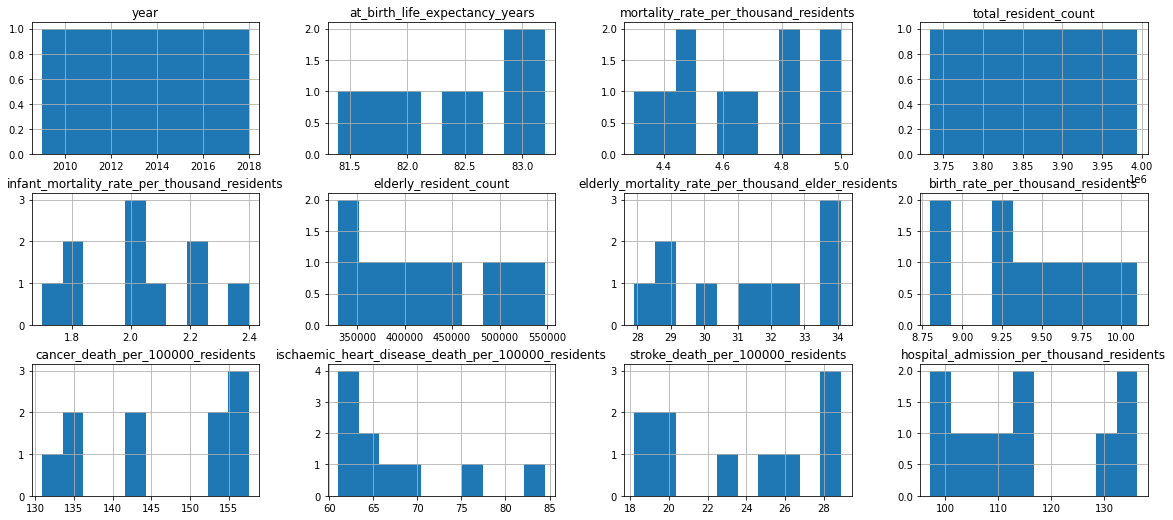

Wall time: 2.62 s


In [253]:
%%time
population_indicator.hist(figsize=(20,15), layout=(5,4))
plt.show()

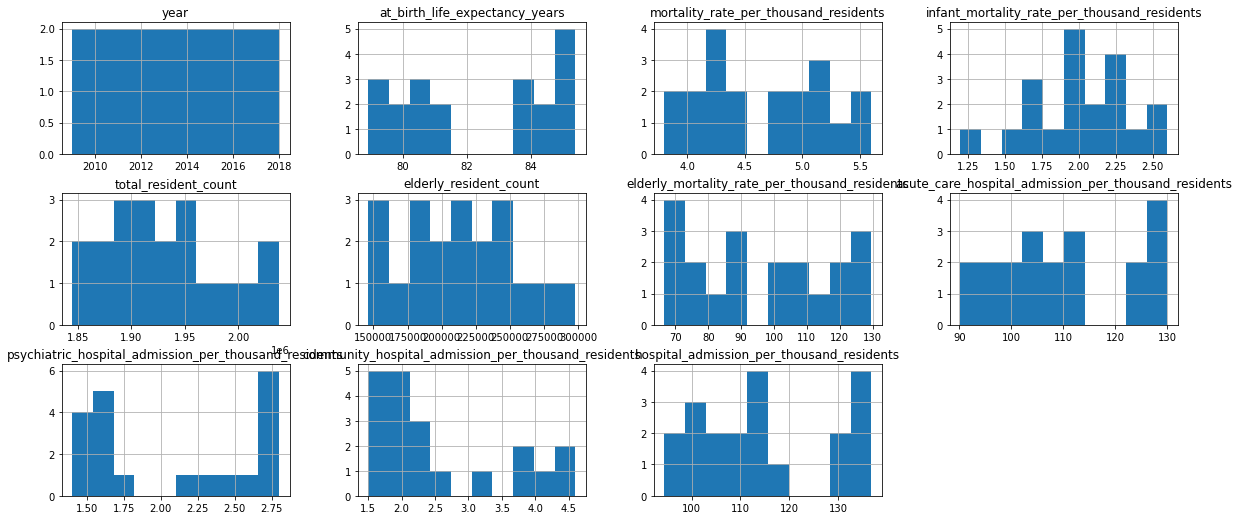

Wall time: 1.71 s


In [254]:
%%time
population_indicator_gender.hist(figsize=(20,15), layout=(5,4))
plt.show()

In [257]:
# limit to numerical data using df.select_dtypes()
population_indicator_gender_num = population_indicator_gender.select_dtypes(include=['number'])

population_indicator_gender_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   year                                                   20 non-null     int64  
 1   at_birth_life_expectancy_years                         20 non-null     float64
 2   mortality_rate_per_thousand_residents                  20 non-null     float64
 3   infant_mortality_rate_per_thousand_residents           20 non-null     float64
 4   total_resident_count                                   20 non-null     int64  
 5   elderly_resident_count                                 20 non-null     int64  
 6   elderly_mortality_rate_per_thousand_residents          20 non-null     float64
 7   acute_care_hospital_admission_per_thousand_residents   20 non-null     float64
 8   psychiatric_hospital_admission_per_thousand_resident

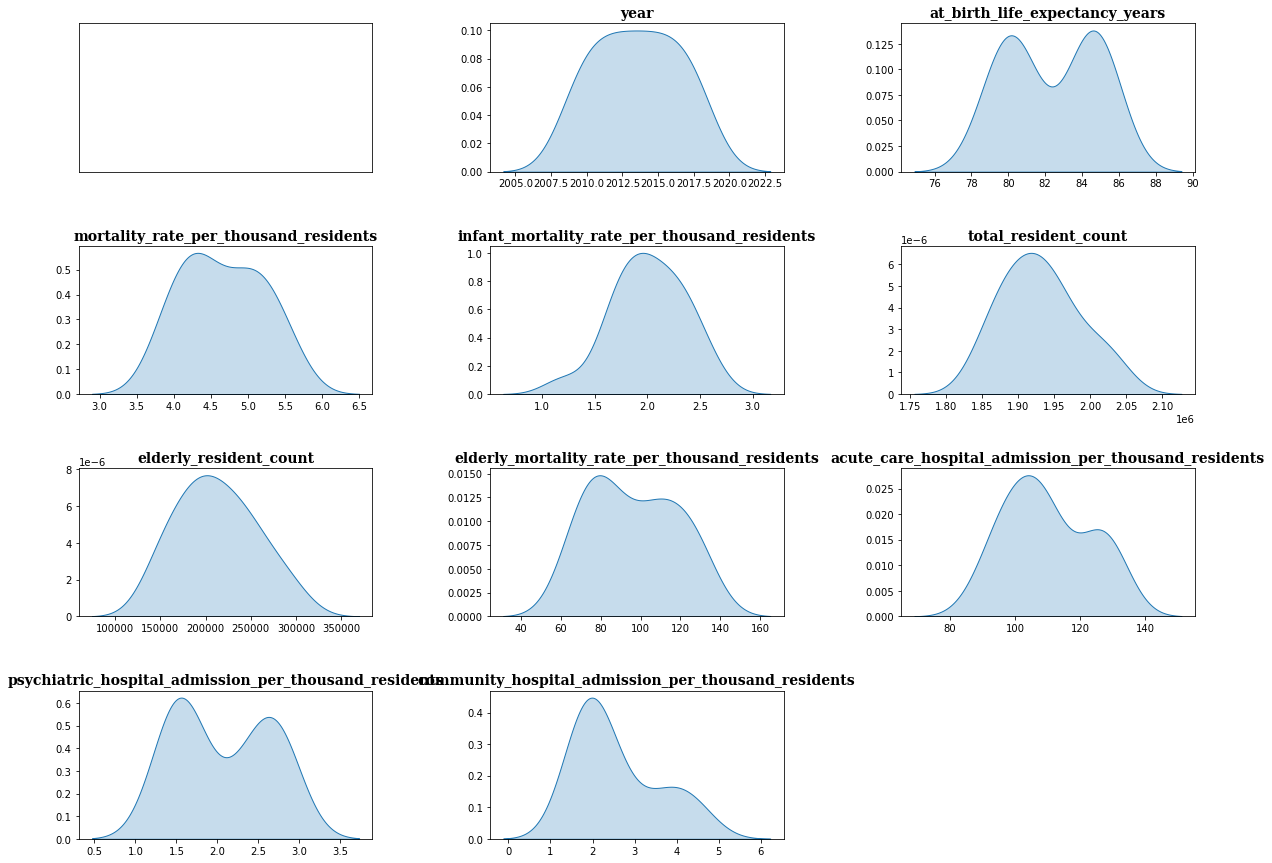

Wall time: 2.2 s


In [258]:
%%time

cols = ['year', 'at_birth_life_expectancy_years', 'mortality_rate_per_thousand_residents',
        'infant_mortality_rate_per_thousand_residents', 'total_resident_count', 'elderly_resident_count',
        'elderly_mortality_rate_per_thousand_residents', 'acute_care_hospital_admission_per_thousand_residents',
        'psychiatric_hospital_admission_per_thousand_residents', 'community_hospital_admission_per_thousand_residents',
        'hospital_admission_per_thousand_residents']

fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
ax9 = fig.add_subplot(gs[3, 0])
ax10 = fig.add_subplot(gs[3, 1])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]


# Graphs
for i, ax in enumerate(axes):
       
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)

    else:
        ax.set_title(cols[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
    
        sns.kdeplot(x=cols[i-1], data=population_indicator_gender_num, ax=ax, palette="pastel", fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

In [273]:
# limit to numerical data using df.select_dtypes()
population_indicator_num = population_indicator.select_dtypes(include=['number'])

population_indicator_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   year                                                 10 non-null     int64  
 1   at_birth_life_expectancy_years                       10 non-null     float64
 2   mortality_rate_per_thousand_residents                10 non-null     float64
 3   total_resident_count                                 10 non-null     int64  
 4   infant_mortality_rate_per_thousand_residents         10 non-null     float64
 5   elderly_resident_count                               10 non-null     int64  
 6   elderly_mortality_rate_per_thousand_elder_residents  10 non-null     float64
 7   birth_rate_per_thousand_residents                    10 non-null     float64
 8   cancer_death_per_100000_residents                    10 non-null     floa

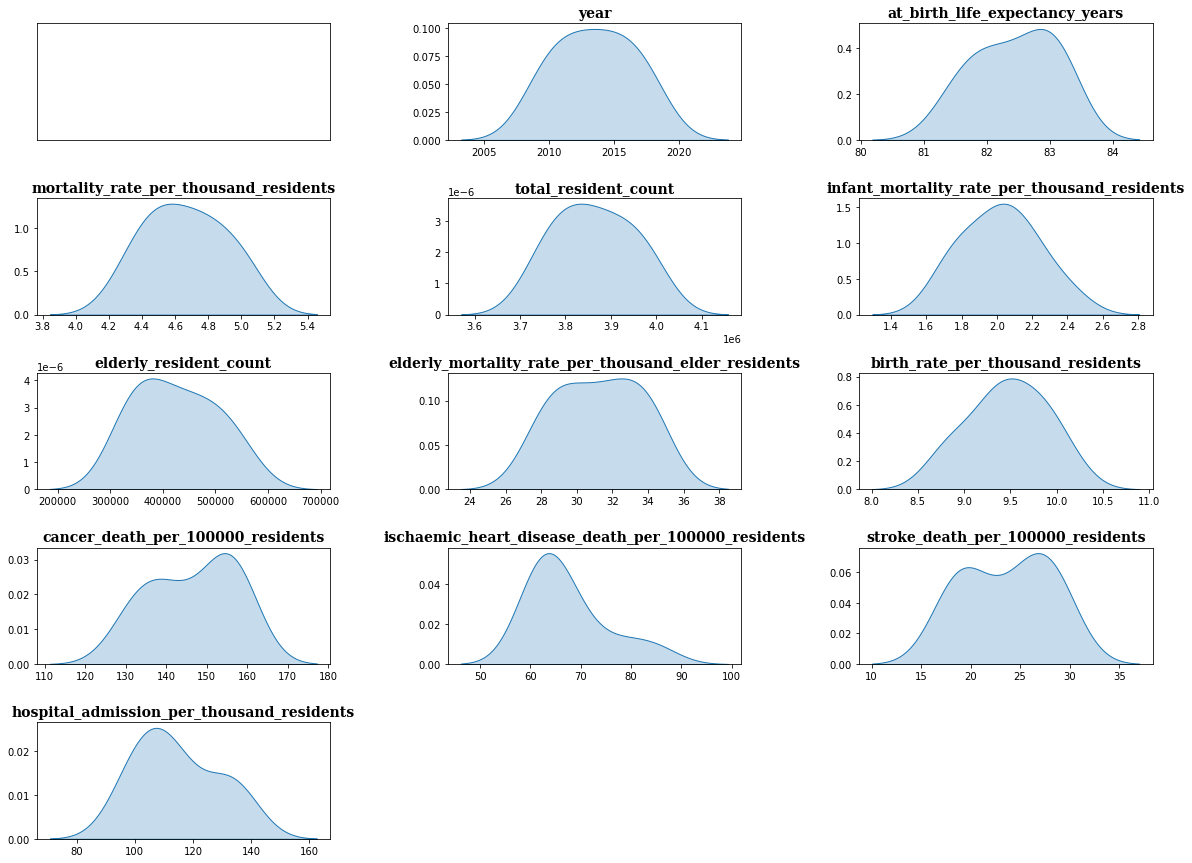

Wall time: 2.29 s


In [280]:
%%time

cols = ['year', 'at_birth_life_expectancy_years', 'mortality_rate_per_thousand_residents',
        'total_resident_count', 'infant_mortality_rate_per_thousand_residents', 'elderly_resident_count',
        'elderly_mortality_rate_per_thousand_elder_residents', 'birth_rate_per_thousand_residents',
        'cancer_death_per_100000_residents', 'ischaemic_heart_disease_death_per_100000_residents', 
        'stroke_death_per_100000_residents', 'hospital_admission_per_thousand_residents']

fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(5, 3)
gs.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
ax9 = fig.add_subplot(gs[3, 0])
ax10 = fig.add_subplot(gs[3, 1])
ax11 = fig.add_subplot(gs[3, 2])
ax12 = fig.add_subplot(gs[4, 0])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]


# Graphs
for i, ax in enumerate(axes):
       
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)

    else:
        ax.set_title(cols[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
    
        sns.kdeplot(x=cols[i-1], data=population_indicator_num, ax=ax, palette="pastel", fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.show()

Wall time: 810 ms


Text(0.5, 1.0, 'Total Population by Gender across Years')

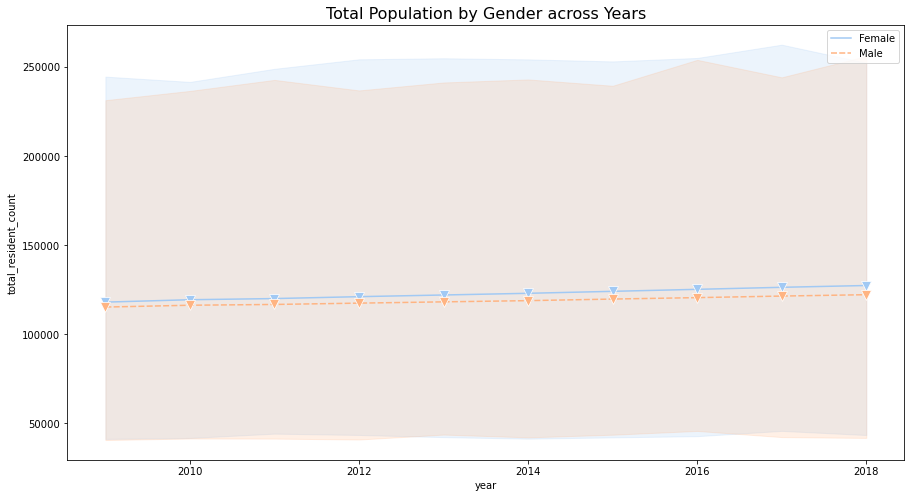

In [261]:
%%time
plt.figure(figsize=(15, 8))
sns.lineplot(x="year", y="total_resident_count", hue="gender", style="gender", marker= 'v', markersize=10, 
             palette="pastel", data=population_gender_ethnic)
plt.legend(ncol=1, loc="upper right", fontsize=10, frameon=True)
plt.title("Total Population by Gender across Years", size = 16)

Wall time: 1.15 s


Text(0.5, 1.0, 'Total Population by Age Group across Years')

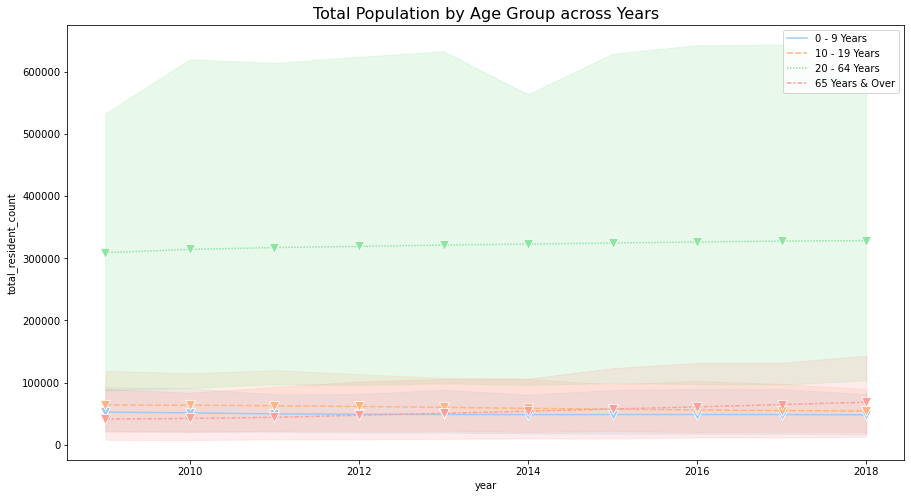

In [262]:
%%time
plt.figure(figsize=(15, 8))
sns.lineplot(x="year", y="total_resident_count", hue="age_group", style="age_group", marker= 'v', markersize=10, 
             palette="pastel", data=population_gender_ethnic)
plt.legend(ncol=1, loc="upper right", fontsize=10, frameon=True)
plt.title("Total Population by Age Group across Years", size = 16)

Wall time: 1.09 s


Text(0.5, 1.0, 'Total Population by Age across Years')

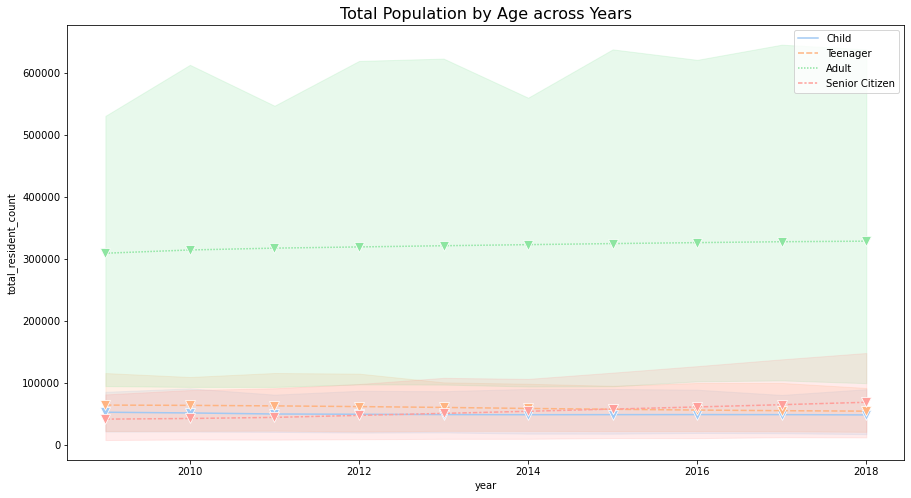

In [263]:
%%time
plt.figure(figsize=(15, 8))
sns.lineplot(x="year", y="total_resident_count", hue="age", style="age", marker= 'v', markersize=10, 
             palette="pastel", data=population_gender_ethnic)
plt.legend(ncol=1, loc="upper right", fontsize=10, frameon=True)
plt.title("Total Population by Age across Years", size = 16)

Wall time: 1.09 s


Text(0.5, 1.0, 'Total Population by Ethnic Group across Years')

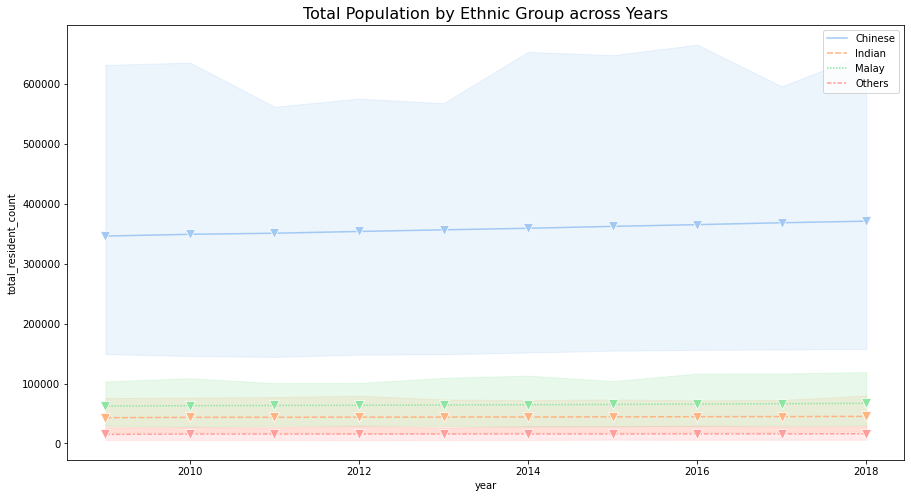

In [264]:
%%time
plt.figure(figsize=(15, 8))
sns.lineplot(x="year", y="total_resident_count", hue="ethnic", style="ethnic", marker= 'v', markersize=10, 
             palette="pastel", data=population_gender_ethnic)
plt.legend(ncol=1, loc="upper right", fontsize=10, frameon=True)
plt.title("Total Population by Ethnic Group across Years", size = 16)

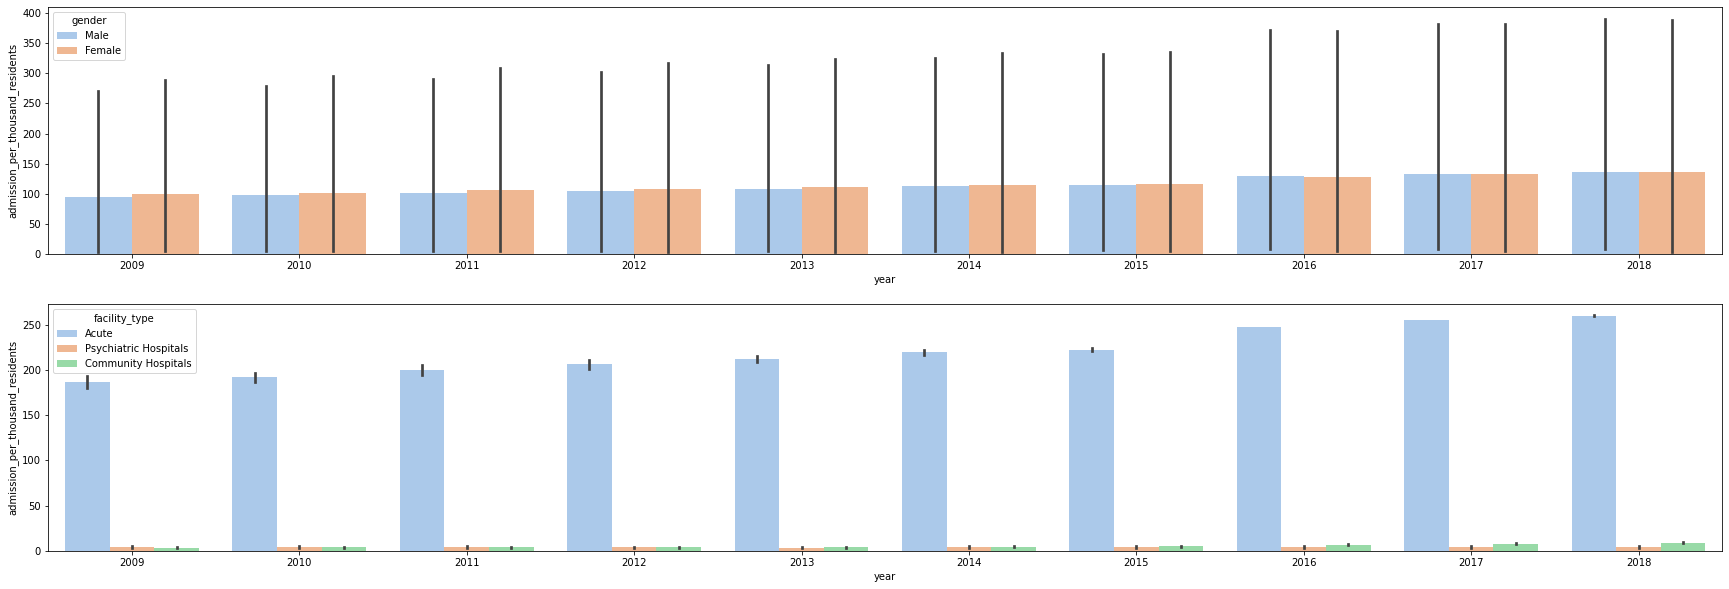

Wall time: 1.55 s


In [265]:
%%time

cat_var = population_hospital_admission_facility[['gender', 'facility_type']][:-1]

fig ,ax = plt.subplots(2,1,figsize=(30,10))
for axi ,var in zip(ax.flat,cat_var):
    sns.barplot(x=population_hospital_admission_facility.year,y=population_hospital_admission_facility.admission_per_thousand_residents,hue=population_hospital_admission_facility[var],ax=axi, palette="pastel", estimator=sum)

plt.show()

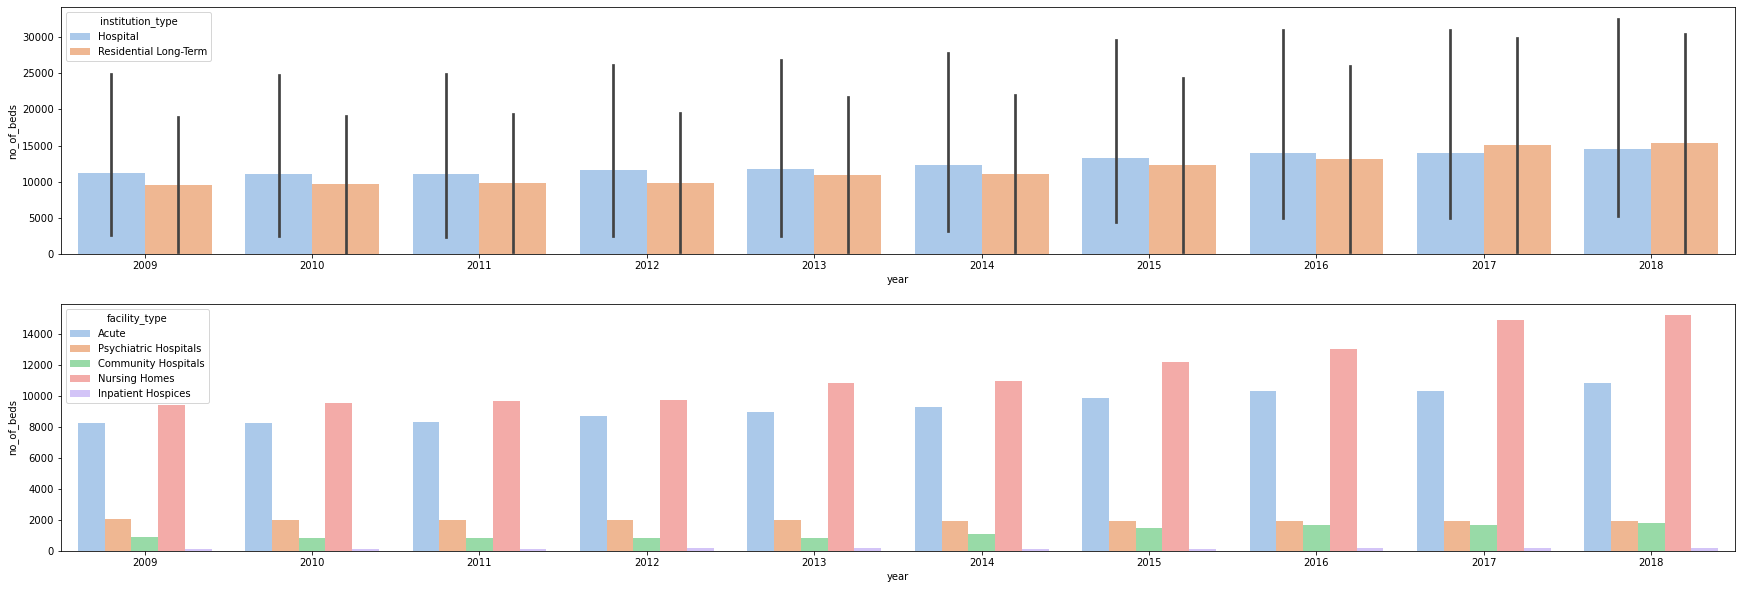

Wall time: 1.48 s


In [271]:
%%time

cat_var = hospital_facility[['institution_type', 'facility_type']][:-1]

fig ,ax = plt.subplots(2,1,figsize=(30,10))
for axi ,var in zip(ax.flat,cat_var):
    sns.barplot(x=hospital_facility.year,y=hospital_facility.no_of_beds,hue=hospital_facility[var],ax=axi, palette="pastel", estimator=sum)

plt.show()

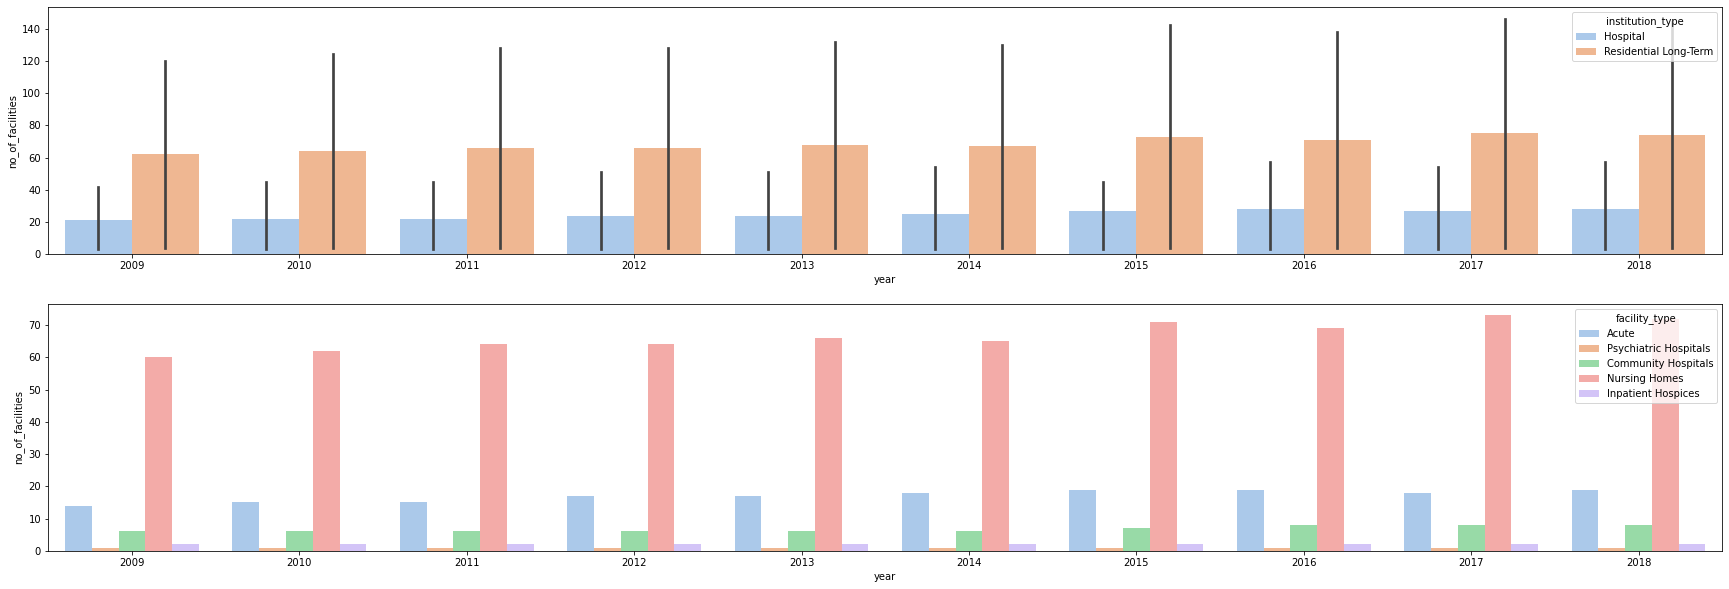

Wall time: 1.54 s


In [272]:
%%time

cat_var = hospital_facility[['institution_type', 'facility_type']][:-1]

fig ,ax = plt.subplots(2,1,figsize=(30,10))
for axi ,var in zip(ax.flat,cat_var):
    sns.barplot(x=hospital_facility.year,y=hospital_facility.no_of_facilities,hue=hospital_facility[var],ax=axi, palette="pastel", estimator=sum)

plt.show()

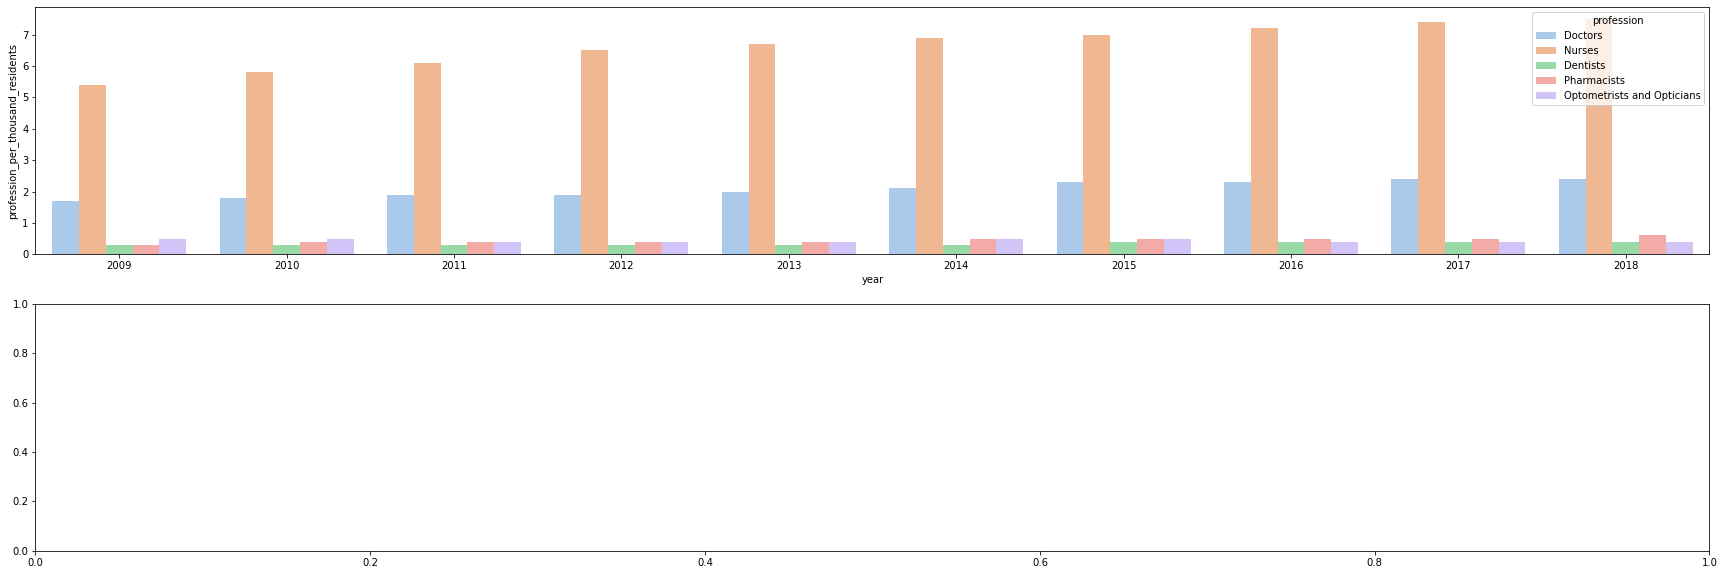

Wall time: 722 ms


In [268]:
%%time

cat_var = healthcare_professionals[['profession']][:-1]

fig ,ax = plt.subplots(2,1,figsize=(30,10))
for axi ,var in zip(ax.flat,cat_var):
    sns.barplot(x=healthcare_professionals.year,y=healthcare_professionals.profession_per_thousand_residents,hue=healthcare_professionals[var],ax=axi, palette="pastel", estimator=sum)

plt.show()

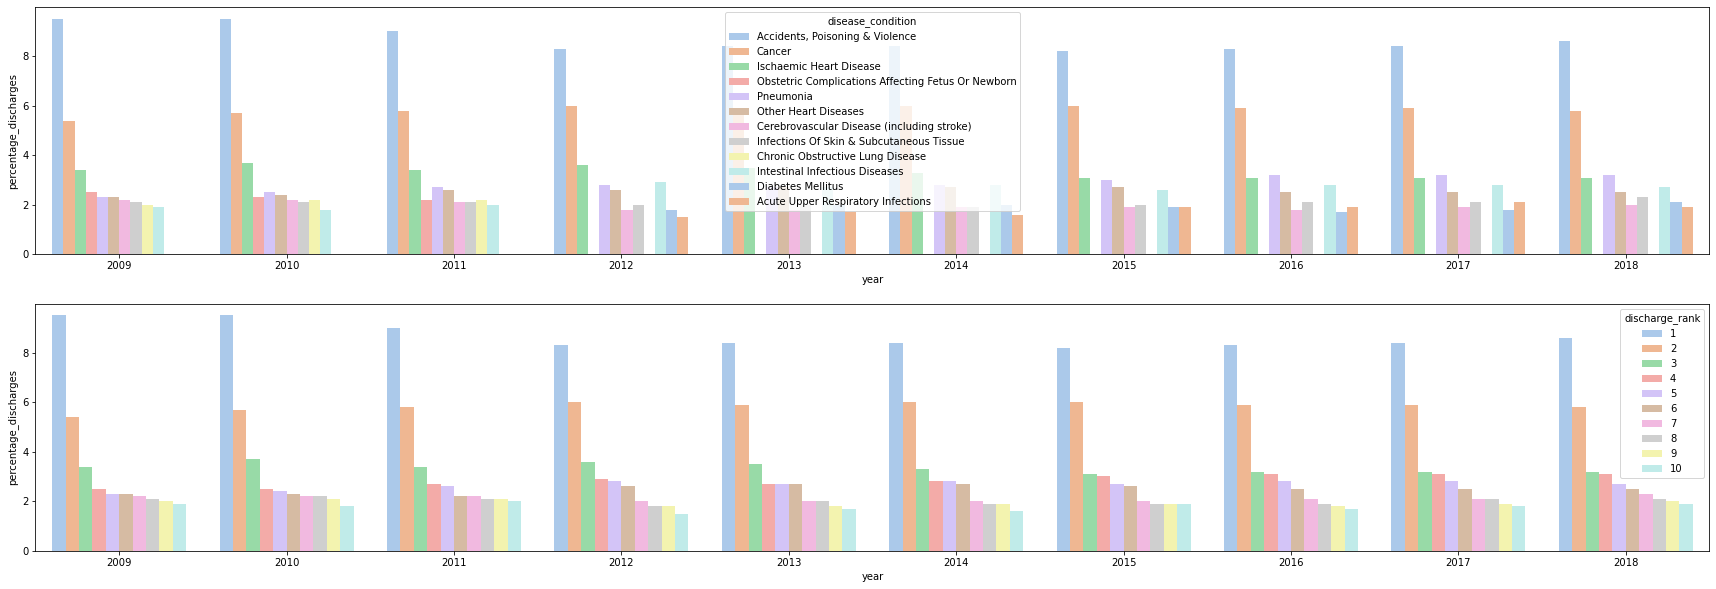

Wall time: 1.9 s


In [269]:
%%time

cat_var = hospital_discharges[['disease_condition', 'discharge_rank']][:-1]

fig ,ax = plt.subplots(2,1,figsize=(30,10))
for axi ,var in zip(ax.flat,cat_var):
    sns.barplot(x=hospital_discharges.year,y=hospital_discharges.percentage_discharges,hue=hospital_discharges[var],ax=axi, palette="pastel", estimator=sum)

plt.show()

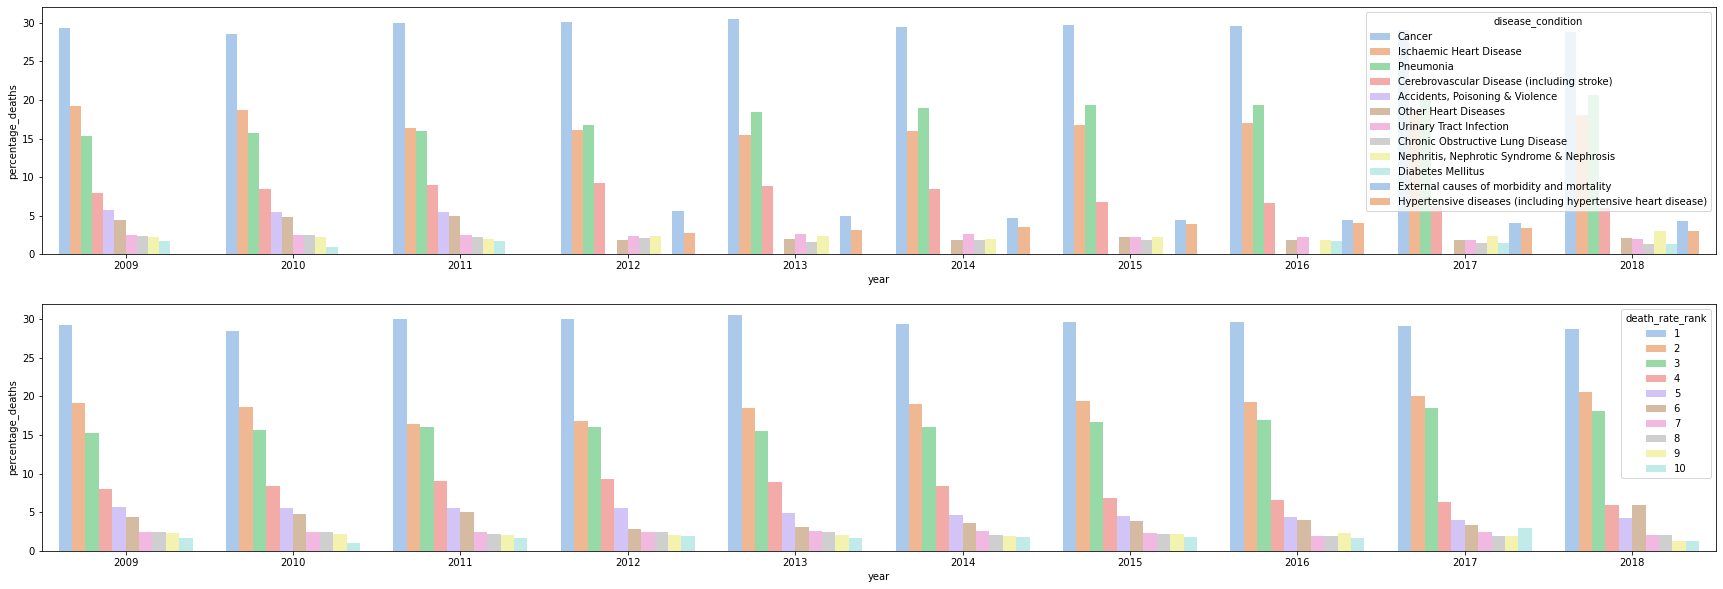

Wall time: 1.91 s


In [270]:
%%time

cat_var = principal_death_cause[['disease_condition', 'death_rate_rank']][:-1]

fig ,ax = plt.subplots(2,1,figsize=(30,10))
for axi ,var in zip(ax.flat,cat_var):
    sns.barplot(x=principal_death_cause.year,y=principal_death_cause.percentage_deaths,hue=principal_death_cause[var],ax=axi, palette="pastel", estimator=sum)

plt.show()